In [1]:
import substation_analysis_functions
from substation_analysis_functions import *
from imp import reload
reload(substation_analysis_functions)
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In the presentation
Next steps: <br>
1. Identify research question <br>
2. What is the feature set... many vs few? <br>
3. Show all the iterations of results <br>
4. Show that we know there are three distinct <br>
5. Off gas / on gas dataset. 

Two stages of clustering:
1. Based on total consumption clustering
... the aim is 

In [118]:
df = pd.read_csv('../consumer_data_counts_by_substation.csv')
df.set_index('substation', inplace = True)
df

folder_path = "../Substation Busbar Data/"
dataframes = substation_analysis_functions.read_substation_data(folder_path)
dataframes = substation_analysis_functions.handle_missing_vals(dataframes, threshold = 0.5)
for substation, dataframe in dataframes.items():
    dataframes[substation] = substation_analysis_functions.detect_bad_power_vals(dataframe,active_upper_threshold = 700, active_lower_threshold = 0, reactive_upper_threshold = 250, reactive_lower_threshold = -100)   
    

Substation 4626005100 Mill St flats POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4626001300 Gloucester Green POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4618007020 Hockmore Street POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4626004180 osney mead pylon  POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4614005070 queens lane telephone exchange POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4904001010 Swan mews POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4618006160 minchery farm pumping station POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4904024005 Dan Read Parade POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 46000

### Clustering on land use type

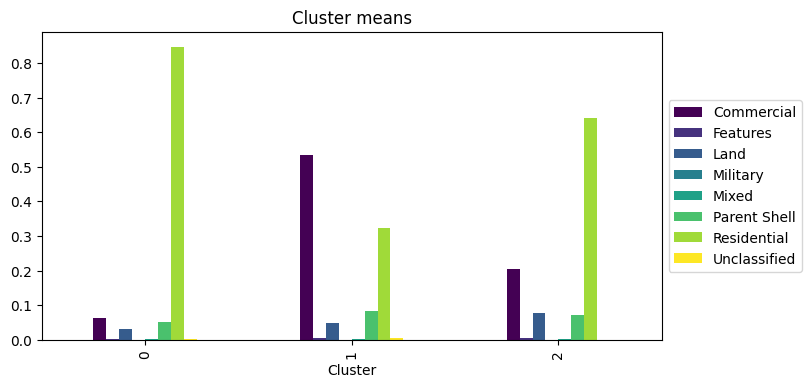

KeyError: "None of [Int64Index([58, 87, 40], dtype='int64', name='substation')] are in the [index]"

In [4]:
def k_means_clustering(df, k, features):
    # Select columns 2 through 8 as the feature set
    X = features
    # Initialize the KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    # Fit the KMeans model to the feature set
    kmeans.fit(X)
    
    # Add the predicted cluster labels to the DataFrame
    df['Cluster'] = kmeans.labels_
    
    closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
    closest
    
    # Return the DataFrame with the predicted cluster labels and center indices
    return df,closest
k = 3
features = df.iloc[:, 1:9].values
df_clusters, center_idx = k_means_clustering(df, k, features)

# Plot the cluster means and plot the data points closest to the cluster centers
df_clusters.groupby('Cluster').mean().plot(kind='bar', figsize=(8, 4), title = 'Cluster means', colormap = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
df_clusters.loc[center_idx].groupby('Cluster').mean().plot(kind='bar', figsize=(8, 4), title = 'Datapoints closest to cluster centers', colormap = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


### Now look at the active power profiles in each cluster to see if clustering by consumer type leads to distinct active power clusters

In [7]:
df_clusters, center_idx = k_means_clustering(df, k, features)
# Lets look at the active power profiles for each cluster
# Load in active power data and clean it...
folder_path = "../Substation Busbar Data/"
dataframes = substation_analysis_functions.read_substation_data(folder_path)
dataframes = substation_analysis_functions.handle_missing_vals(dataframes, threshold = 0.5)
for substation, dataframe in dataframes.items():
    dataframes[substation] = substation_analysis_functions.detect_bad_power_vals(dataframe,active_upper_threshold = 700, active_lower_threshold = 0, reactive_upper_threshold = 250, reactive_lower_threshold = -100)   
    


Substation 4626005100 Mill St flats POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4626001300 Gloucester Green POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4618007020 Hockmore Street POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4626004180 osney mead pylon  POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4614005070 queens lane telephone exchange POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4904001010 Swan mews POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4618006160 minchery farm pumping station POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4904024005 Dan Read Parade POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 46000

In [ ]:

### Plot the active power profiles for each cluster
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
for substation in df_clusters.iloc[center_idx]['substation']:
    #plt.plot(dataframes[substation].index, dataframes[substation]['Active Power [kW]'])
 
    
    plt.style.use('seaborn')
    # Plot all active power profiles
    dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
    ax1.plot(dataframes[substation].groupby('Hour').agg('Active Power [kW]').median(), label=substation)
    ax1.set_title(f'Active Power Load Profiles')
    ax1.legend(loc='upper left', bbox_to_anchor=(1,1), title = 'Representative Substations')
    ax1.set_xlabel('Hour of the Day')
    ax1.set_ylabel('kW')
   # ax1.set_ylim(0, 750)

    # Plot all reactive power profiles
    dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
    ax2.plot(dataframes[substation].groupby('Hour').agg('Reactive Power [kVAr]').median(), label=substation)
    ax2.set_title(f'Reactive Power Load Profiles')
    ax2.legend(loc='upper left', bbox_to_anchor=(1,1), title = 'Representative Substations')
    ax2.set_xlabel('Hour of the Day')
    ax2.set_ylabel('kVAr')
   # ax2.set_ylim(-50,110)

Ok now that i know there are three clusters of land users, that have distinct active power profiles, maybe I can reverse engineer the active power profiles that will allow us to get land use clusters FROM active power data

so plot different active power feature for the cluster to see

ratio of load during business hours to load during non business hours
specifiically, ratio of load during the night to during business hours, and load during the morning to during business hours as separate variables (bc we see three distinct patterns for the clusters), and then some weighted average of the two. we see (morn-midday, eve-midday): low,low ; low, same ; low, high

total active power might be another

how aabout i build a classification model based on the active power features, to predict which cluster they're in, and then 

In [ ]:
feature_of_interest = 'Active Power [kW]'

feature_set = [
        "substation",
        f'Mean total daily load consumption {feature_of_interest}',
        f'Max power consumption during a day {feature_of_interest}',
        f'Min power consumption during a day {feature_of_interest}',
        f'Range of power consumption during a day (max - min) {feature_of_interest}',
        f'Mean morning load {feature_of_interest}',
        f'Mean afternoon load  {feature_of_interest}',
        f'Mean evening load  {feature_of_interest}',
        f'Mean night load  {feature_of_interest}',
        f'6am load {feature_of_interest}',
        f'8am load {feature_of_interest}',
        f'3pm load {feature_of_interest}',
        f'6pm load {feature_of_interest}'
    ]

In [ ]:
def extract_features_v4(substation, df):
    
    # convert datetime column to datetime type
    df['Datetime'] = pd.to_datetime(df['Datetime'])

    df['Date'] = df['Datetime'].dt.date
    df['Hour'] = df['Datetime'].dt.hour

    # set datetime column as index
    df = df.set_index('Datetime')
    
    # group df by date
    daily_groups = df.groupby(df['Date'])
    
    feature_of_interest = 'Active Power [kW]'
    

    # total power consumption
    total_power = daily_groups[feature_of_interest].sum()
    
    
    ###################### Morning  #############################
    filtered_morning_hours = df[(df['Hour'] <= 6) & (df['Hour'] >= 4 )]
    grouped_morning_hours = filtered_morning_hours.groupby(by=['Date'])
    morning_hour_loads = grouped_morning_hours[feature_of_interest].mean()
    
    ###################### Afternoon  #############################
    filtered_afternoon_hours = df[(df['Hour'] >= 8) & (df['Hour'] <= 15)]
    grouped_afternoon_hours = filtered_afternoon_hours.groupby(by=['Date'])
    afternoon_hour_loads = grouped_afternoon_hours[feature_of_interest].mean()
    
    ###################### Evening  #############################
    filtered_evening_hours = df[(df['Hour'] >= 18 ) & (df['Hour'] < 24)]
    grouped_evening_hours = filtered_evening_hours.groupby(by=['Date'])
    evening_hour_loads = grouped_evening_hours[feature_of_interest].mean()
    
    ###################### Night  #############################
    filtered_night_hours = df[(df['Hour'] < 6 ) & (df['Hour'] >= 0)]
    grouped_night_hours = filtered_night_hours.groupby(by=['Date'])
    night_hour_loads = grouped_night_hours[feature_of_interest].mean()
    
    # Difference between 6am and 8am power
    morning_start = df[df['Hour'] == 6]
    morning_end = df[df['Hour'] == 8]
    morning_start_loads = morning_start.groupby(by=['Date'])[feature_of_interest].mean()
    morning_end_loads = morning_end.groupby(by=['Date'])[feature_of_interest].mean()
    
    # Difference between 3pm and 6pm power
    eve_start = df[df['Hour'] == 15]
    eve_end = df[df['Hour'] == 18]
    eve_start_loads = eve_start.groupby(by=['Date'])[feature_of_interest].mean()
    eve_end_loads = eve_end.groupby(by=['Date'])[feature_of_interest].mean()    

     # Max power consumption during a day
    max_powers = daily_groups[feature_of_interest].max()

    # Min power consumption during a day
    min_powers = daily_groups[feature_of_interest].min()

    # Range of power consumption during a day
    range_powers = max_powers - min_powers


    features = {
        f'Mean total daily load consumption {feature_of_interest}' : total_power.mean(),
        f'Max power consumption during a day {feature_of_interest}': max_powers.mean(),
        f'Min power consumption during a day {feature_of_interest}': min_powers.mean(),
        f'Range of power consumption during a day (max - min) {feature_of_interest}': range_powers.mean(),
        f'Mean morning load {feature_of_interest}': morning_hour_loads.mean(),
        f'Mean afternoon load  {feature_of_interest}': afternoon_hour_loads.mean(),
        f'Mean evening load  {feature_of_interest}': evening_hour_loads.mean(),
        f'Mean night load  {feature_of_interest}': night_hour_loads.mean(),
        f'6am load {feature_of_interest}': morning_start_loads.mean(),
        f'8am load {feature_of_interest}': morning_end_loads.mean(),
        f'3pm load {feature_of_interest}': eve_start_loads.mean(),
        f'6pm load {feature_of_interest}': eve_end_loads.mean()
    }
    return features 
        
    
    

In [ ]:

features_dict = {}
specific_time = False
for substation, dataframe in dataframes.items():
    # Compute all power features for each substation
    features = extract_features_v4(substation, dataframe)
        
    # Convert the feature data into a dataframe and append it to the corresponding dataframe in df_dict
    features_dict[substation] = features
features_df = pd.DataFrame(columns = feature_set)
# loop through feature dictionary and append each substation's features to the dataframe
for substation, feature_dict in features_dict.items():
    feature_data = {"substation": substation.lower().strip()}
    feature_data.update(feature_dict)
    features_df = features_df.append(feature_data, ignore_index=True)


In [ ]:
df_clusters['substation'] = df_clusters['substation'].str.lower().str.strip()
# merge the cluster labels with the active power feature dataframes
df_merged = df_clusters.merge(features_df, on = 'substation', how = 'left')
print(set(features_df['substation'].unique()) - set(df_clusters['substation'].unique()))
df_merged.dropna(inplace=True)
df_merged.reset_index(inplace=True, drop = True)

In [ ]:
# Ramping columns
df_merged['morning rampup'] = df_merged['8am load Active Power [kW]'] - df_merged['6am load Active Power [kW]']
df_merged['evening rampdown'] = df_merged['3pm load Active Power [kW]'] - df_merged['6pm load Active Power [kW]']
df_merged['morning rampup ratio'] = df_merged['8am load Active Power [kW]'] / df_merged['6am load Active Power [kW]']
df_merged['evening rampdown ratio'] = df_merged['3pm load Active Power [kW]'] / df_merged['6pm load Active Power [kW]']

# Time of day comparison columns
df_merged['morning-afternoon'] = df_merged['Mean morning load Active Power [kW]'] - df_merged['Mean afternoon load  Active Power [kW]']
df_merged['evening-afternoon'] = df_merged['Mean evening load  Active Power [kW]'] - df_merged['Mean afternoon load  Active Power [kW]']
df_merged['evening-morning'] = df_merged['Mean evening load  Active Power [kW]'] - df_merged['Mean morning load Active Power [kW]']

df_merged['morning/afternoon'] = df_merged['Mean morning load Active Power [kW]'] / df_merged['Mean afternoon load  Active Power [kW]']
df_merged['evening/afternoon'] = df_merged['Mean evening load  Active Power [kW]'] / df_merged['Mean afternoon load  Active Power [kW]']
df_merged['evening/morning'] = df_merged['Mean evening load  Active Power [kW]'] / df_merged['Mean morning load Active Power [kW]']

df_merged['evening-morning ratio']= df_merged['evening-afternoon'] / df_merged['morning-afternoon']
df_merged['evening/morning ratio']= df_merged['evening/afternoon'] / df_merged['morning/afternoon']

In [219]:
# Build classification model to identify which features predict cluster labels the best

# Correlation matrix between features and cluster labels
df_truncated = df_merged.loc[:, df_merged.columns.str.contains('Cluster|Active|morning|evening|afternoon|ratio')]
# get indeces in df_truncated that are greater than 0.1

features_for_clustering = df_truncated.corr()['Cluster'].index[df_truncated.corr()['Cluster'].abs() > 0.30][1:]
print(features_for_clustering)
features_for_clustering = ['evening rampdown', 'evening-afternoon', 'evening/morning']
#features_for_clustering = ['evening rampdown', 'evening-afternoon', 'evening/morning']

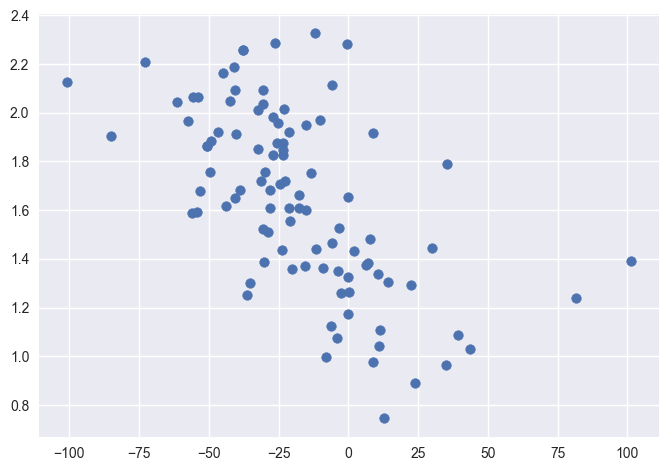

In [276]:
plt.scatter(df_merged['evening rampdown'], df_merged['evening/morning'])

In [237]:
def k_means_clustering_v2(df, k, features):
    # Select columns 2 through 8 as the feature set
    X = features
    # Initialize the KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    # Fit the KMeans model to the feature set
    kmeans.fit(X)
    
    # Add the predicted cluster labels to the DataFrame
    df['Cluster_new'] = kmeans.labels_
    
    closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
    closest
    
    # Return the DataFrame with the predicted cluster labels and center indices
    return df,closest
features = df_merged[features_for_clustering].values
df_c, center_idx = k_means_clustering_v2(df_merged, 3, features)

df_c.loc[center_idx]

substation  Commercial  Features      Land  Military     Mixed  \
73    medawar centre    0.493610  0.001597  0.006390       0.0  0.003195   
31  springfield road    0.059506  0.007438  0.123387       0.0  0.000656   
93  the perch binsey    0.048708  0.004428  0.080074       0.0  0.000738   

    Parent Shell  Residential  Unclassified  Cluster  ...  \
73      0.097444     0.397764      0.000000        1  ...   
31      0.081601     0.727412      0.000000        0  ...   
93      0.059041     0.806642      0.000369        0  ...   

    evening rampdown ratio  morning-afternoon  evening-afternoon  \
73                1.153115         -79.626783         -72.703277   
31                0.542068         -15.236258          19.723718   
93                0.991312         -28.899535          -4.285700   

    evening-morning  morning/afternoon  evening/afternoon  evening/morning  \
73         6.923506           0.752486           0.774007         1.028600   
31        34.959976           0.645584           1.458801         2.259661   
93        24.613836           0.398861           0.910853         2.283635   

    evening-morning ratio  evening/morning ratio  Cluster_new  
73               0.913051               1.028600            0  
31              -1.294525               2.259661            1  
93               0.148297               2.283635            2  

[3 rows x 35 columns]

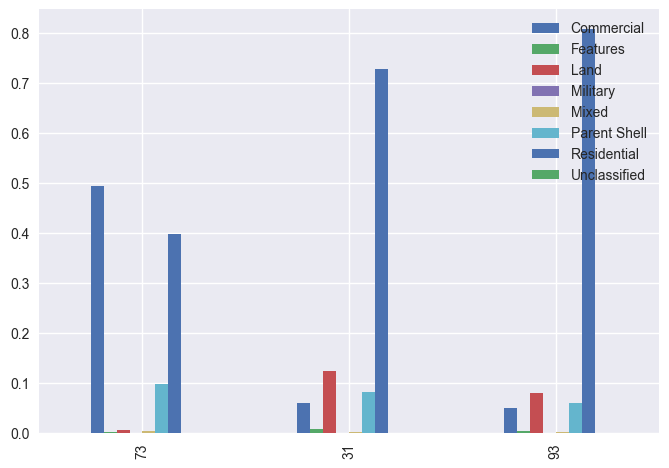

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/1942798554.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/1942798554.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/1942798554.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipp

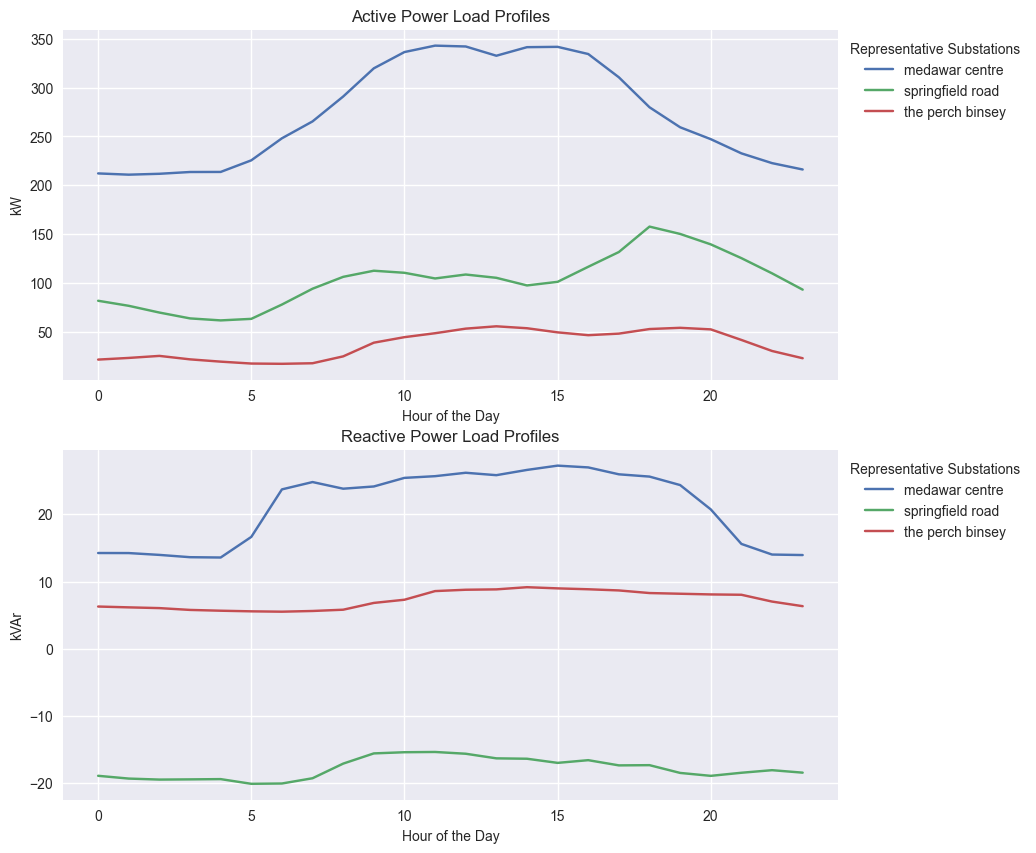

In [250]:
# plot the land use distributions of the  cluster centers
land_uses = ['Commercial', 'Features', 'Land', 'Military', 'Mixed','Parent Shell', 'Residential', 'Unclassified']
df_c.loc[center_idx][land_uses].plot(kind = 'bar')
plt.show()

dataframes = {k.lower().strip(): v for k, v in dataframes.items()}

### Plot the active power profiles for each cluster
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
for substation in df_c.iloc[center_idx]['substation']:
    #plt.plot(dataframes[substation].index, dataframes[substation]['Active Power [kW]'])
    plt.style.use('seaborn')
    # Plot all active power profiles
    dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
    ax1.plot(dataframes[substation].groupby('Hour').agg('Active Power [kW]').median(), label=substation)
    ax1.set_title(f'Active Power Load Profiles')
    ax1.legend(loc='upper left', bbox_to_anchor=(1,1), title = 'Representative Substations')
    ax1.set_xlabel('Hour of the Day')
    ax1.set_ylabel('kW')
   # ax1.set_ylim(0, 750)

    # Plot all reactive power profiles
    dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
    ax2.plot(dataframes[substation].groupby('Hour').agg('Reactive Power [kVAr]').median(), label=substation)
    ax2.set_title(f'Reactive Power Load Profiles')
    ax2.legend(loc='upper left', bbox_to_anchor=(1,1), title = 'Representative Substations')
    ax2.set_xlabel('Hour of the Day')
    ax2.set_ylabel('kVAr')
   # ax2.set_ylim(-50,110)

<Axes: xlabel='Cluster'>

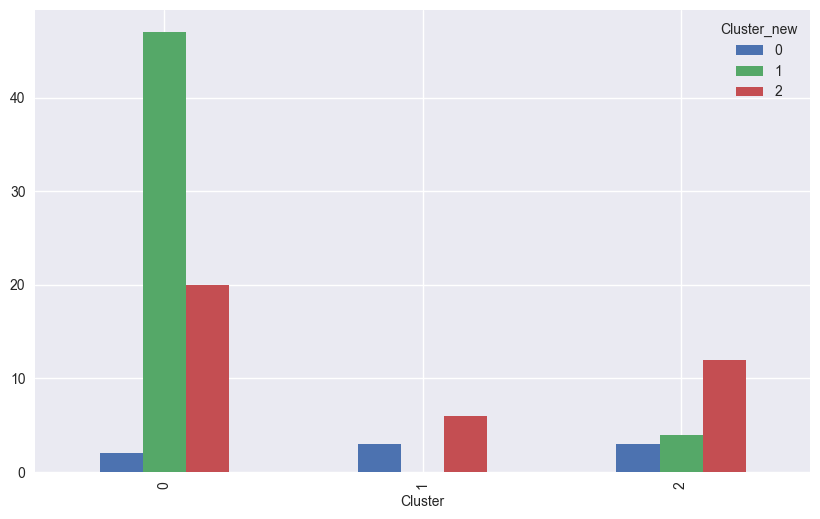

In [221]:
pd.crosstab(df_clusters['Cluster'], df_clusters['Cluster_new']).plot(kind='bar', figsize=(10, 6)) # not lookin so hot 

Accuracy: 0.65
Precision: 0.6515384615384616
Recall: 0.65
F1-score: 0.6121428571428572


/Users/Orie4416/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: title={'center': 'Feature Importance'}>

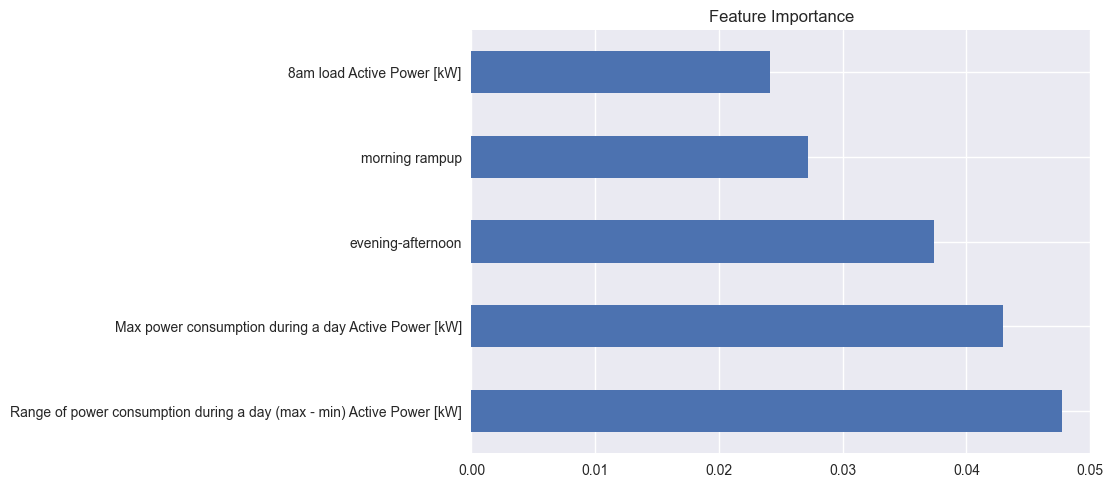

In [263]:
#build classification model to identify the most important features in predicting cluster label

class_df = df_merged.drop(columns = land_uses + ['substation', 'Cluster_new'])
X = class_df.drop('Cluster', axis=1)  # Features
y = class_df['Cluster']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)

importance = model.coef_[0]
feat_importances = pd.Series(importance, index = X.columns)
feat_importances.nlargest(5).plot(kind='barh',title = 'Feature Importance')


Range of power consumption during a day (max - min) Active Power [kW]  \
Range of power consumption during a day (max - ...                                           1.000000                       
Max power consumption during a day Active Power...                                           0.941545                       
evening-afternoon                                                                           -0.350022                       
morning rampup                                                                               0.851121                       
8am load Active Power [kW]                                                                   0.832687                       

                                                    Max power consumption during a day Active Power [kW]  \
Range of power consumption during a day (max - ...                                           0.941545      
Max power consumption during a day Active Power...                                           1.000000      
evening-afternoon                                                                           -0.354182      
morning rampup                                                                               0.811862      
8am load Active Power [kW]                                                                   0.958053      

                                                    evening-afternoon  \
Range of power consumption during a day (max - ...          -0.350022   
Max power consumption during a day Active Power...          -0.354182   
evening-afternoon                                            1.000000   
morning rampup                                              -0.600145   
8am load Active Power [kW]                                  -0.428248   

                                                    morning rampup  \
Range of power consumption during a day (max - ...        0.851121   
Max power consumption during a day Active Power...        0.811862   
evening-afternoon                                        -0.600145   
morning rampup                                            1.000000   
8am load Active Power [kW]                                0.800931   

                                                    8am load Active Power [kW]  
Range of power consumption during a day (max - ...                    0.832687  
Max power consumption during a day Active Power...                    0.958053  
evening-afternoon                                                    -0.428248  
morning rampup                                                        0.800931  
8am load Active Power [kW]                                            1.000000

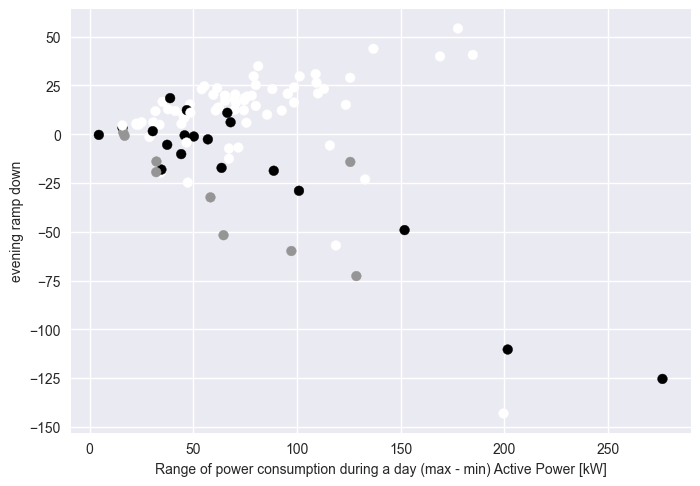

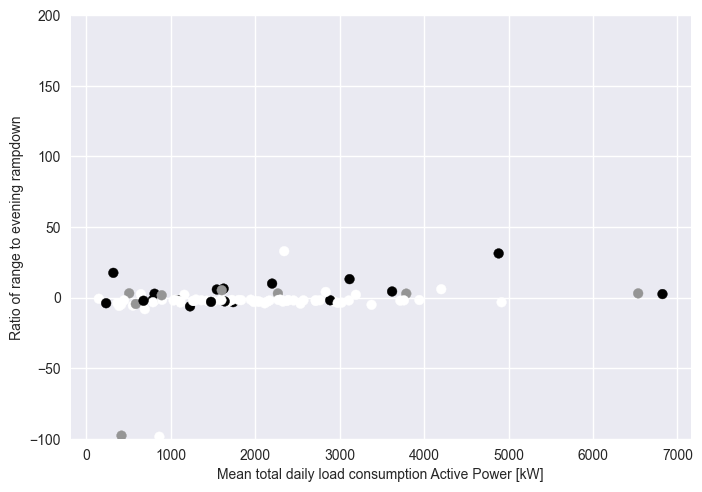

In [307]:
plt.scatter(df_merged['Range of power consumption during a day (max - min) Active Power [kW]'], df_merged['evening-afternoon'], c = df_merged['Cluster'])
plt.xlabel('Range of power consumption during a day (max - min) Active Power [kW]')
plt.ylabel('evening ramp down')
plt.show()

df_merged['Ratio of range to evening rampdown'] = df_merged['Range of power consumption during a day (max - min) Active Power [kW]'] / df_merged['evening rampdown']
plt.scatter(x = df_merged['Mean total daily load consumption Active Power [kW]'],  y = df_merged['Ratio of range to evening rampdown'], c = df_merged['Cluster'])
plt.xlabel("Mean total daily load consumption Active Power [kW]")
plt.ylabel('Ratio of range to evening rampdown')
plt.ylim(-100,200)
plt.show()

In [268]:
features = df_merged[feat_importances.nlargest(5).index].values
df_c, center_idx = k_means_clustering_v2(df_merged, 3, features)

df_c.loc[center_idx]

substation  Commercial  Features      Land  Military  \
55                dashwood rise    0.058995  0.006085  0.056878  0.000000   
4   bridge view watlington road    0.083072  0.000470  0.043574  0.000000   
24            normandy crescent    0.067806  0.000885  0.035286  0.000111   

       Mixed  Parent Shell  Residential  Unclassified  Cluster  ...  \
55  0.000000      0.047619     0.830423           0.0        0  ...   
4   0.000157      0.055486     0.817241           0.0        0  ...   
24  0.000774      0.063105     0.832034           0.0        0  ...   

    evening rampdown ratio  morning-afternoon  evening-afternoon  \
55                0.555159          -8.607938          10.350736   
4                 1.125174         -63.534267         -23.162743   
24                0.776076         -43.022136          12.111061   

    evening-morning  morning/afternoon  evening/afternoon  evening/morning  \
55        18.958674           0.762854           1.285159         1.684672   
4         40.371524           0.685421           0.885314         1.291635   
24        55.133197           0.601312           1.112234         1.849680   

    evening-morning ratio  evening/morning ratio  Cluster_new  
55              -1.202464               1.684672            0  
4                0.364571               1.291635            1  
24              -0.281508               1.849680            2  

[3 rows x 35 columns]

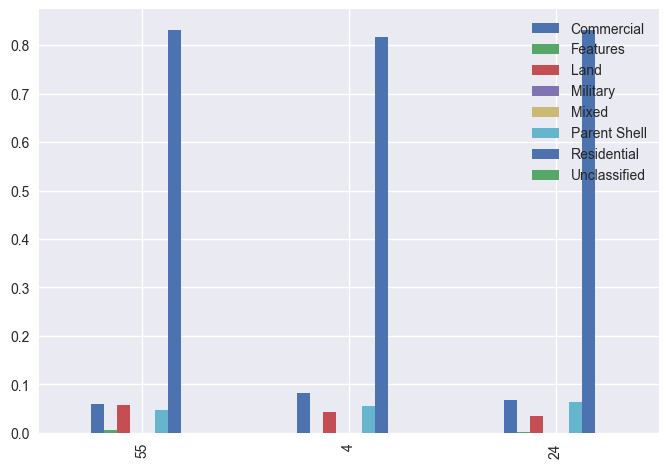

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/403315257.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/403315257.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/403315257.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped 

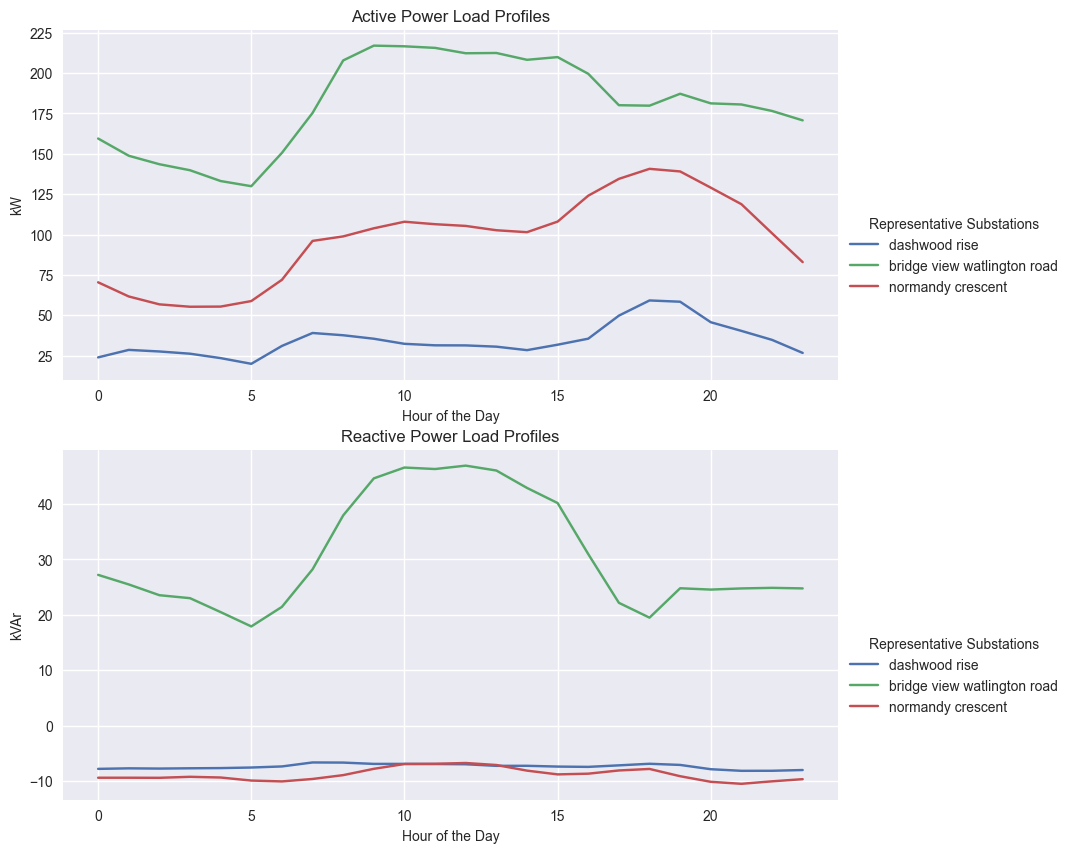

In [270]:
# plot the land use distributions of the  cluster centers
land_uses = ['Commercial', 'Features', 'Land', 'Military', 'Mixed','Parent Shell', 'Residential', 'Unclassified']
df_c.loc[center_idx][land_uses].plot(kind = 'bar')
plt.show()

dataframes = {k.lower().strip(): v for k, v in dataframes.items()}

### Plot the active power profiles for each cluster
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
for substation in df_c.iloc[center_idx]['substation']:
    #plt.plot(dataframes[substation].index, dataframes[substation]['Active Power [kW]'])
    plt.style.use('seaborn')
    # Plot all active power profiles
    dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
    ax1.plot(dataframes[substation].groupby('Hour').agg('Active Power [kW]').median(), label=substation)
    ax1.set_title(f'Active Power Load Profiles')
    ax1.legend(loc='upper left', bbox_to_anchor=(1,0.5), title = 'Representative Substations')
    ax1.set_xlabel('Hour of the Day')
    ax1.set_ylabel('kW')
   # ax1.set_ylim(0, 750)

    # Plot all reactive power profiles
    dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
    ax2.plot(dataframes[substation].groupby('Hour').agg('Reactive Power [kVAr]').median(), label=substation)
    ax2.set_title(f'Reactive Power Load Profiles')
    ax2.legend(loc='upper left', bbox_to_anchor=(1,0.5), title = 'Representative Substations')
    ax2.set_xlabel('Hour of the Day')
    ax2.set_ylabel('kVAr')
   # ax2.set_ylim(-50,110)

## DTW?

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


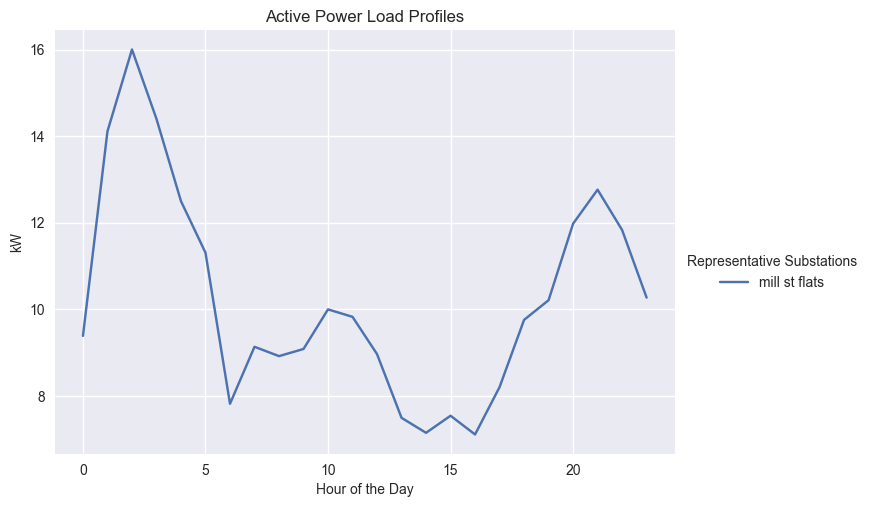

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


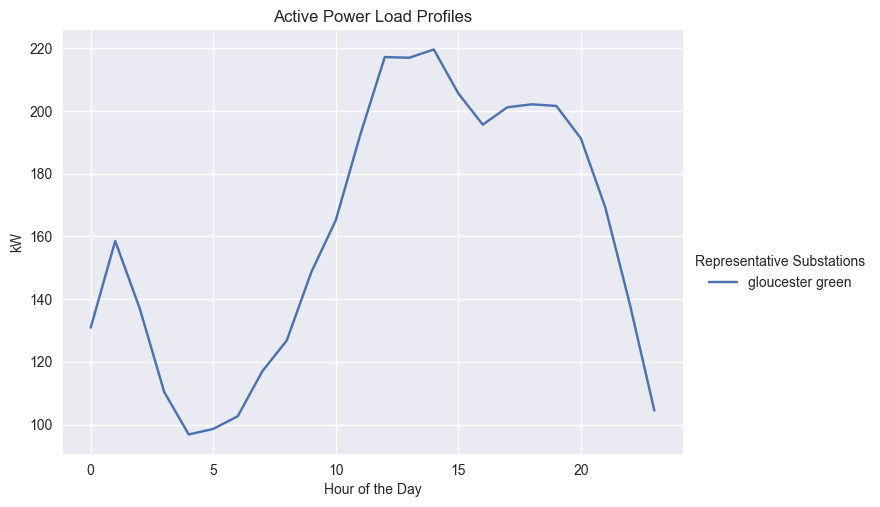

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


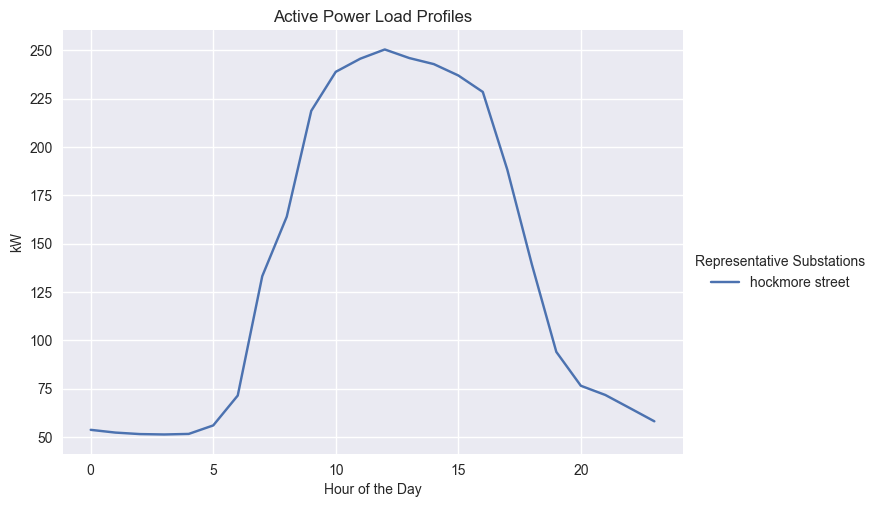

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


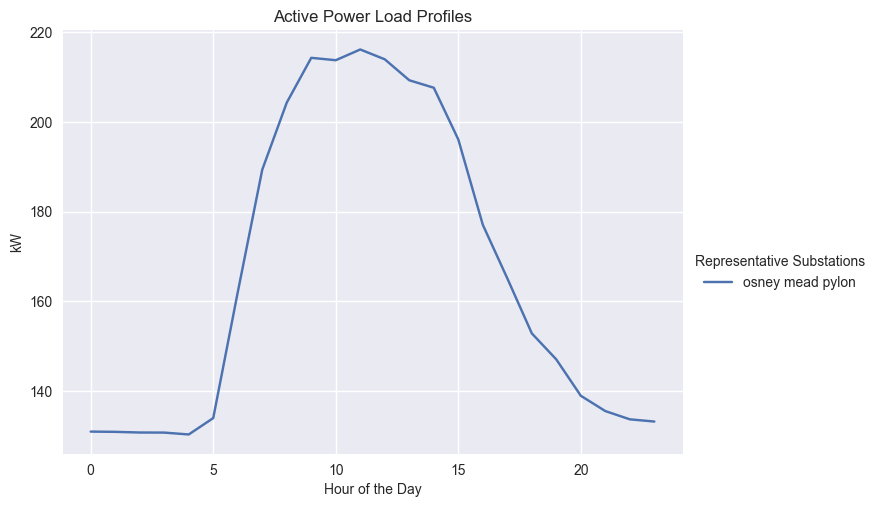

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


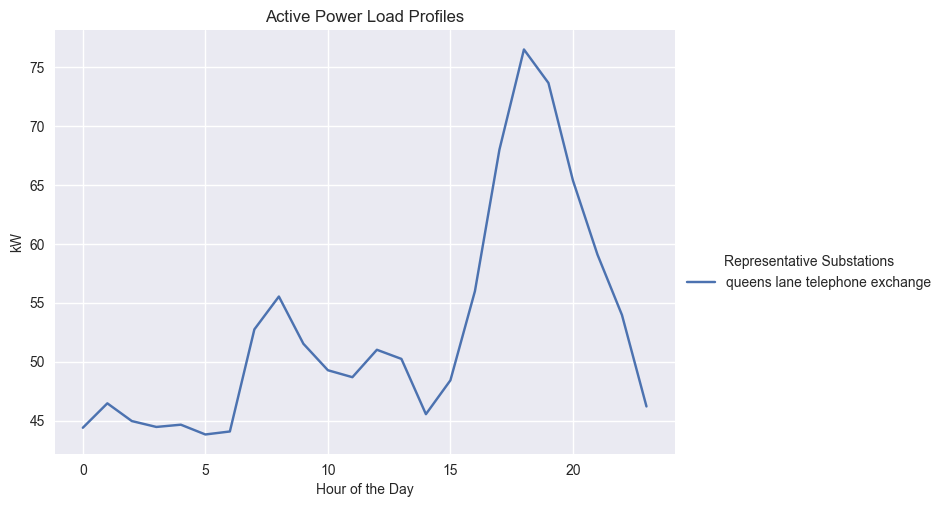

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


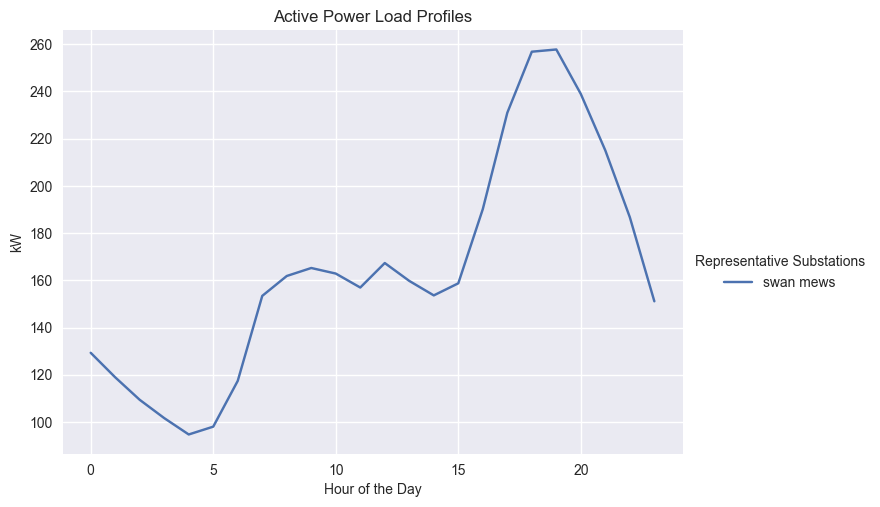

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


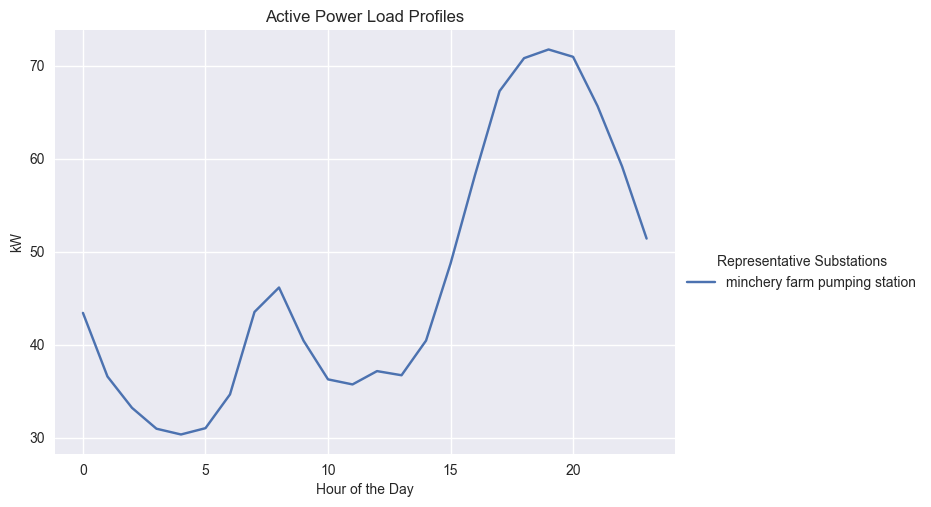

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


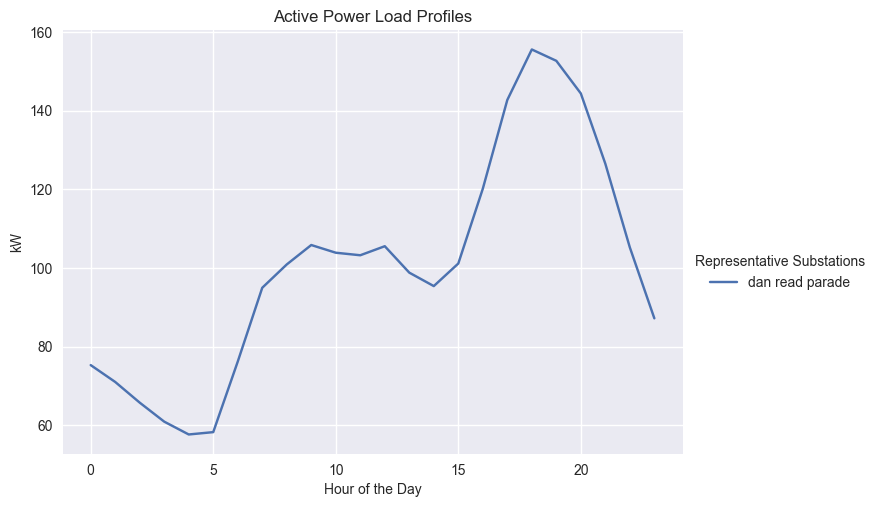

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


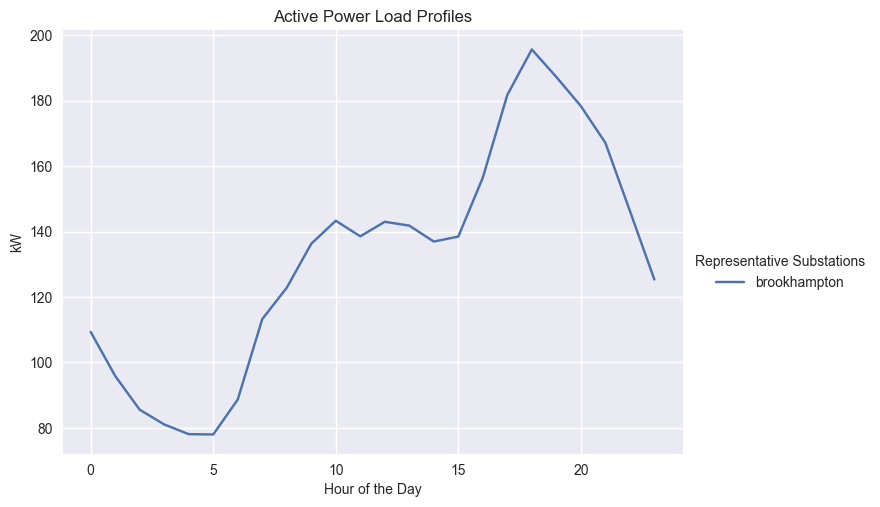

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


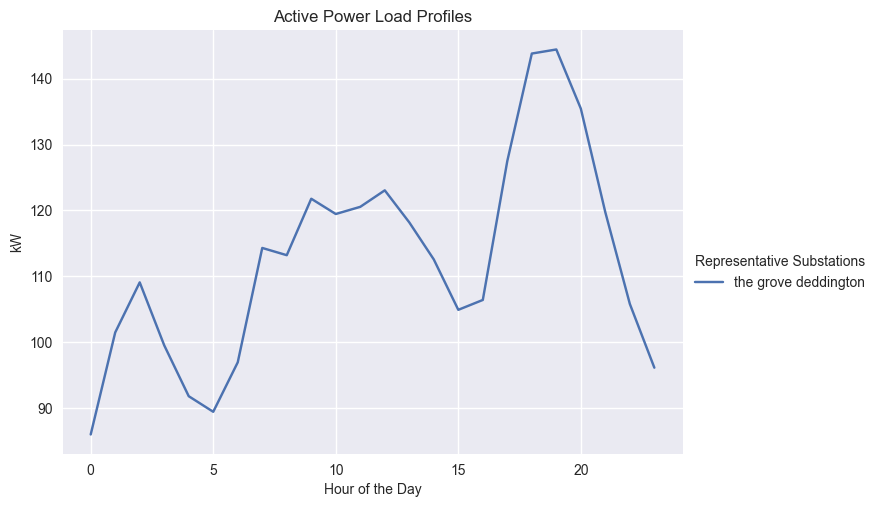

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


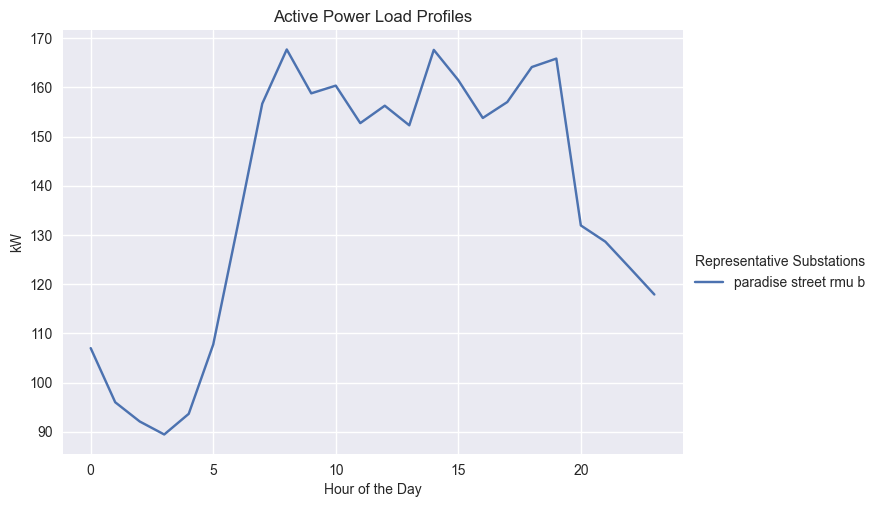

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


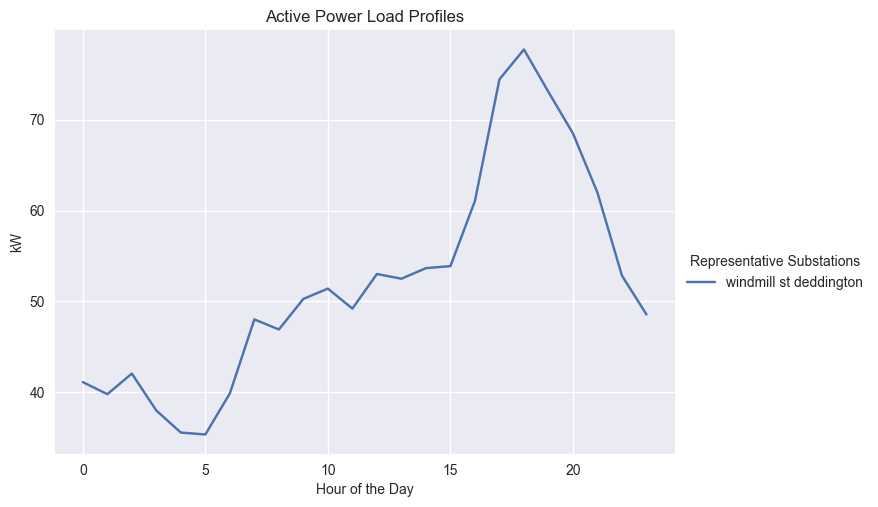

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


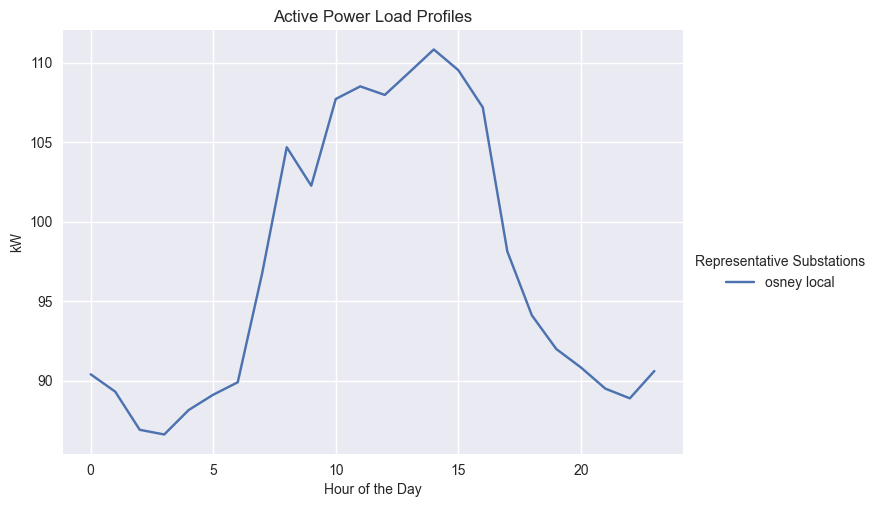

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


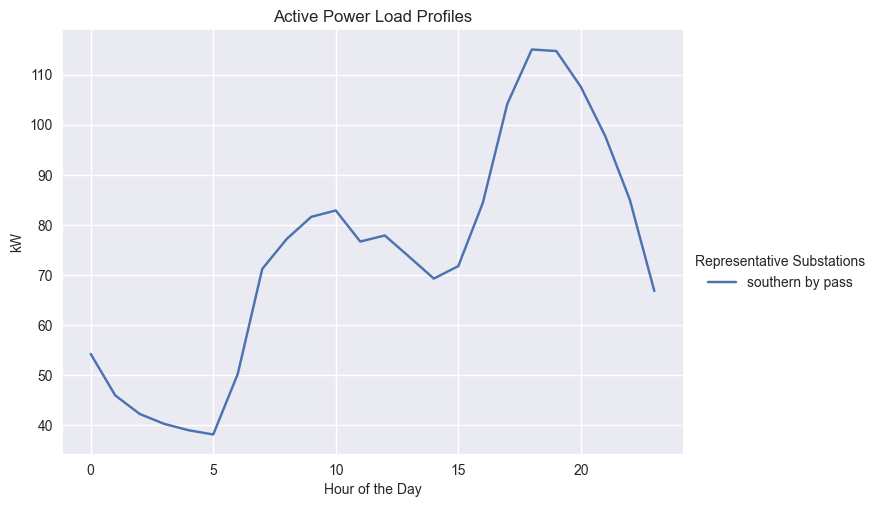

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


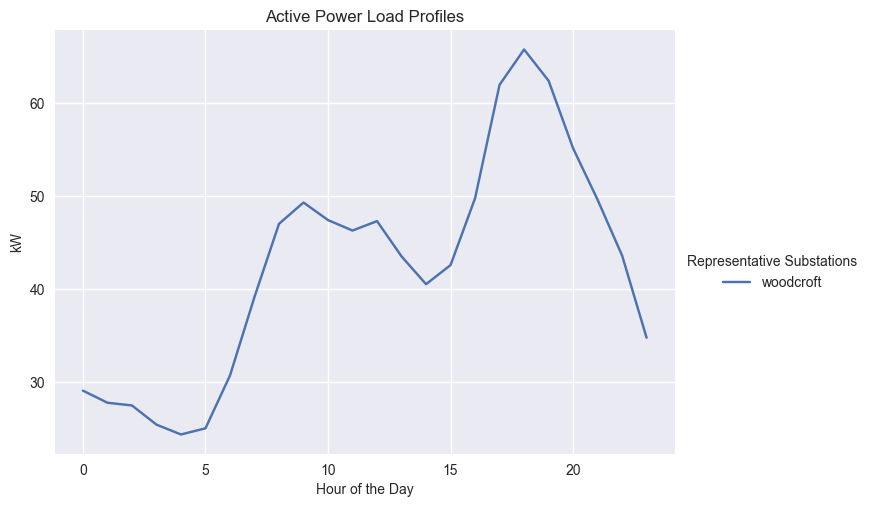

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


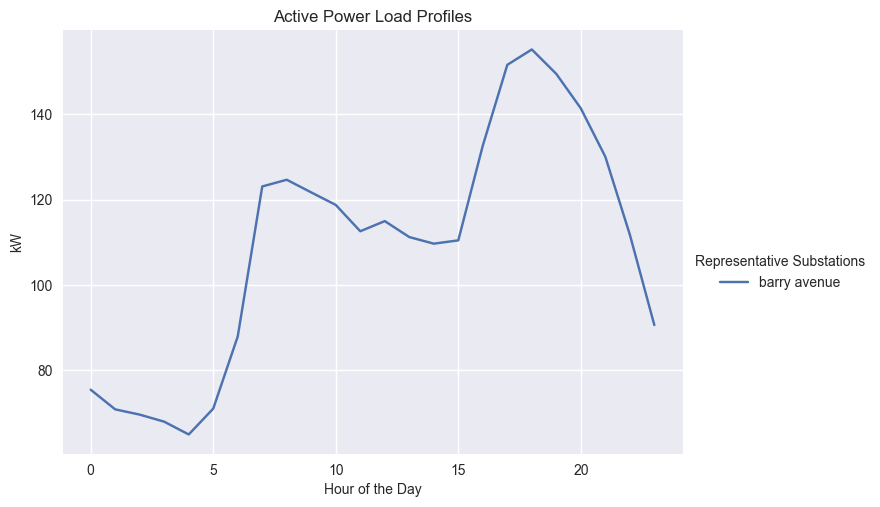

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


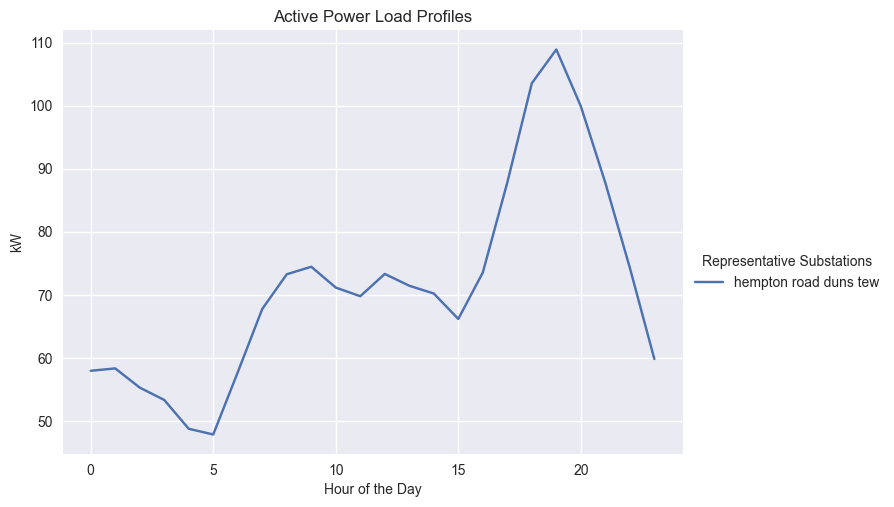

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


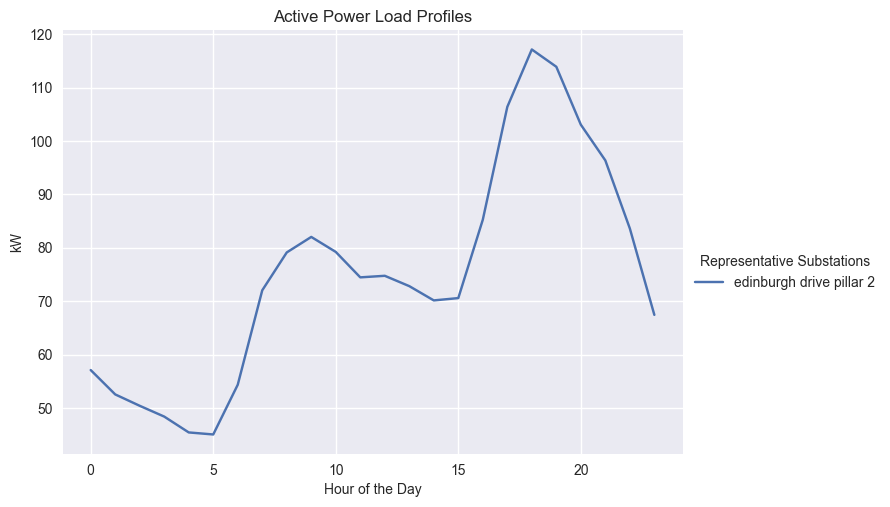

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


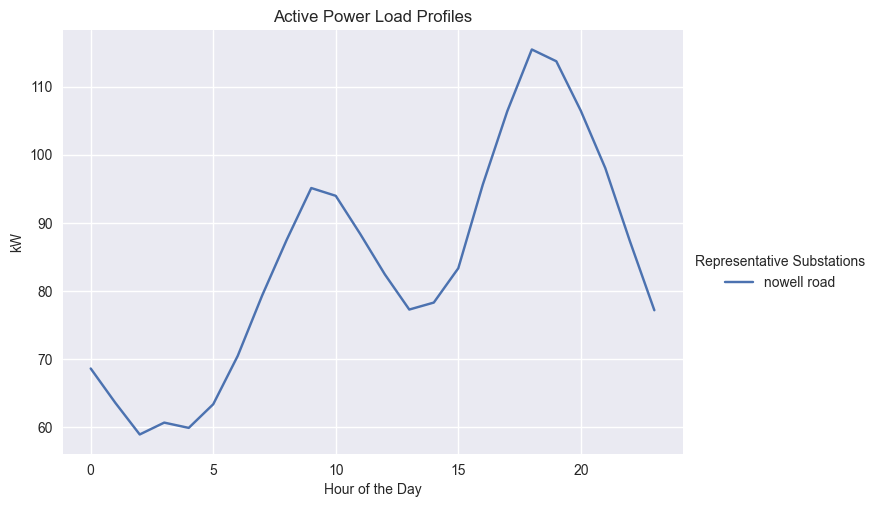

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


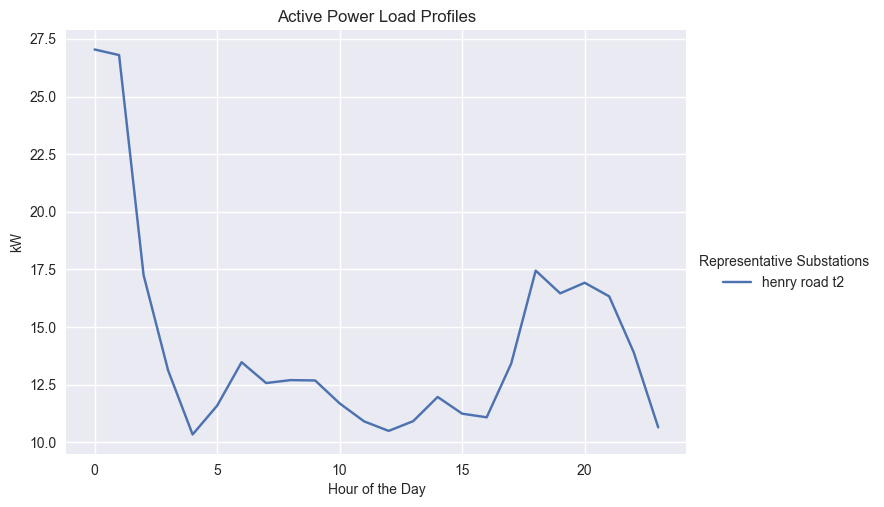

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


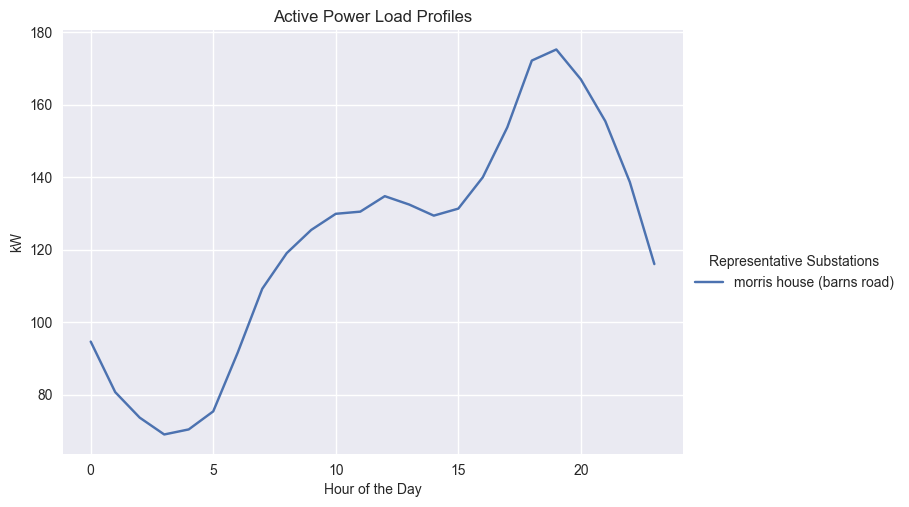

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


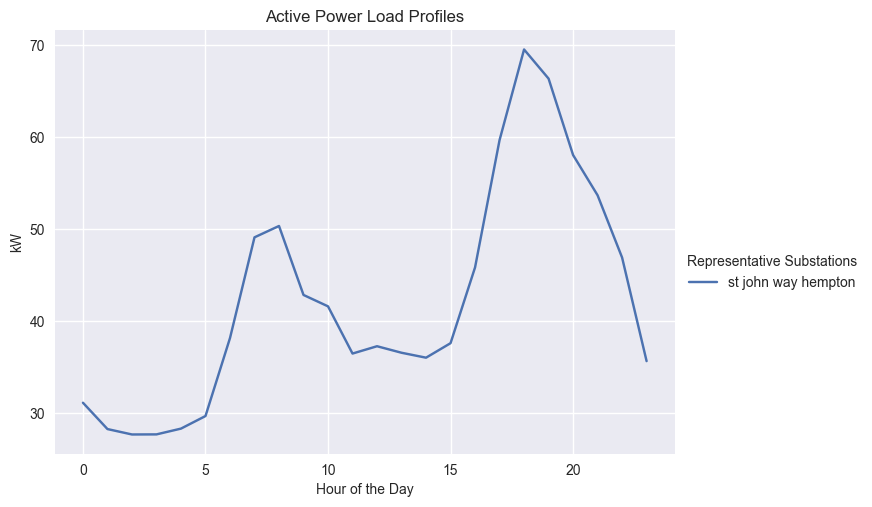

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


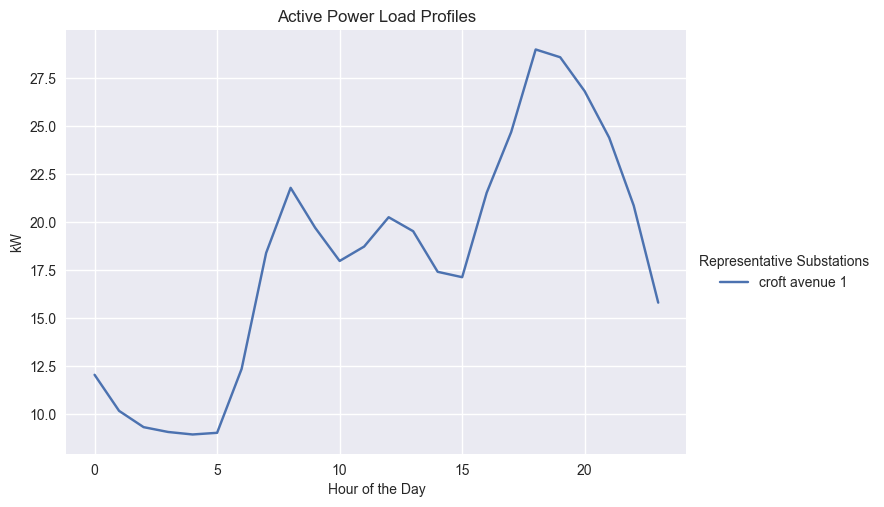

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


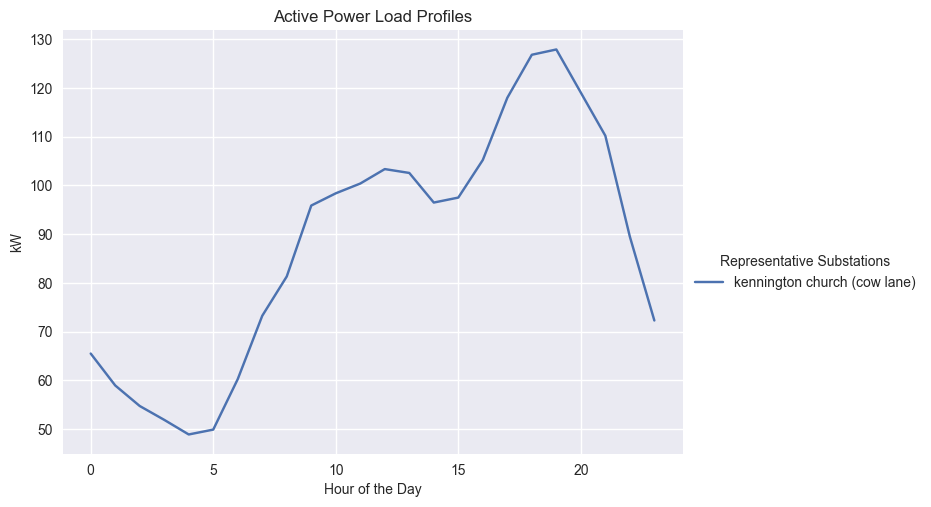

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


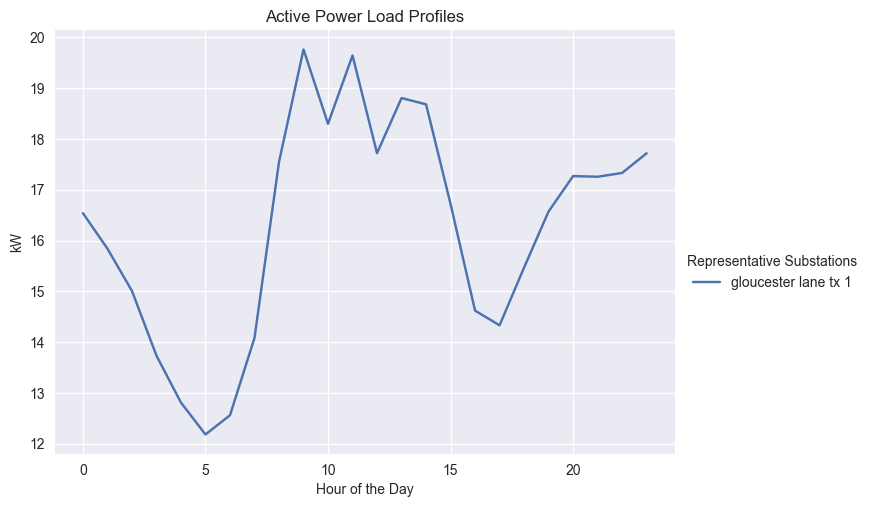

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


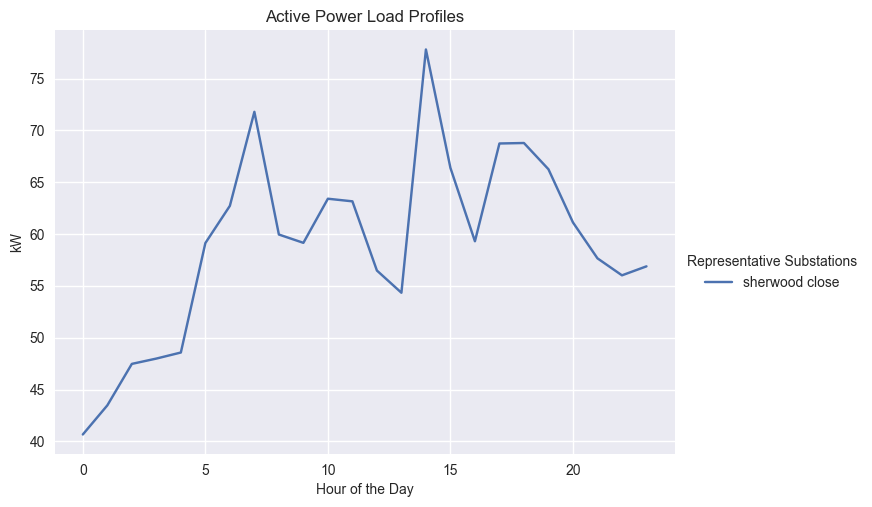

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


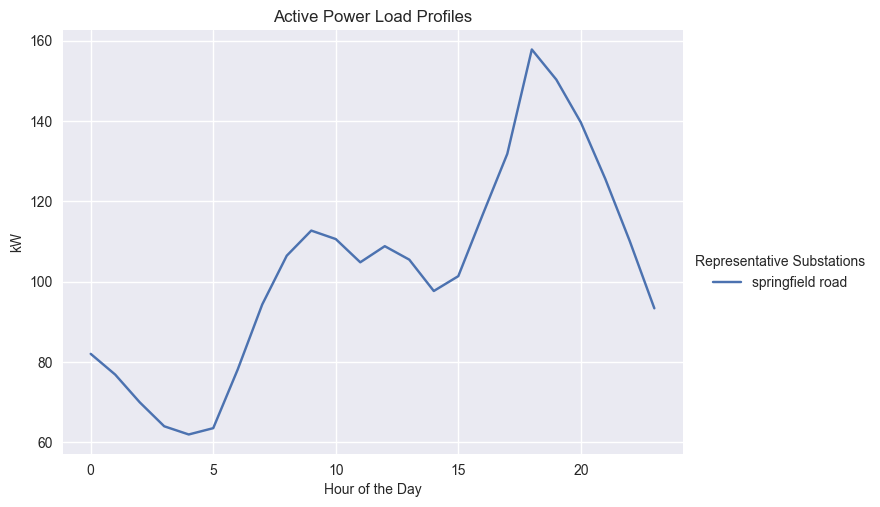

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


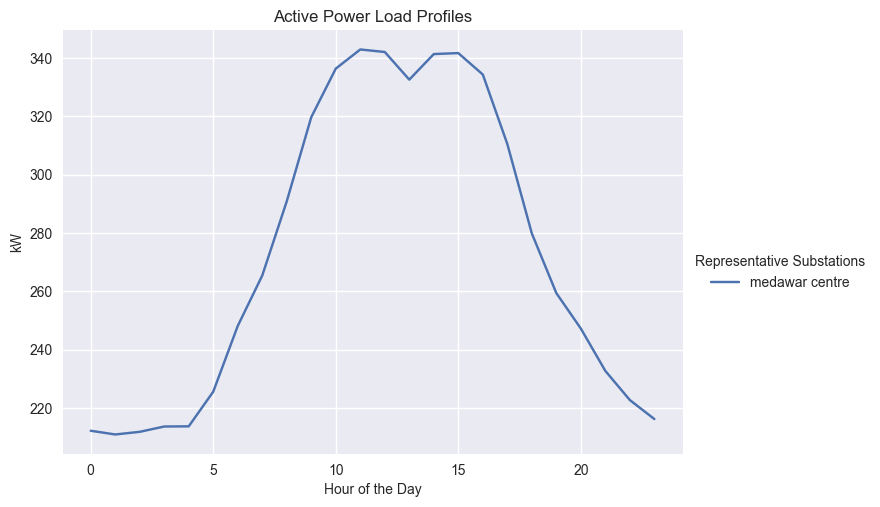

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


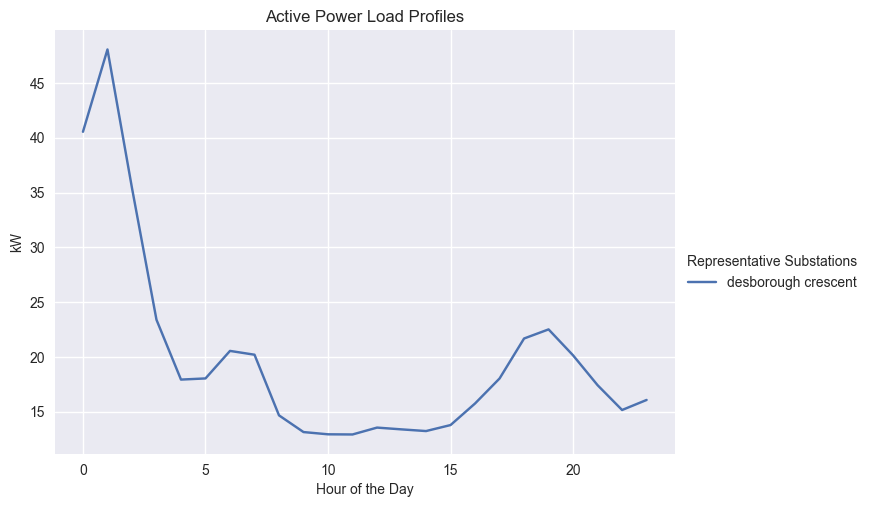

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


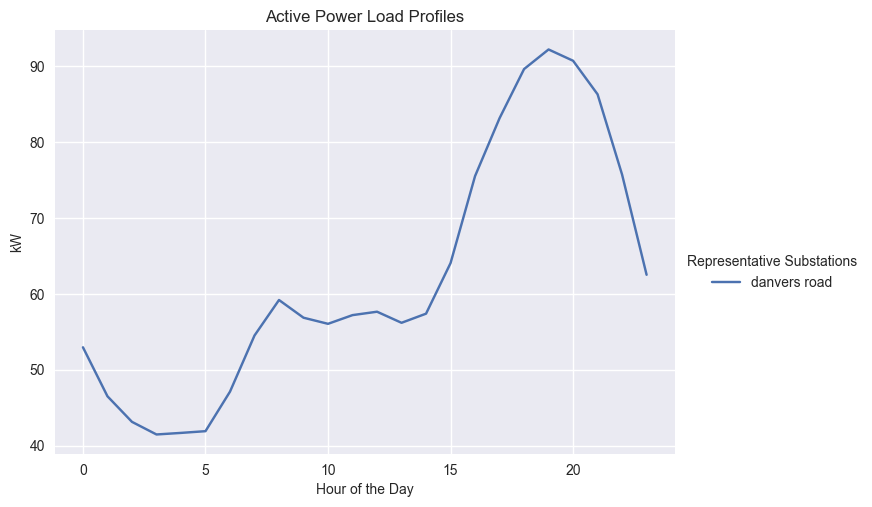

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


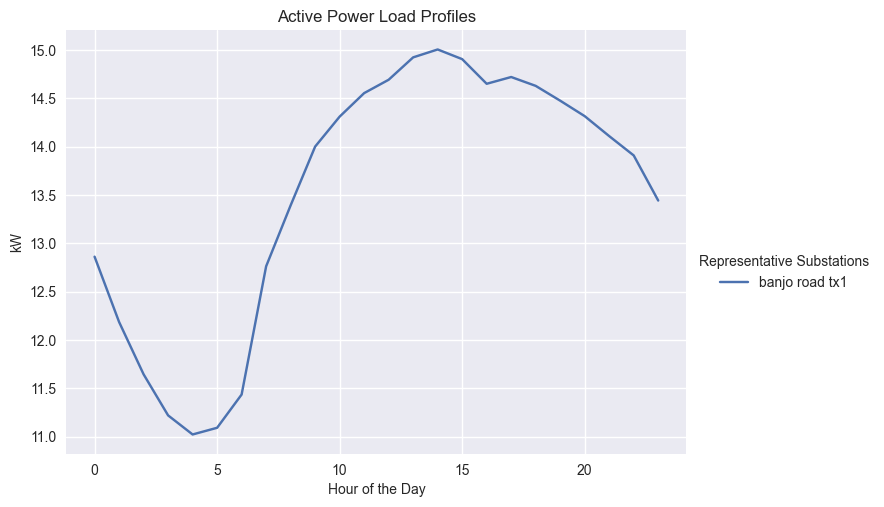

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


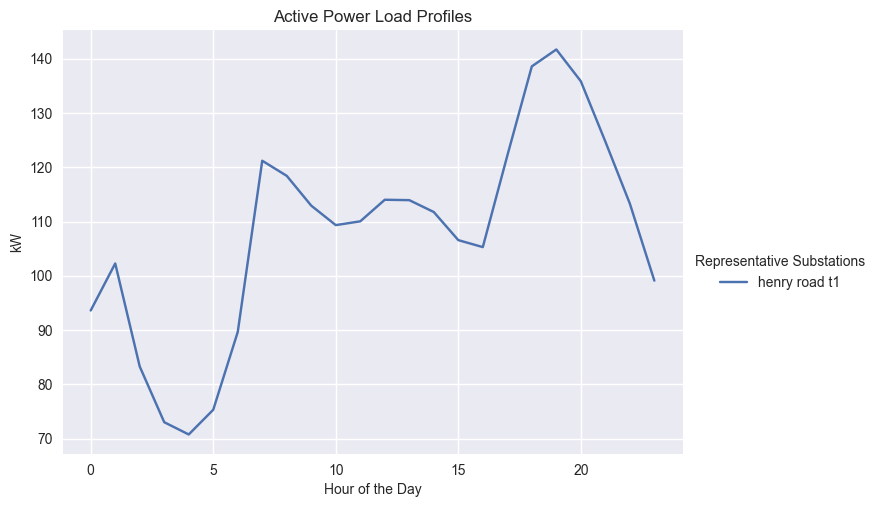

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


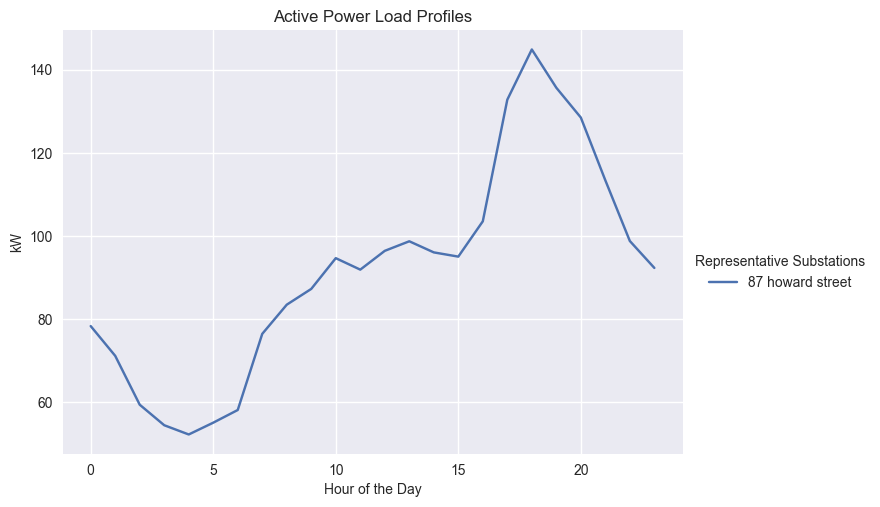

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


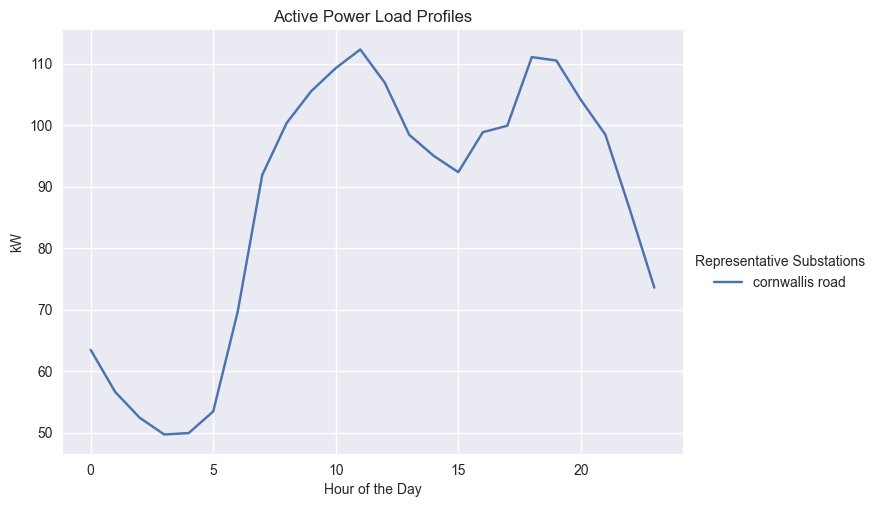

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


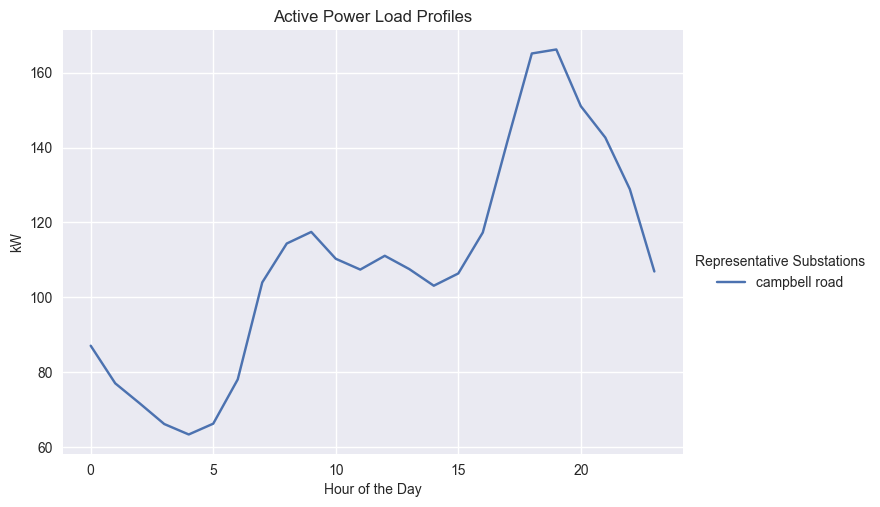

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


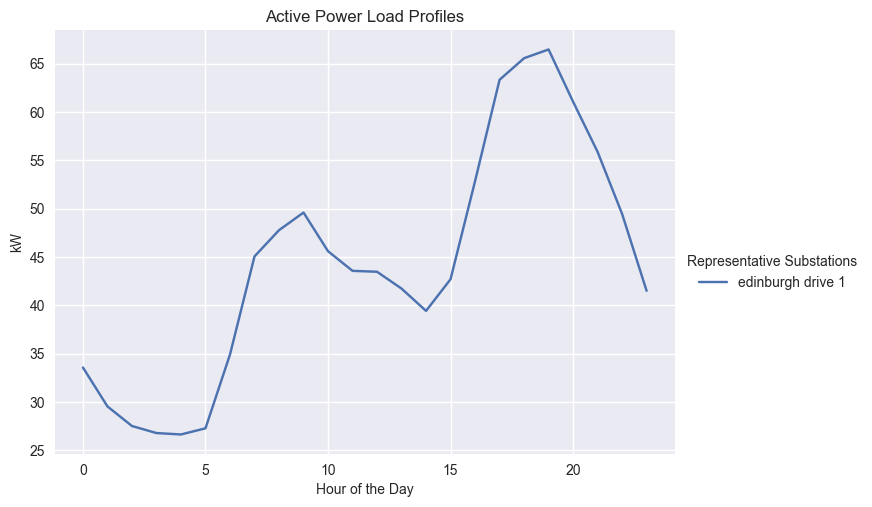

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


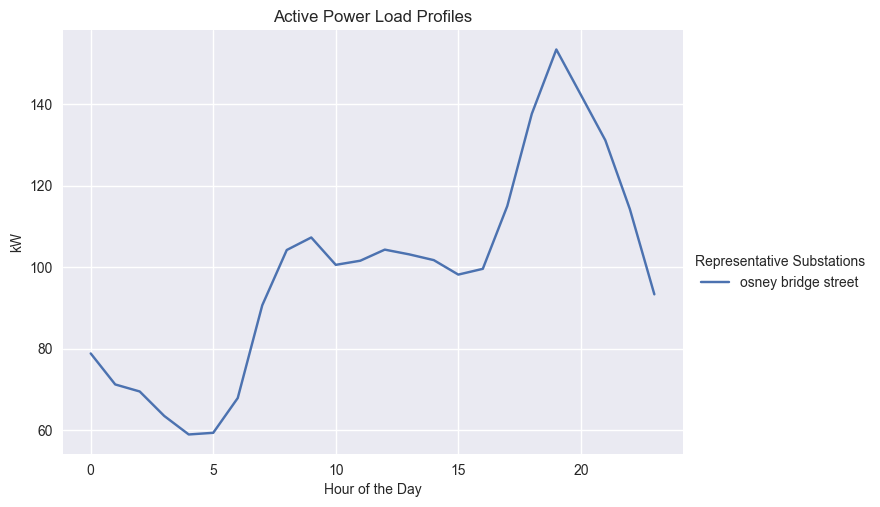

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


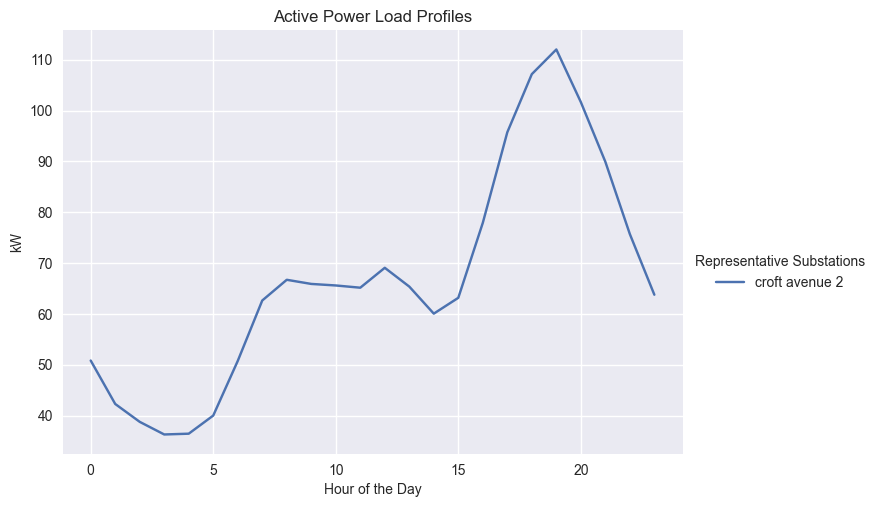

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


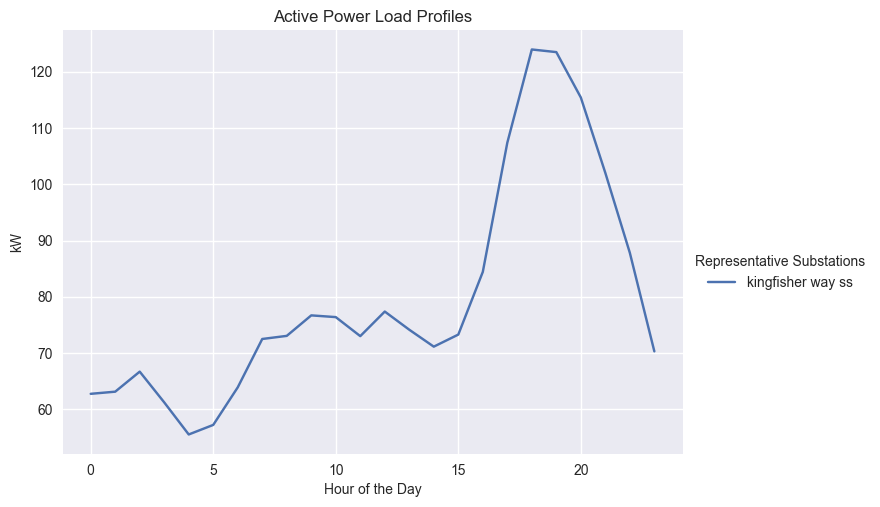

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


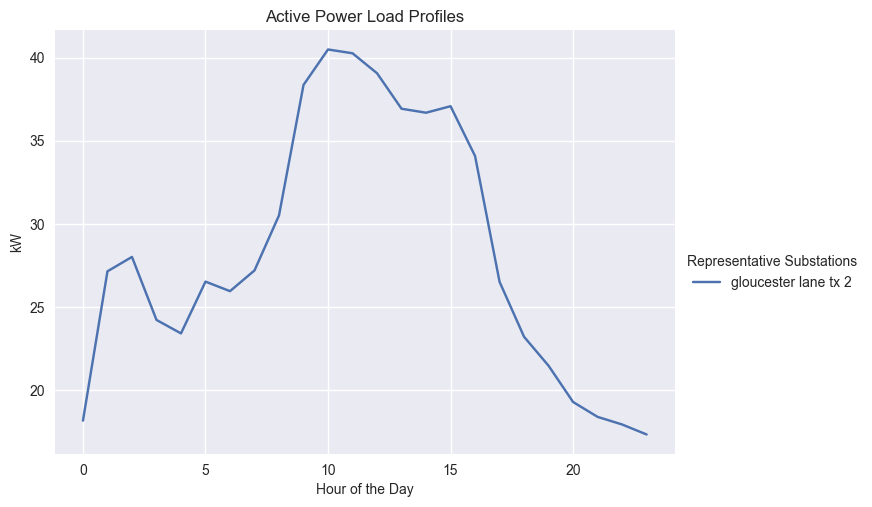

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


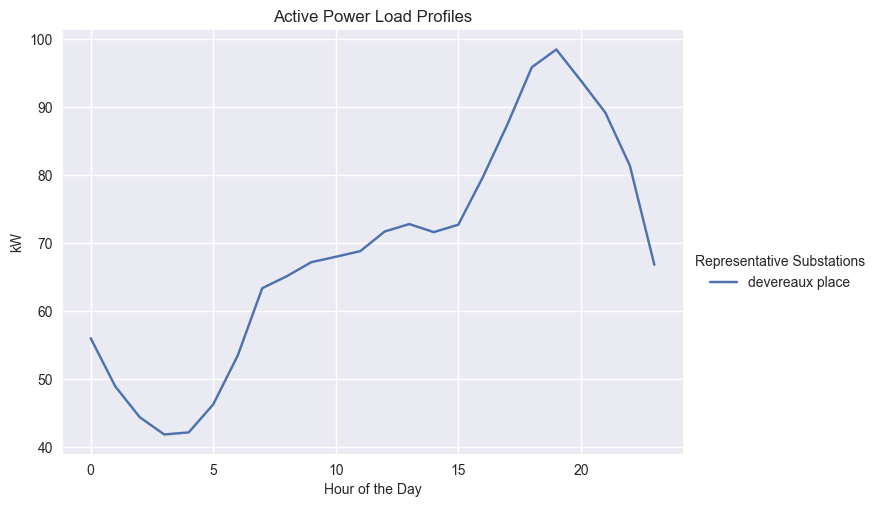

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


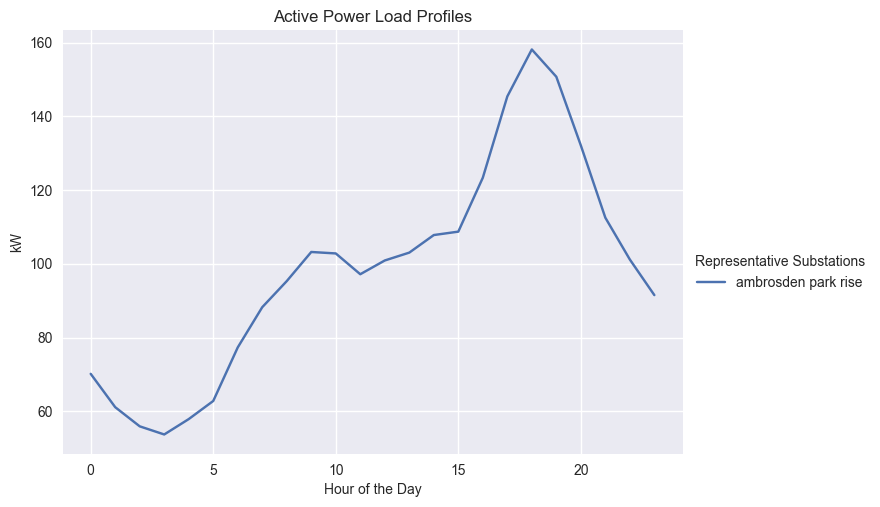

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


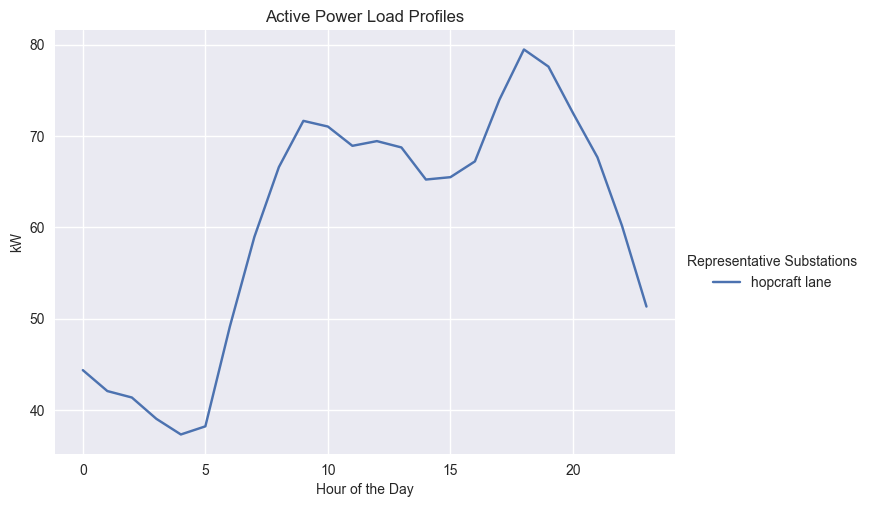

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


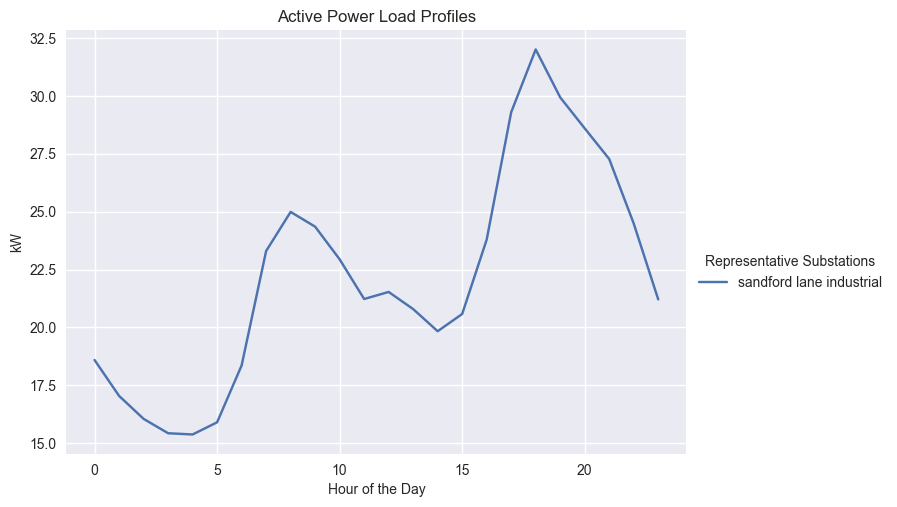

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


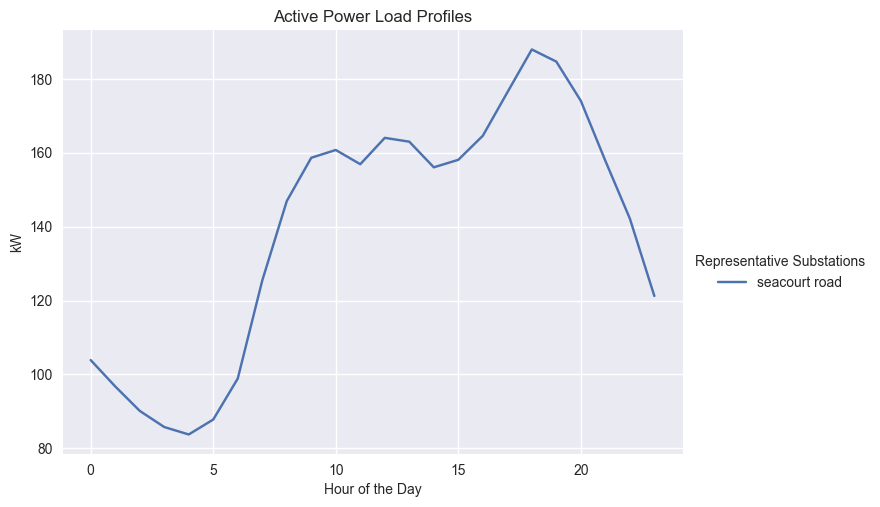

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


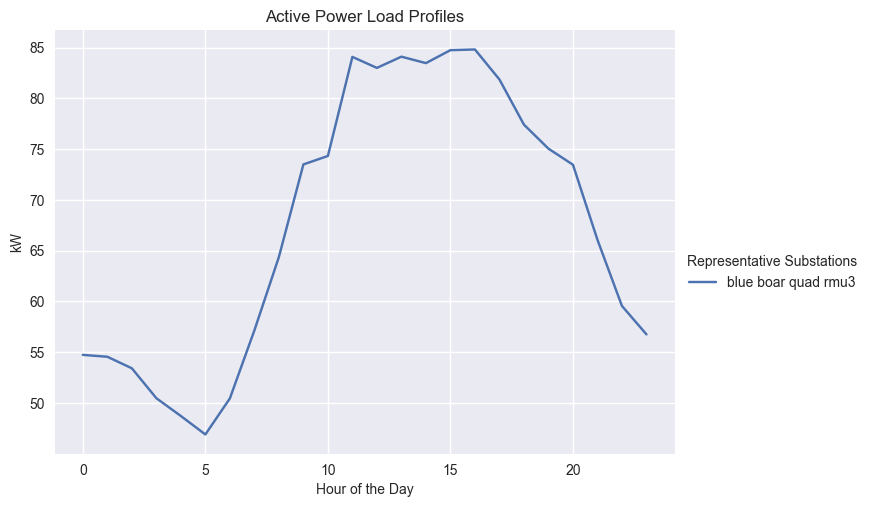

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


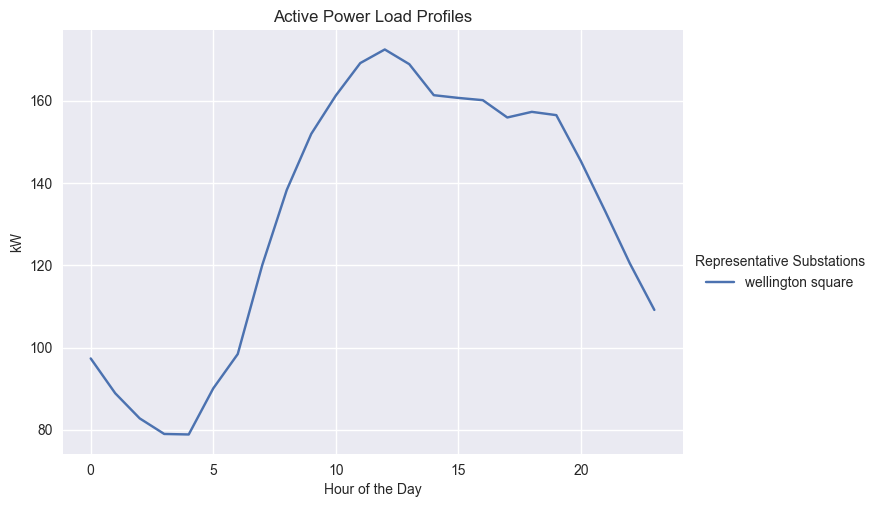

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


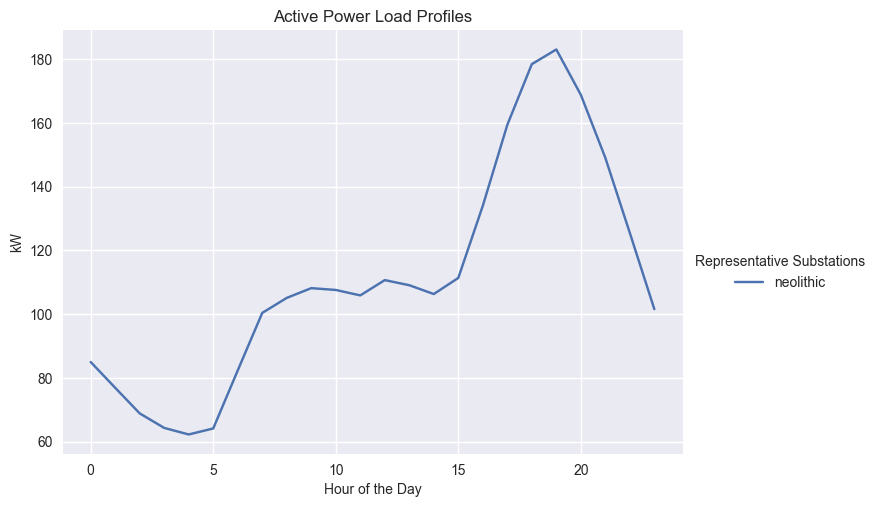

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


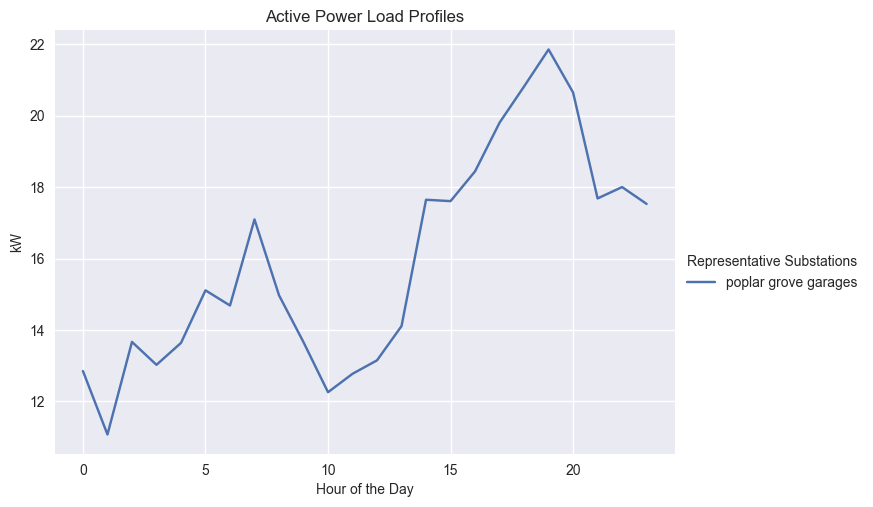

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


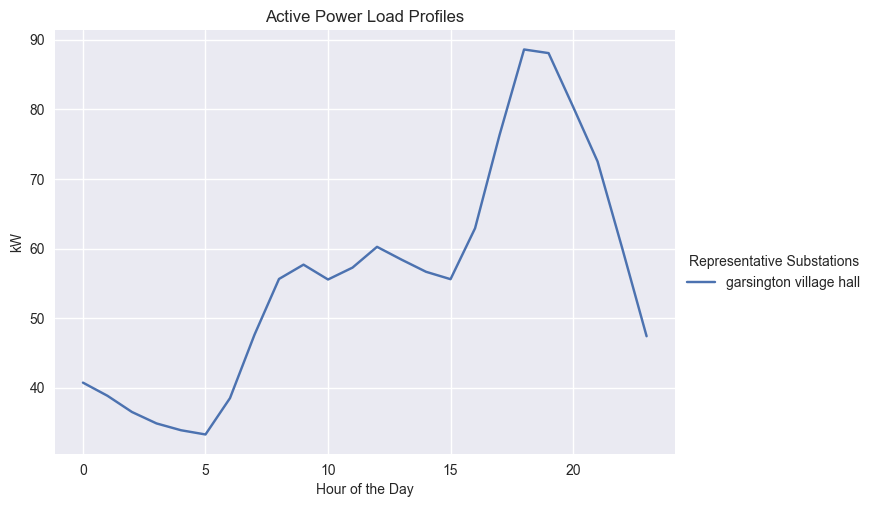

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


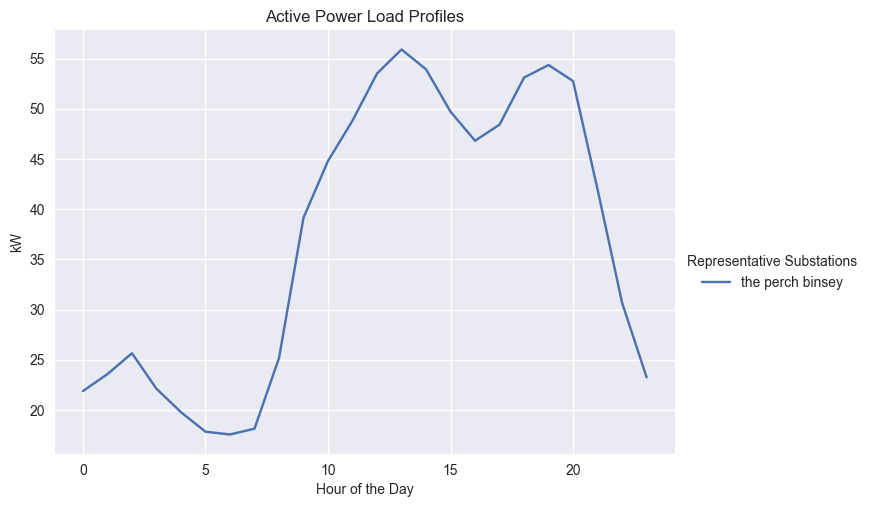

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


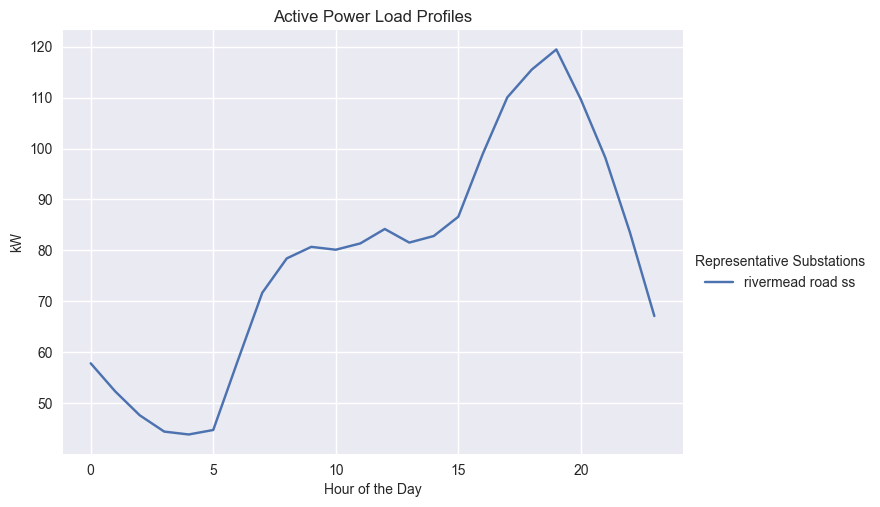

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


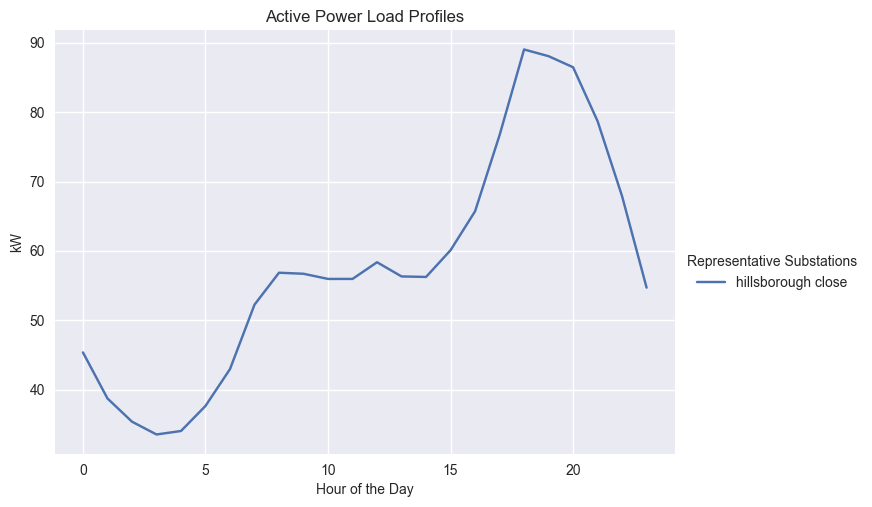

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


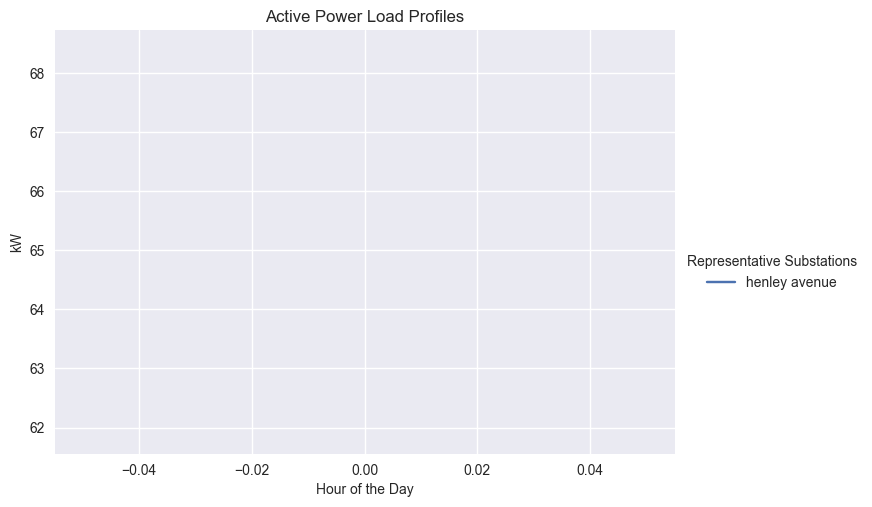

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


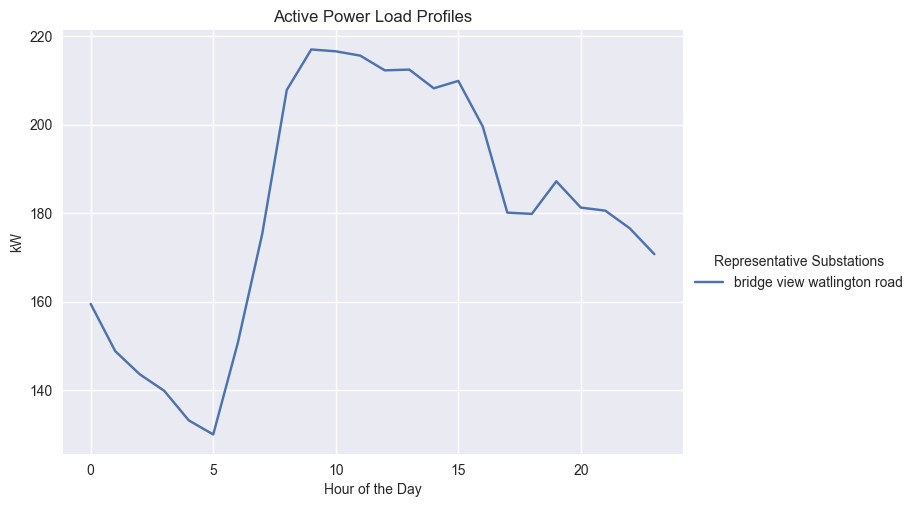

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


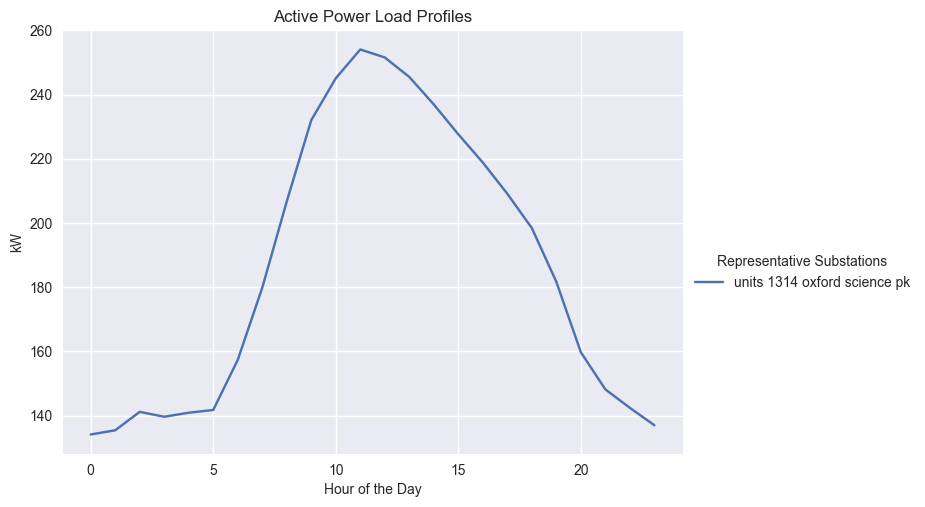

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


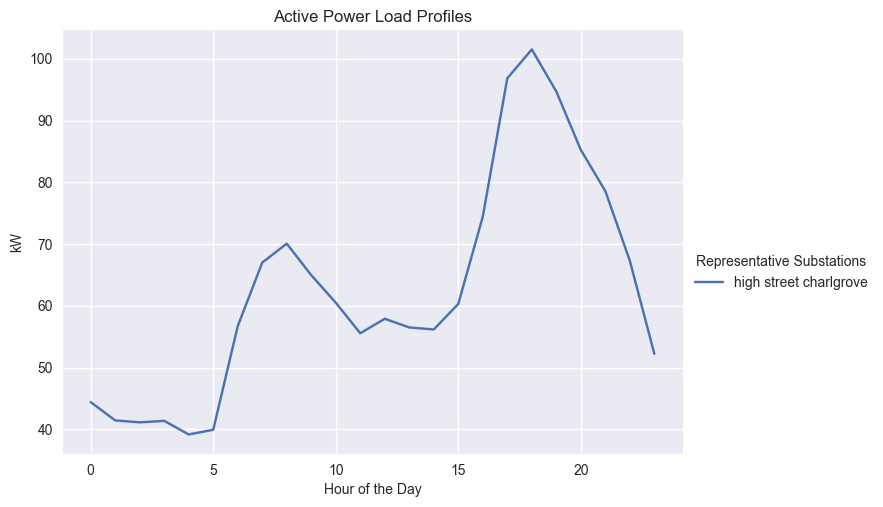

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


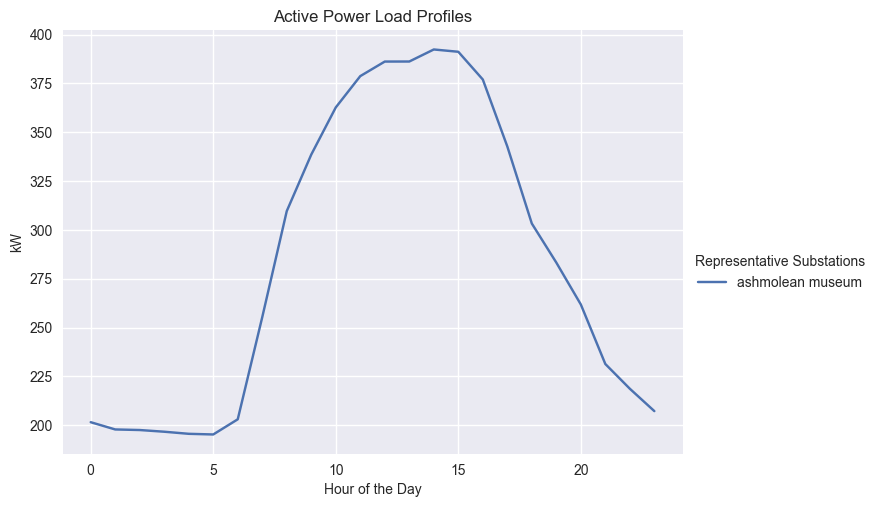

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


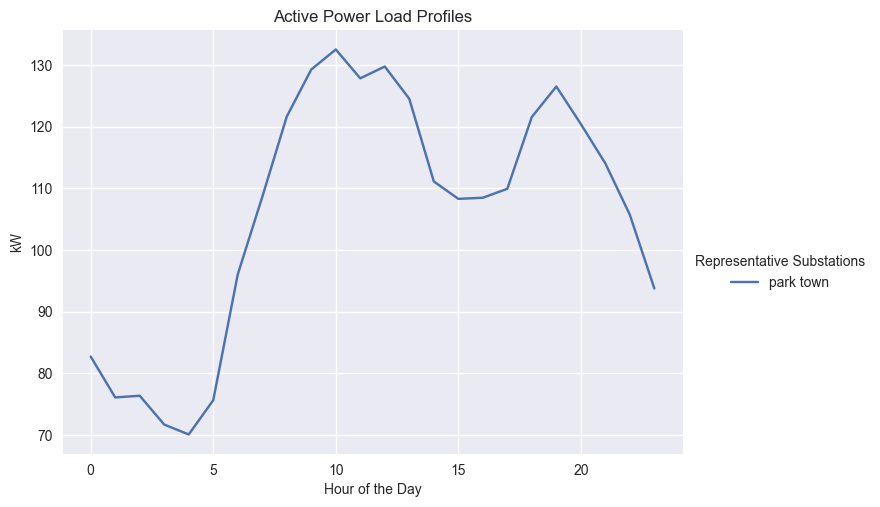

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


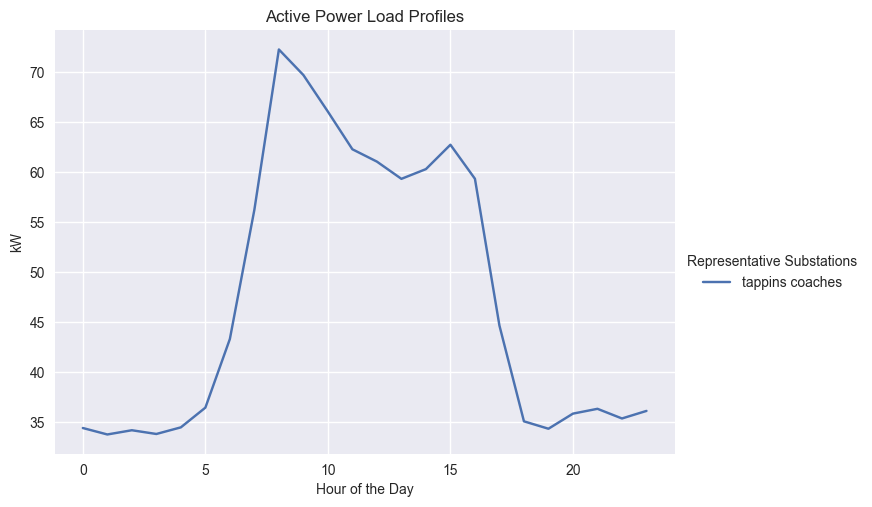

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


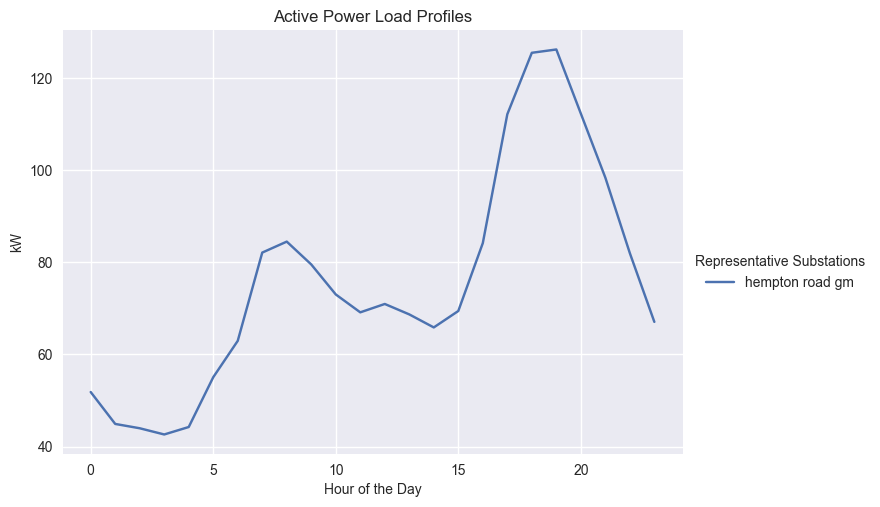

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


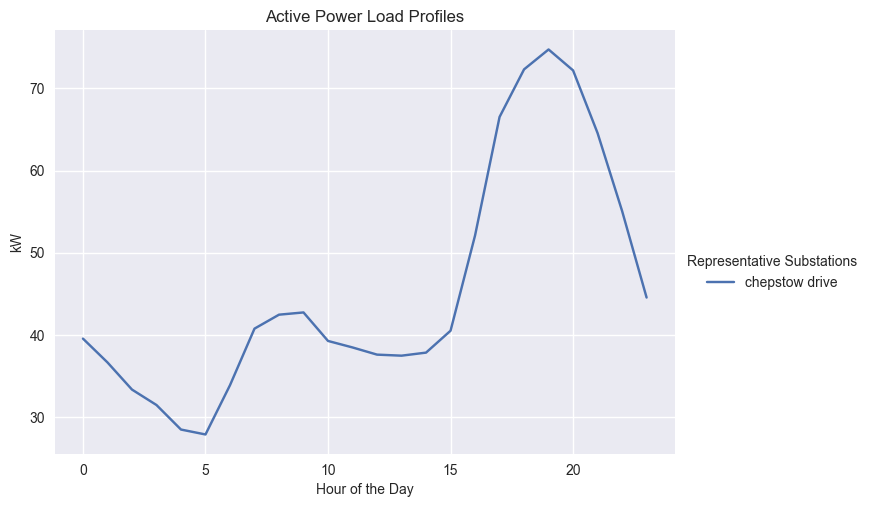

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


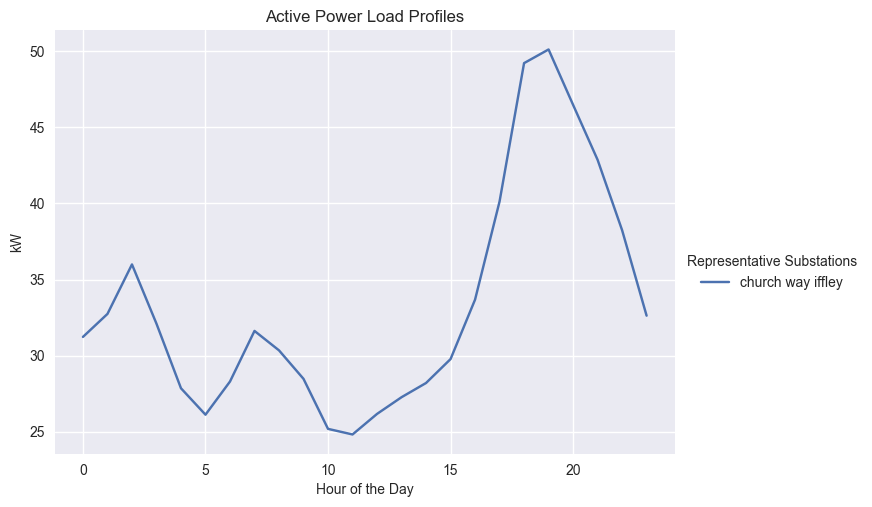

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


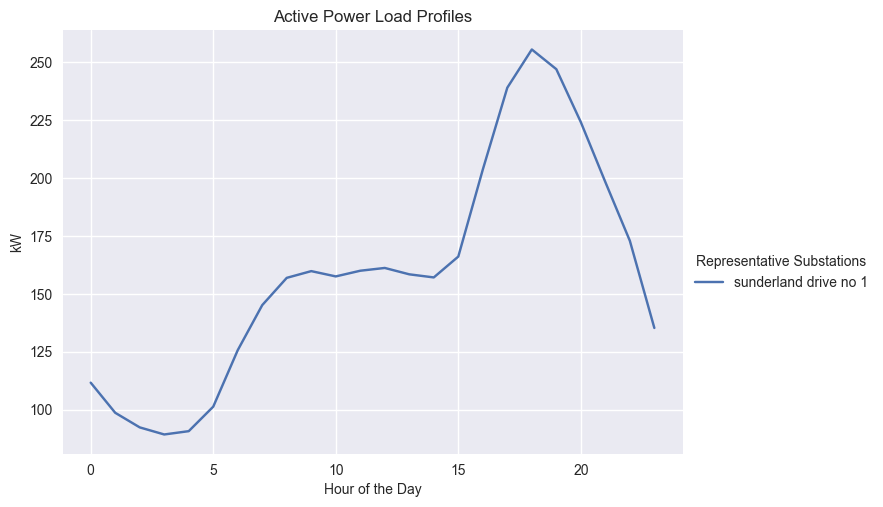

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


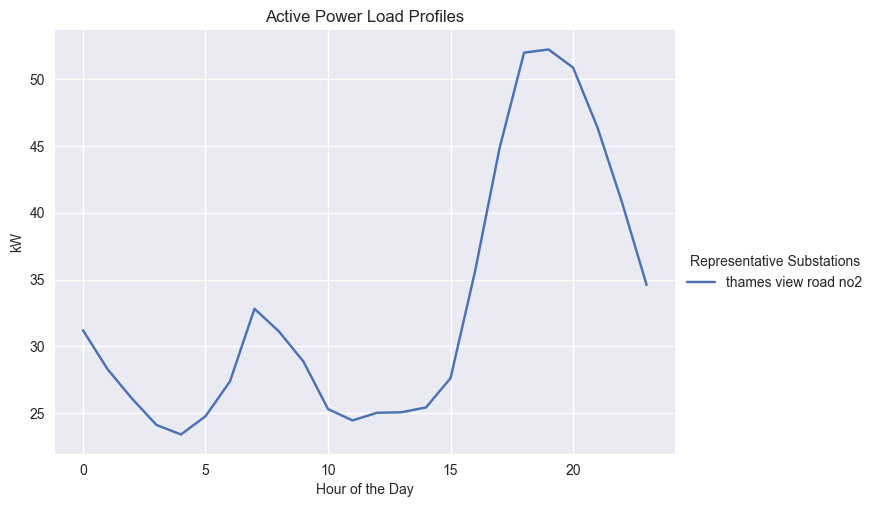

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


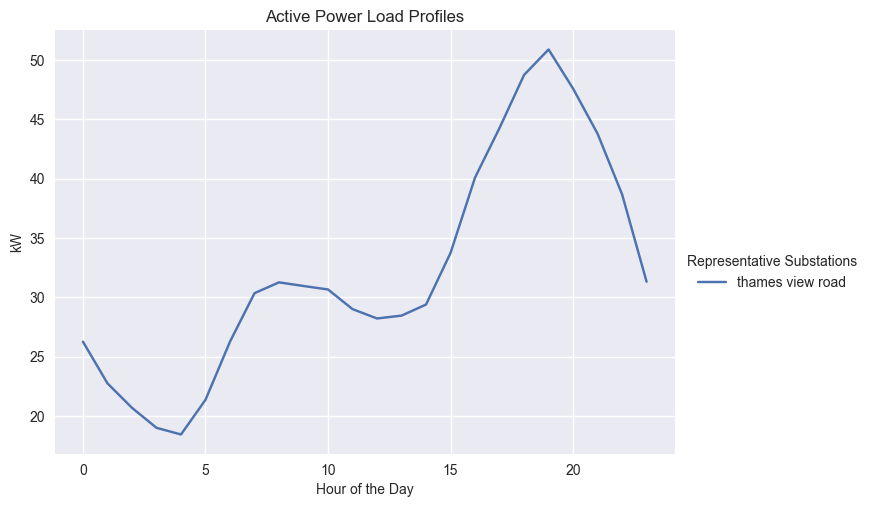

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


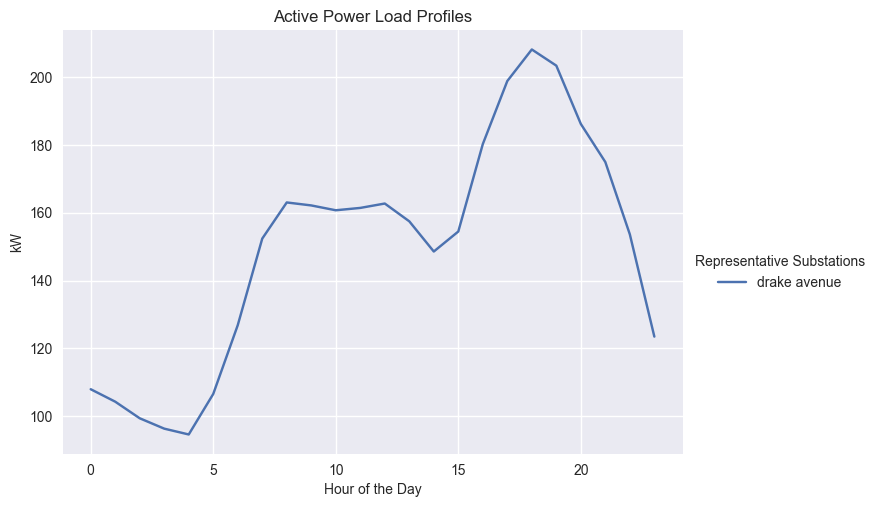

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


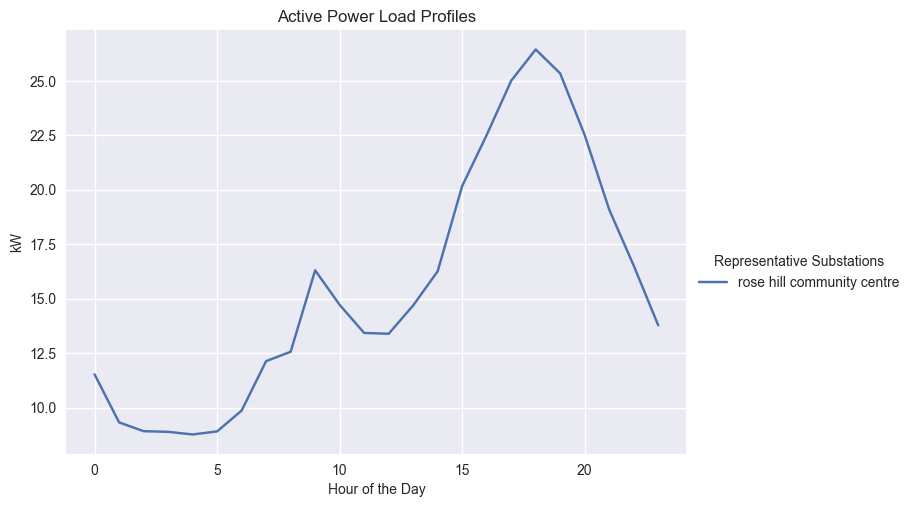

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


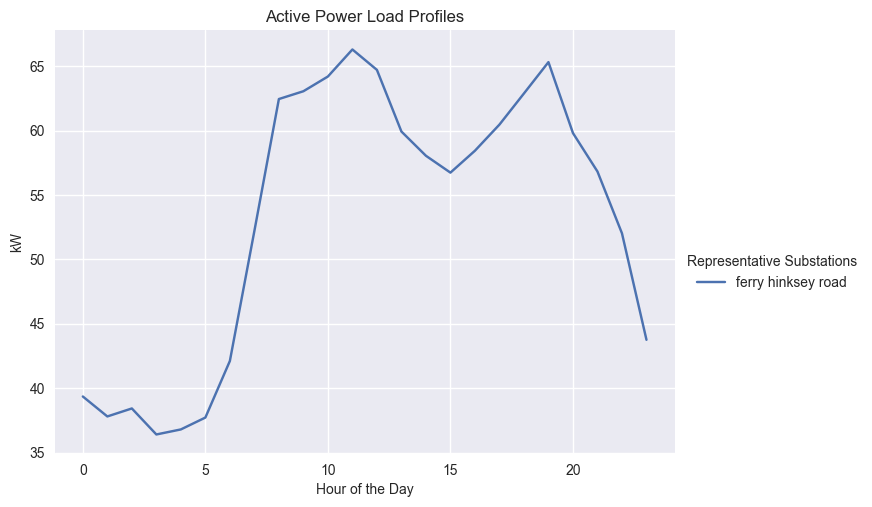

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


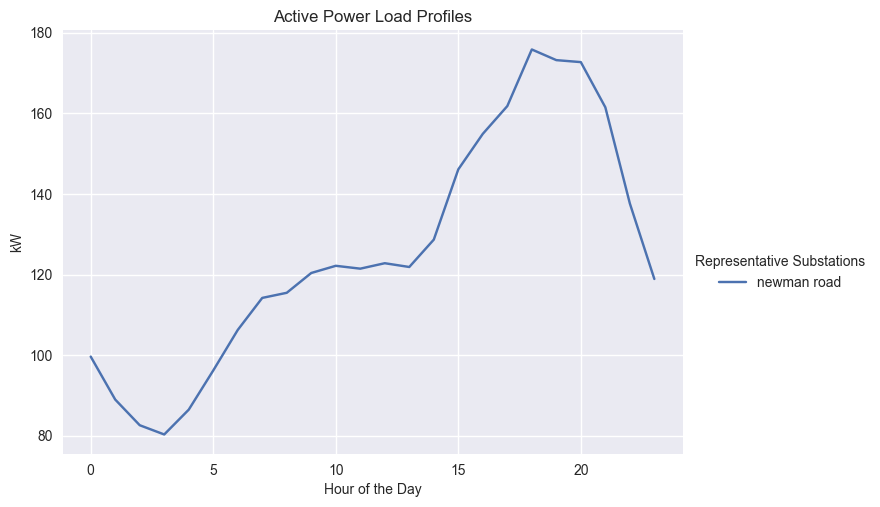

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


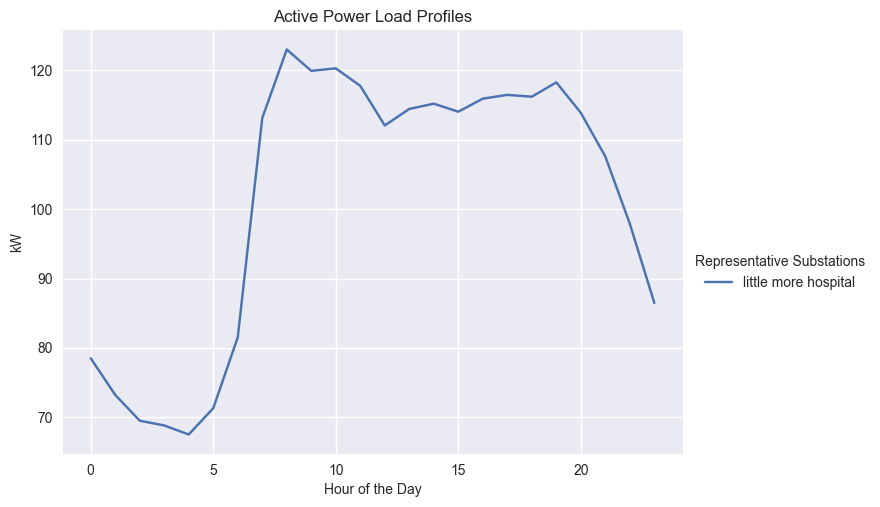

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


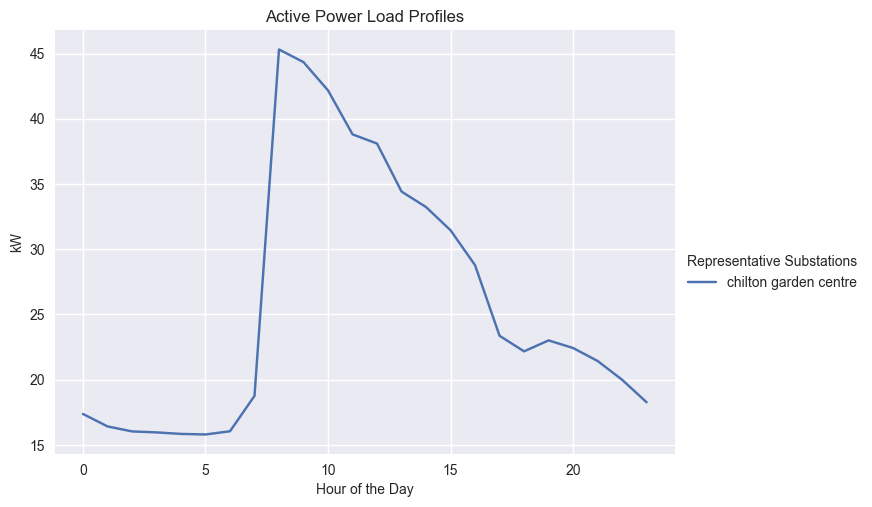

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


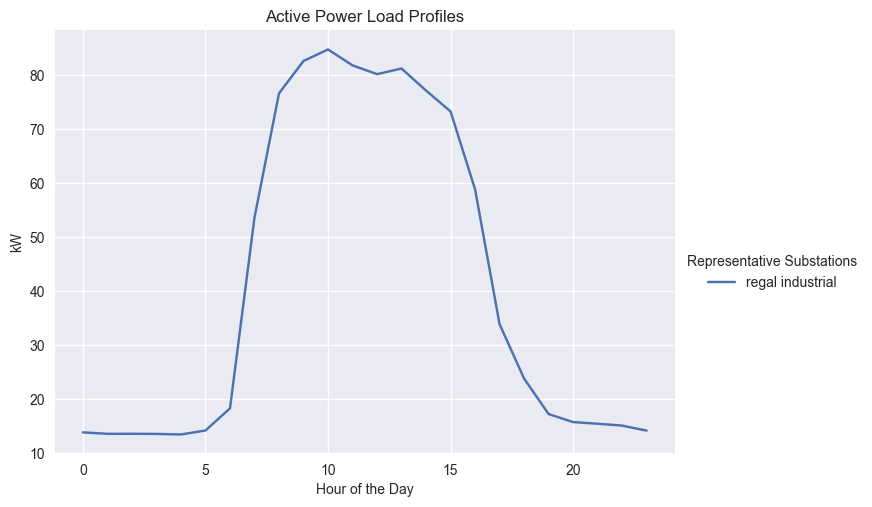

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


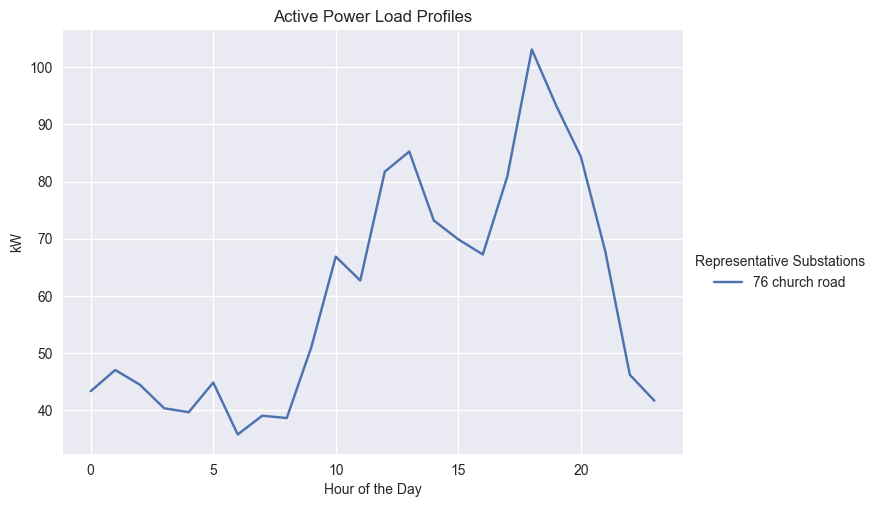

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


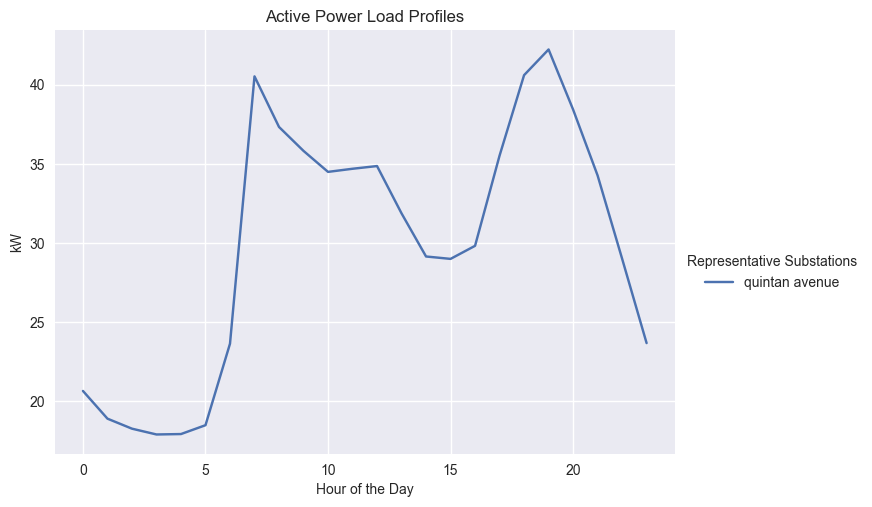

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


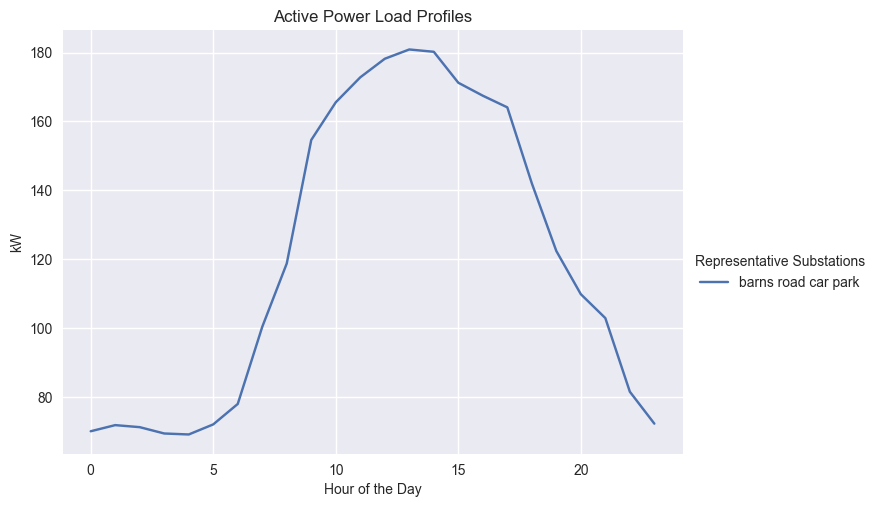

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


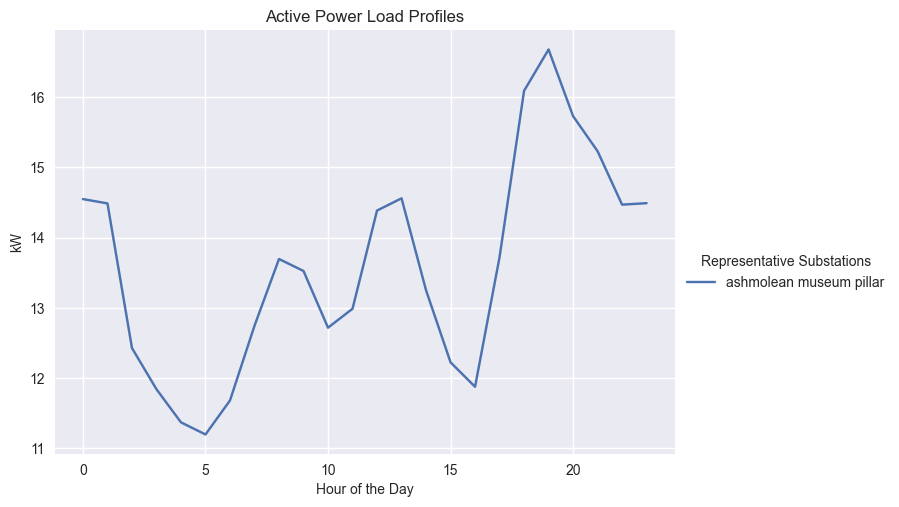

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


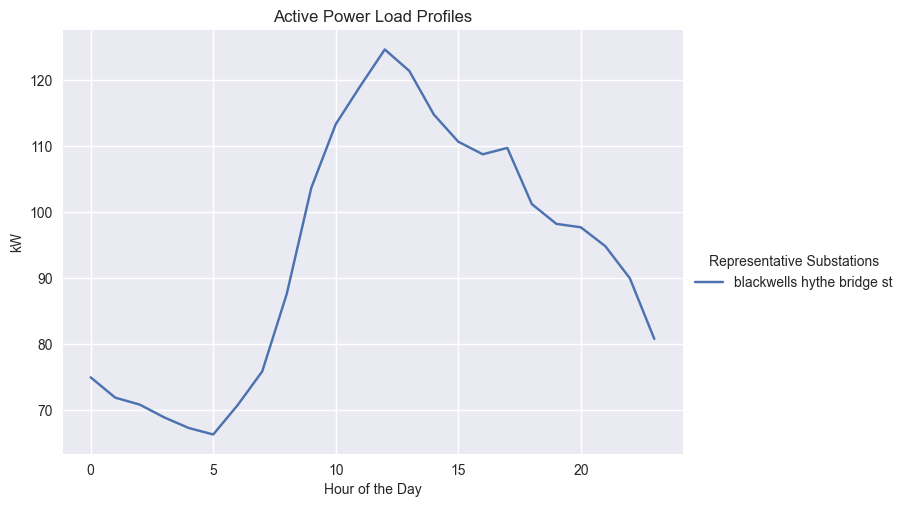

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


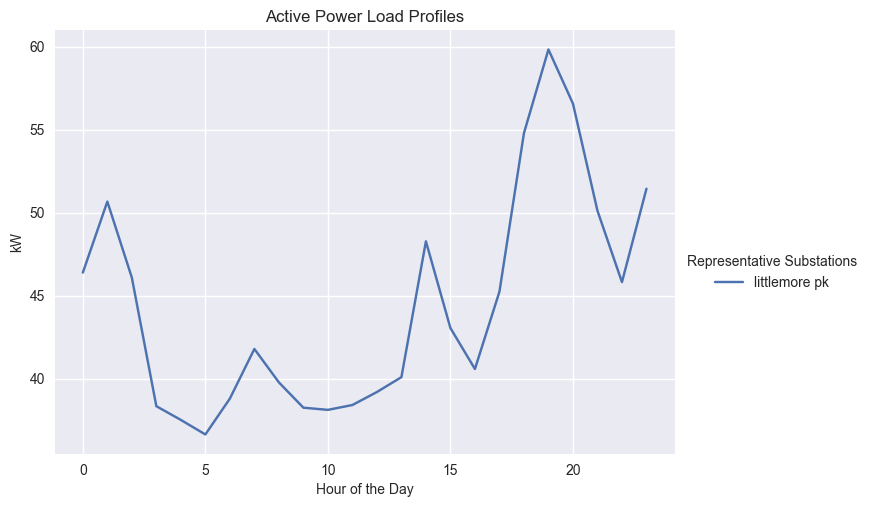

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


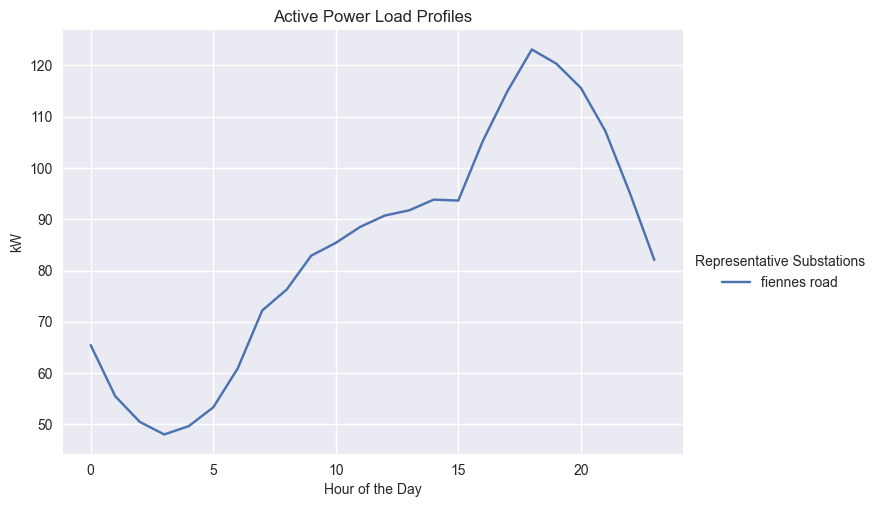

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


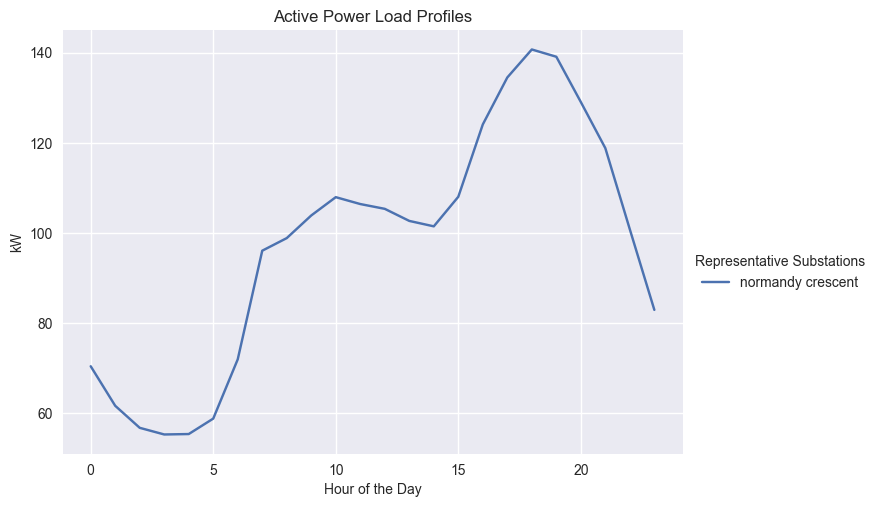

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


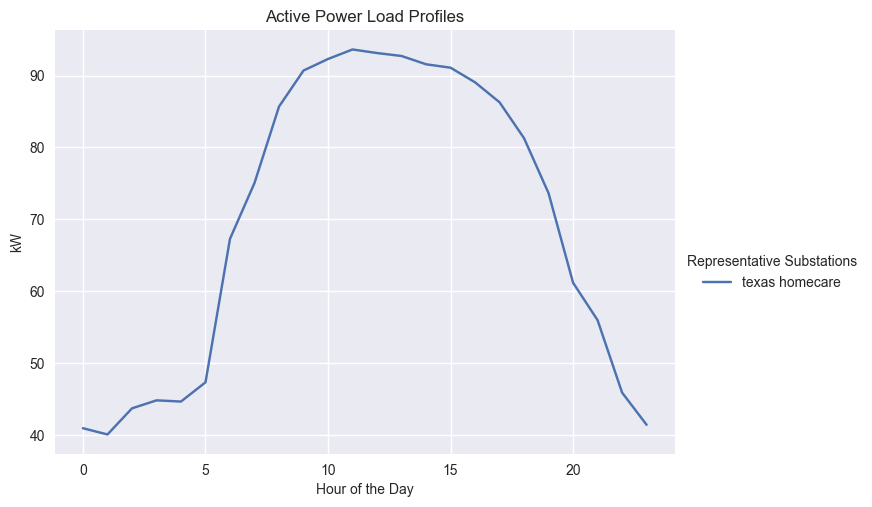

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


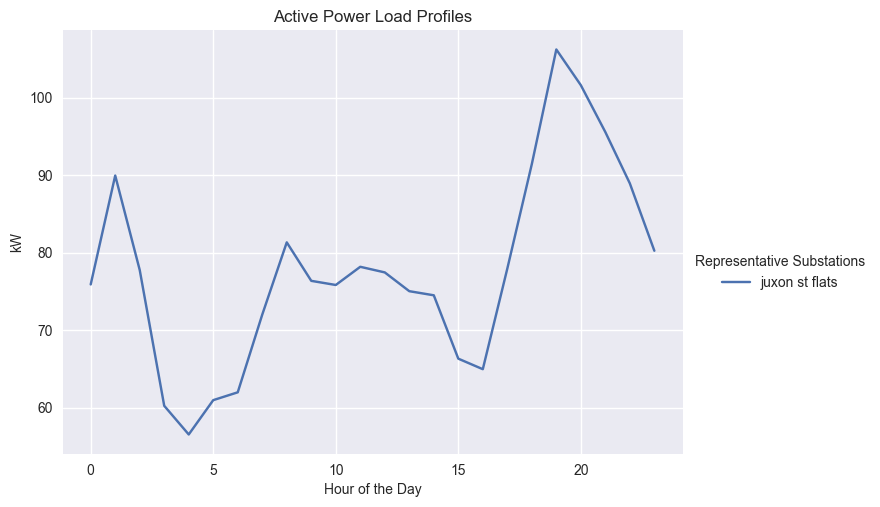

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


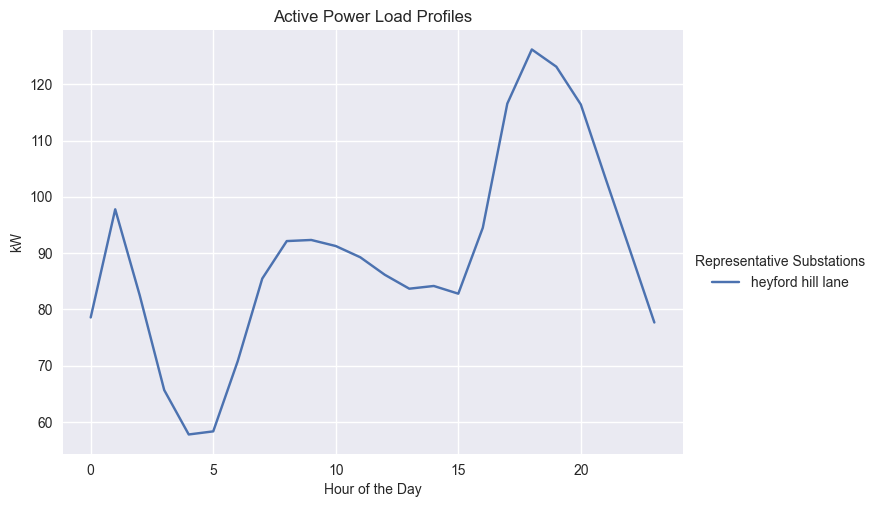

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


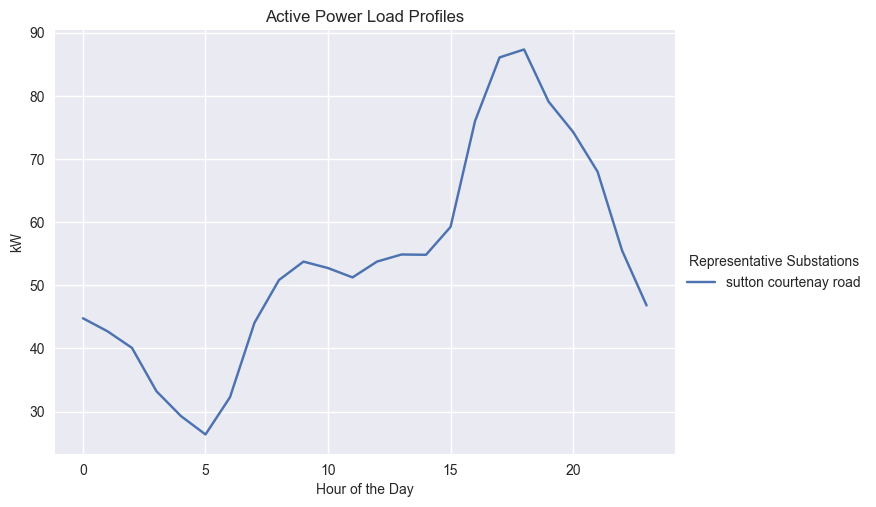

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


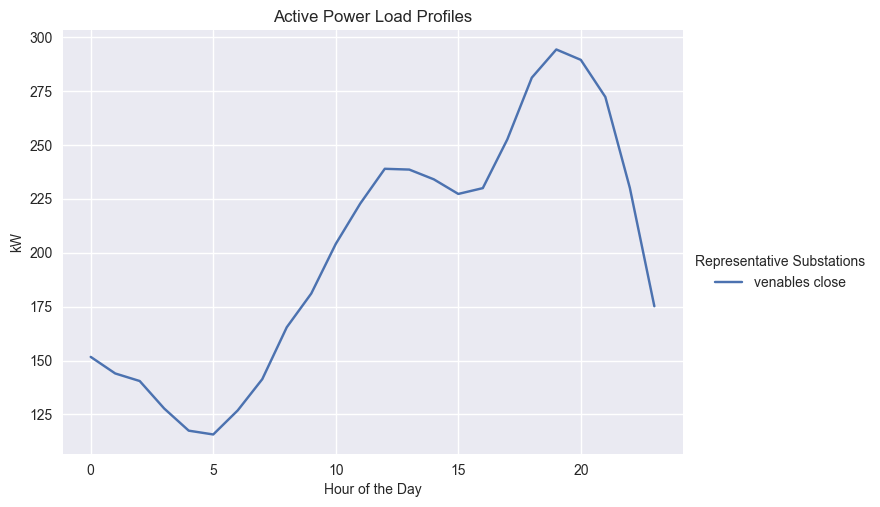

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


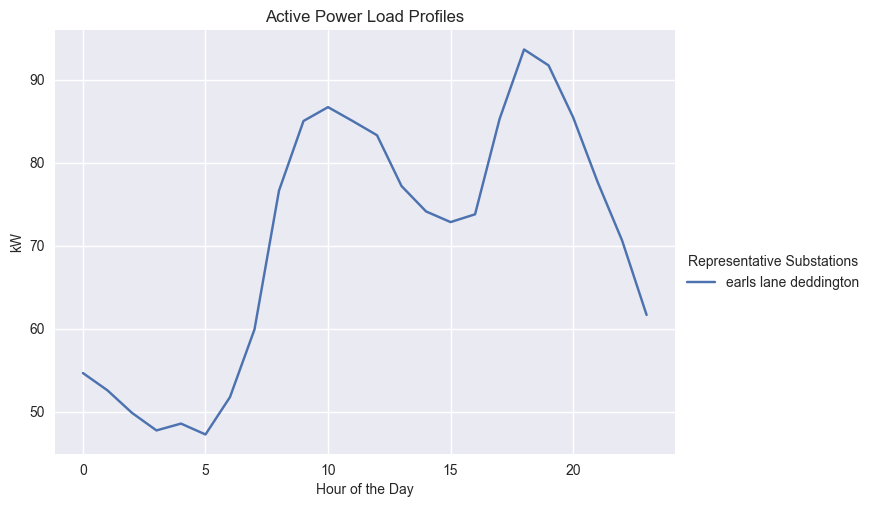

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


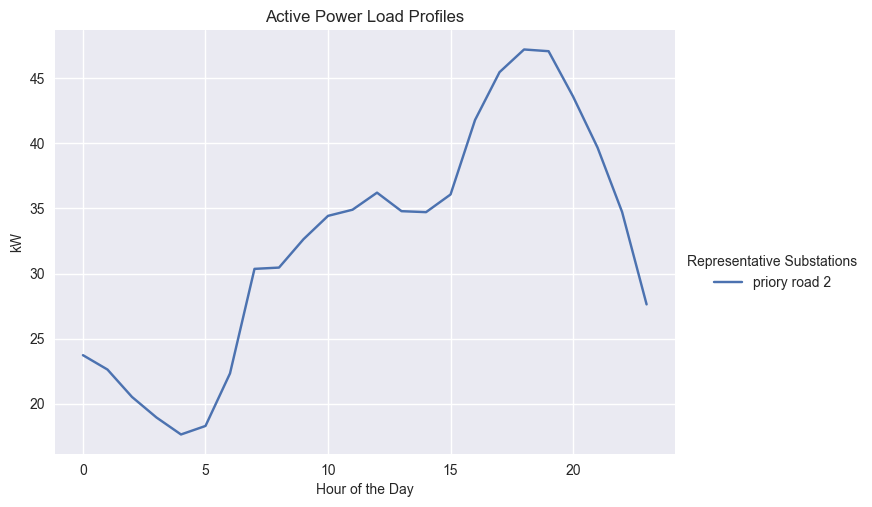

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


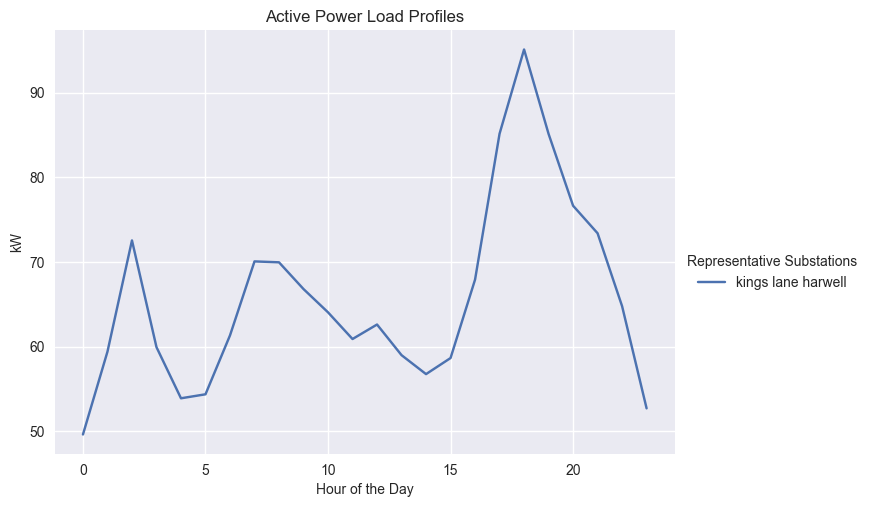

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


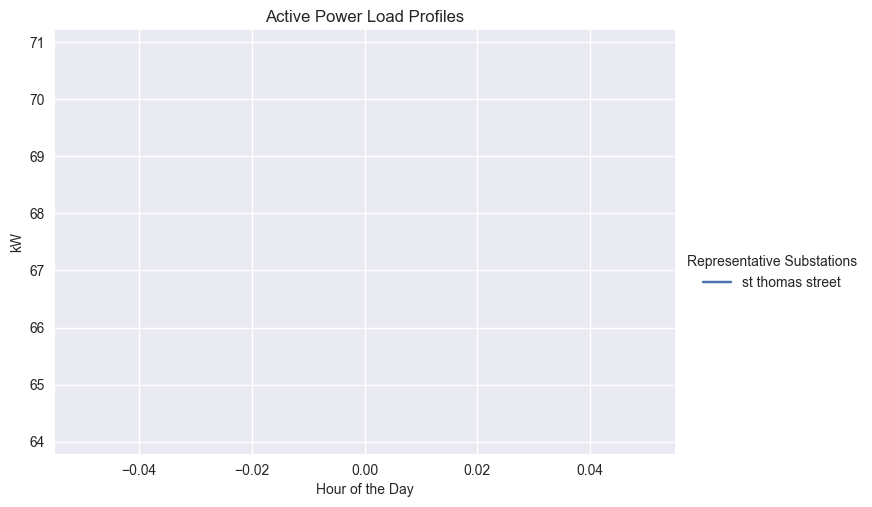

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


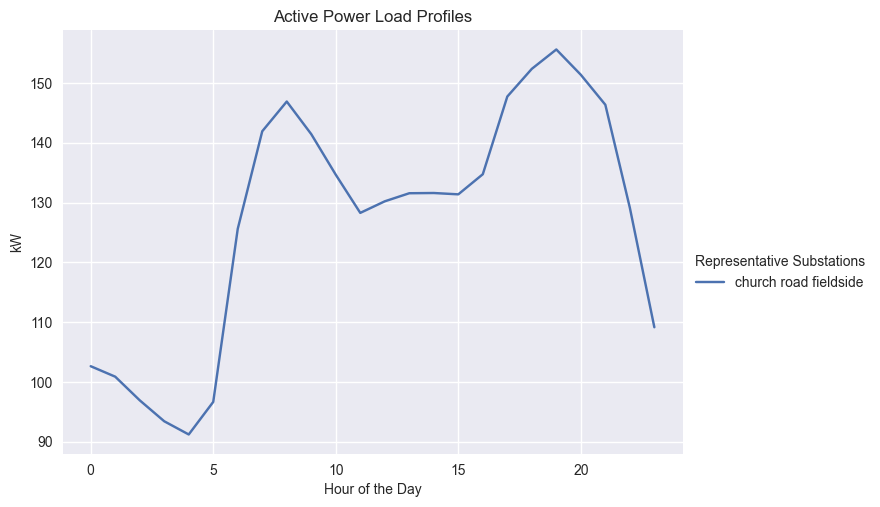

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


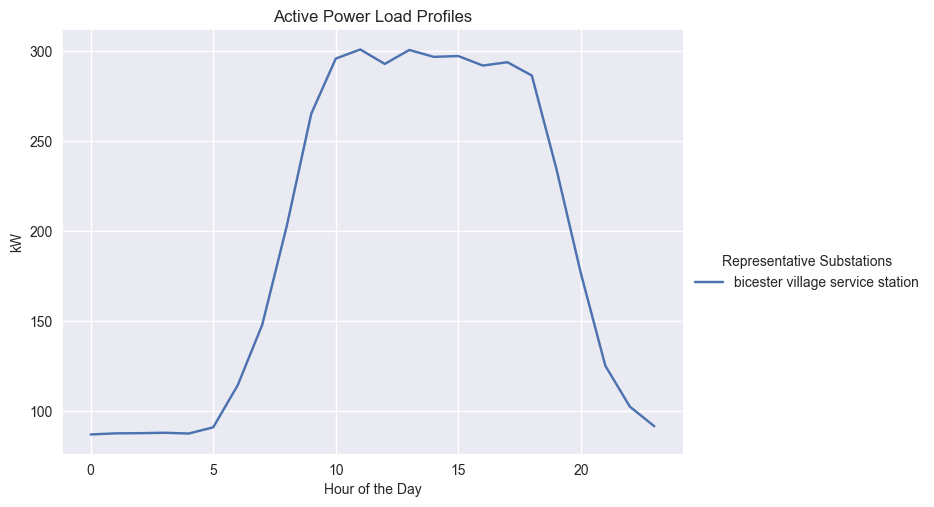

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


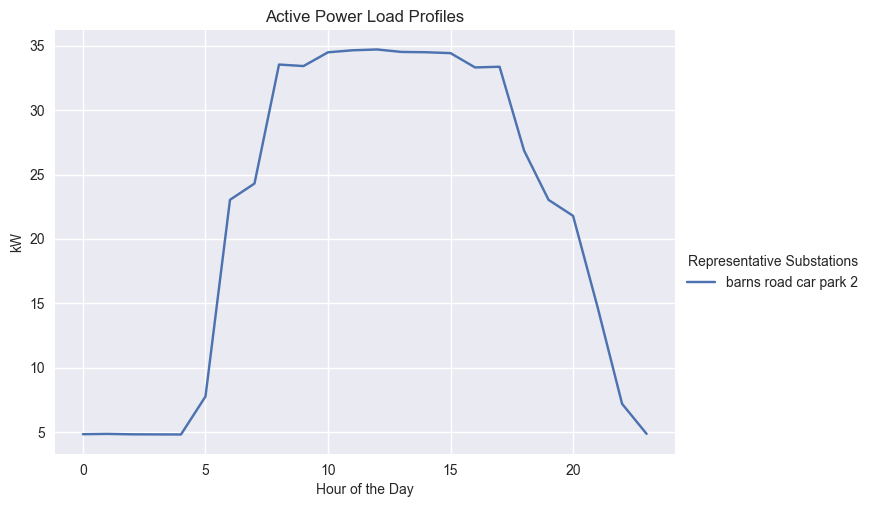

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


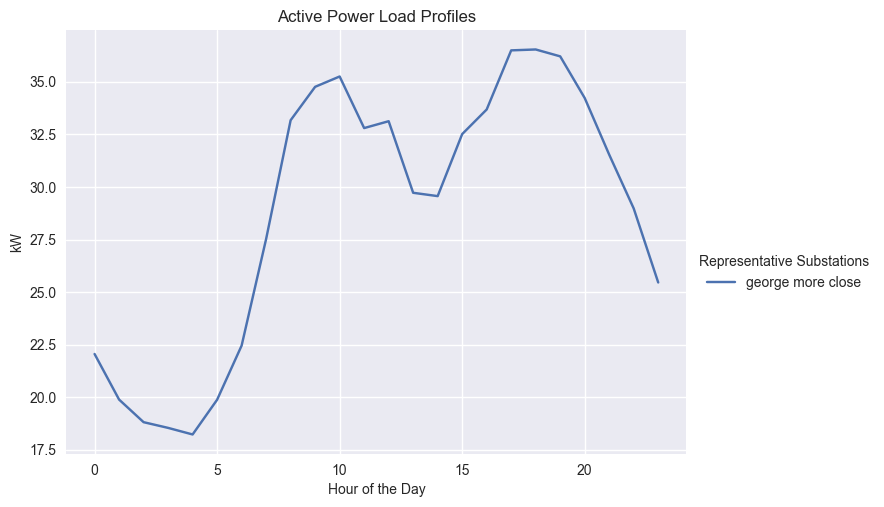

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


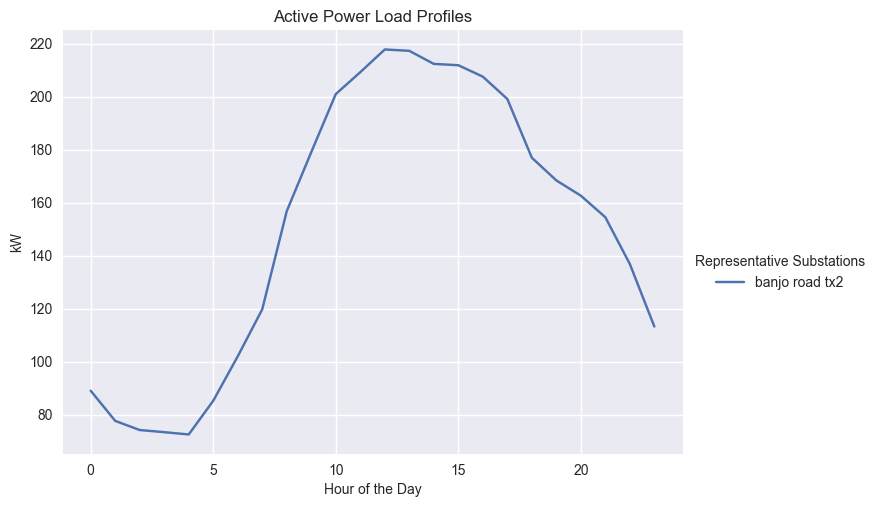

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


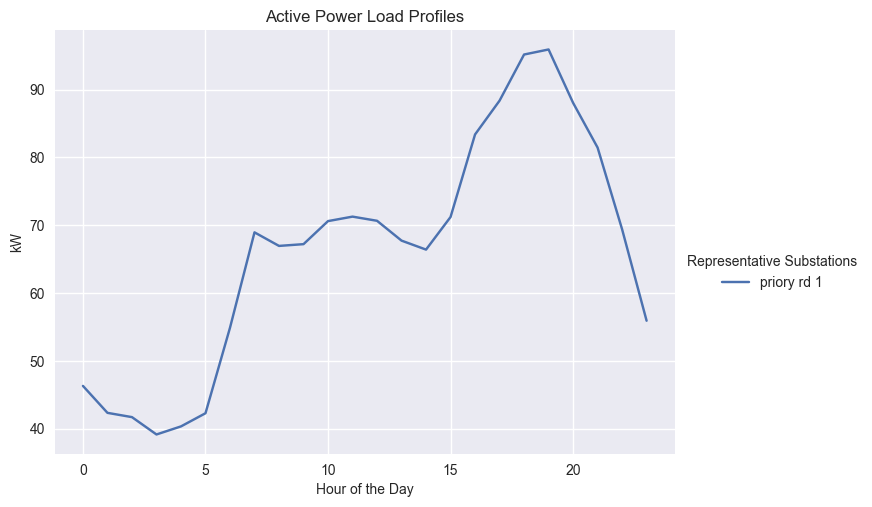

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


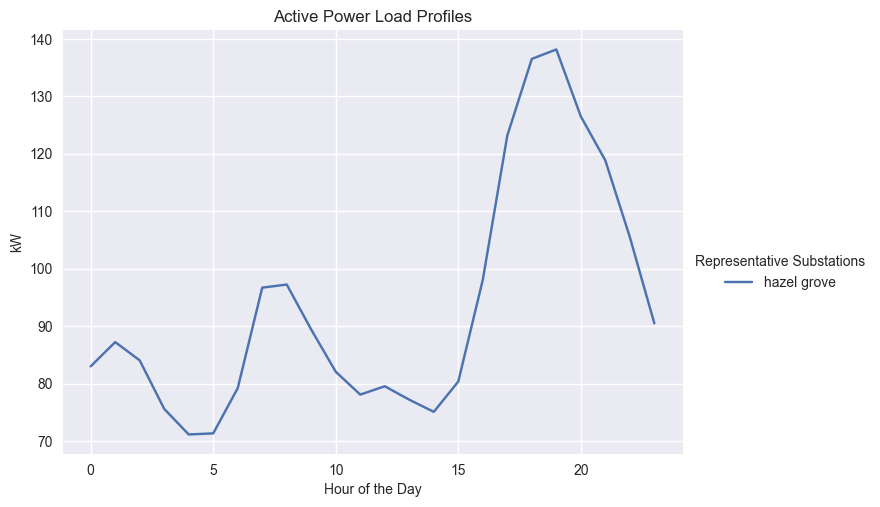

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_50458/3858305407.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


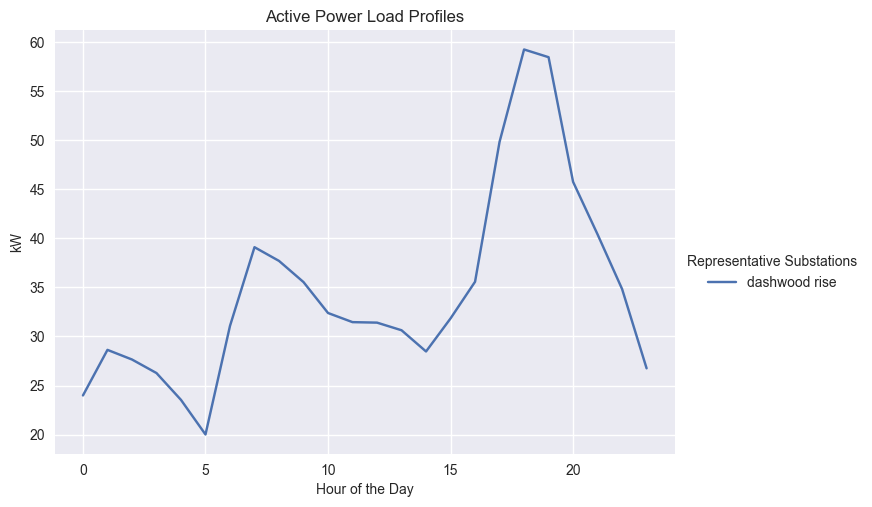

In [274]:
# plot median curve for all ss to see if would even make sense

### Plot the active power profiles for each cluster
for substation in dataframes.keys():
    #plt.plot(dataframes[substation].index, dataframes[substation]['Active Power [kW]'])
    plt.style.use('seaborn')
    # Plot all active power profiles
    dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
    plt.plot(dataframes[substation].groupby('Hour').agg('Active Power [kW]').median(), label=substation)
    plt.title(f'Active Power Load Profiles')
    plt.legend(loc='upper left', bbox_to_anchor=(1,0.5), title = 'Representative Substations')
    plt.xlabel('Hour of the Day')
    plt.ylabel('kW')
   # ax1.set_ylim(0, 750)
    plt.show()


In [9]:
dataframes[substation]

Phase  Feeder  Active Power [kW]  Reactive Power [kVAr]  \
0      All  Busbar          34.660000               1.820000   
1      All  Busbar         409.645000              55.048333   
2      All  Busbar          36.651667               1.261667   
3      All  Busbar          31.865000               1.496667   
4      All  Busbar          28.103333               1.723333   
...    ...     ...                ...                    ...   
4696   All  Busbar           2.405000               0.455000   
4697   All  Busbar           3.300000               0.230000   
4698   All  Busbar           4.055000               0.450000   
4699   All  Busbar           6.990000               0.230000   
4700   All  Busbar          11.520000               0.920000   

      Apparent Power [kVA]  Power Factor            Datetime  
0                34.714205     -0.997947 2022-01-01 00:00:00  
1               413.566743     -0.997872 2022-01-01 01:00:00  
2                36.675777     -0.999352 2022-01-01 02:00:00  
3                31.904936     -0.998794 2022-01-01 03:00:00  
4                28.162415     -0.997912 2022-01-01 04:00:00  
...                    ...           ...                 ...  
4696              2.450780     -0.980349 2022-10-18 03:00:00  
4697              3.308005     -0.997580 2022-10-18 05:00:00  
4698              4.080231     -0.993872 2022-10-18 06:00:00  
4699              6.993783     -0.999459 2022-10-18 08:00:00  
4700             11.556678     -0.996826 2022-11-01 09:00:00  

[4677 rows x 7 columns]

In [11]:
median_profiles = {}
for substation in dataframes:
    dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
    median_profiles[substation] = pd.DataFrame(dataframes[substation].groupby('Hour').agg('Active Power [kW]').median())

In [348]:
from sklearn.metrics.pairwise import euclidean_distances

# Extract the data from the dataframes and put them in a list
data = [df['Active Power [kW]'].values for df in median_profiles.values()]
data_flat = np.array([item for sublist in data for item in sublist]).reshape(-1,1)
# Calculate the pairwise Euclidean distances between the time series profiles
distances = euclidean_distances(data_flat)

In [43]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw
power_profiles = []
for substation in median_profiles:
    power_profiles.append(median_profiles[substation]['Active Power [kW]'].values)
    
for idx, ss in enumerate(power_profiles):
    if len(ss) != 24:
        print(idx, len(ss))
        power_profiles.pop(idx)
        
 #Stack the power profiles vertically into a 2D numpy array
X = np.vstack(power_profiles)

# Define the number of clusters you want to create
n_clusters = 3

# Create a TimeSeriesKMeans object with the DTW metric and the desired number of clusters
km = TimeSeriesKMeans(n_clusters=n_clusters, metric='euclidean')

# Fit the model to the data
km.fit(X)

# Print the labels for each substation
for i, label in enumerate(km.labels_):
    print(f"Substation {i}: Cluster {label}")

53 1
89 1
Substation 0: Cluster 0
Substation 1: Cluster 2
Substation 2: Cluster 2
Substation 3: Cluster 2
Substation 4: Cluster 0
Substation 5: Cluster 2
Substation 6: Cluster 0
Substation 7: Cluster 2
Substation 8: Cluster 2
Substation 9: Cluster 2
Substation 10: Cluster 2
Substation 11: Cluster 0
Substation 12: Cluster 2
Substation 13: Cluster 0
Substation 14: Cluster 0
Substation 15: Cluster 2
Substation 16: Cluster 0
Substation 17: Cluster 0
Substation 18: Cluster 2
Substation 19: Cluster 0
Substation 20: Cluster 2
Substation 21: Cluster 0
Substation 22: Cluster 0
Substation 23: Cluster 2
Substation 24: Cluster 0
Substation 25: Cluster 0
Substation 26: Cluster 0
Substation 27: Cluster 1
Substation 28: Cluster 0
Substation 29: Cluster 0
Substation 30: Cluster 0
Substation 31: Cluster 2
Substation 32: Cluster 2
Substation 33: Cluster 2
Substation 34: Cluster 2
Substation 35: Cluster 0
Substation 36: Cluster 2
Substation 37: Cluster 0
Substation 38: Cluster 0
Substation 39: Cluster 0


In [60]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw

# Create a dictionary to hold the power profiles for each substation
power_profiles = {}

# Extract the power profiles from each dataframe and add them to the dictionary
for substation in median_profiles:
    # Check if the power profile has 24 hours
    if len(median_profiles[substation]['Active Power [kW]']) == 24:
        power_profiles[substation] = median_profiles[substation]['Active Power [kW]'].values

# Stack the power profiles vertically into a 2D numpy array
X = np.vstack(list(power_profiles.values()))

# Define the number of clusters you want to create
n_clusters = 3

# Create a TimeSeriesKMeans object with the DTW metric and the desired number of clusters
km = TimeSeriesKMeans(n_clusters=n_clusters, metric='euclidean', random_state=42)

# Fit the model to the data
km.fit(X)



# Create a dictionary to hold the cluster label for each substation
substation_clusters = {}

# Assign the cluster label for each substation
for i, label in enumerate(km.labels_):
    substation_name = list(power_profiles.keys())[i]
    substation_clusters[substation_name] = label

# Print the labels for each substation)
for substation_name, label in substation_clusters.items():
    print(f"{substation_name}: Cluster {label}")
    


Mill St flats: Cluster 0
Gloucester Green: Cluster 1
Hockmore Street: Cluster 1
osney mead pylon : Cluster 1
queens lane telephone exchange: Cluster 0
Swan mews: Cluster 1
minchery farm pumping station: Cluster 0
Dan Read Parade: Cluster 2
brookhampton: Cluster 2
The Grove Deddington: Cluster 2
Paradise Street RMU B: Cluster 2
windmill st deddington: Cluster 0
Osney local: Cluster 2
southern by pass: Cluster 2
woodcroft: Cluster 0
Barry Avenue: Cluster 2
hempton road duns tew: Cluster 0
edinburgh drive pillar 2: Cluster 2
Nowell road: Cluster 2
henry road T2: Cluster 0
Morris house (barns road): Cluster 2
St John Way Hempton: Cluster 0
croft avenue 1: Cluster 0
kennington church (cow lane): Cluster 2
Gloucester lane tx 1: Cluster 0
Sherwood close : Cluster 0
Springfield Road: Cluster 0
medawar centre : Cluster 1
Desborough crescent: Cluster 0
Danvers Road: Cluster 0
banjo road tx1 : Cluster 0
henry road T1: Cluster 2
87 Howard Street : Cluster 2
cornwallis road: Cluster 2
campbell road

In [83]:
# make dataframe from substation clusters dictionary
substation_clusters_df = pd.DataFrame.from_dict(substation_clusters, orient='index', columns=['Cluster'])
substation_clusters_df.value_counts()
substation_clusters_df['substation'] = substation_clusters_df.index
substation_clusters_df.reset_index(inplace = True)
substation_clusters_df

RangeIndex(start=0, stop=97, step=1)

In [81]:
# Plot 
centers = []
for center in km.cluster_centers_:
    min_distance = float("inf")
    min_substation = ""
    for idx, substation in enumerate(power_profiles):
        distance = dtw(center, power_profiles[substation])
        if distance < min_distance:
            min_distance = distance
            min_substation = substation_clusters_df[idx]
    centers.append((min_substation, center))
centers

KeyError: 0

Substation Mill St flats: Cluster 2
Substation Gloucester Green: Cluster 0
Substation Hockmore Street: Cluster 0
Substation osney mead pylon : Cluster 0
Substation queens lane telephone exchange: Cluster 2
Substation Swan mews: Cluster 0
Substation minchery farm pumping station: Cluster 2
Substation Dan Read Parade: Cluster 1
Substation brookhampton: Cluster 1
Substation The Grove Deddington: Cluster 1
Substation Paradise Street RMU B: Cluster 1
Substation windmill st deddington: Cluster 2
Substation Osney local: Cluster 1
Substation southern by pass: Cluster 1
Substation woodcroft: Cluster 2
Substation Barry Avenue: Cluster 1
Substation hempton road duns tew: Cluster 1
Substation edinburgh drive pillar 2: Cluster 1
Substation Nowell road: Cluster 1
Substation henry road T2: Cluster 2
Substation Morris house (barns road): Cluster 1
Substation St John Way Hempton: Cluster 2
Substation croft avenue 1: Cluster 2
Substation kennington church (cow lane): Cluster 1
Substation Gloucester lane

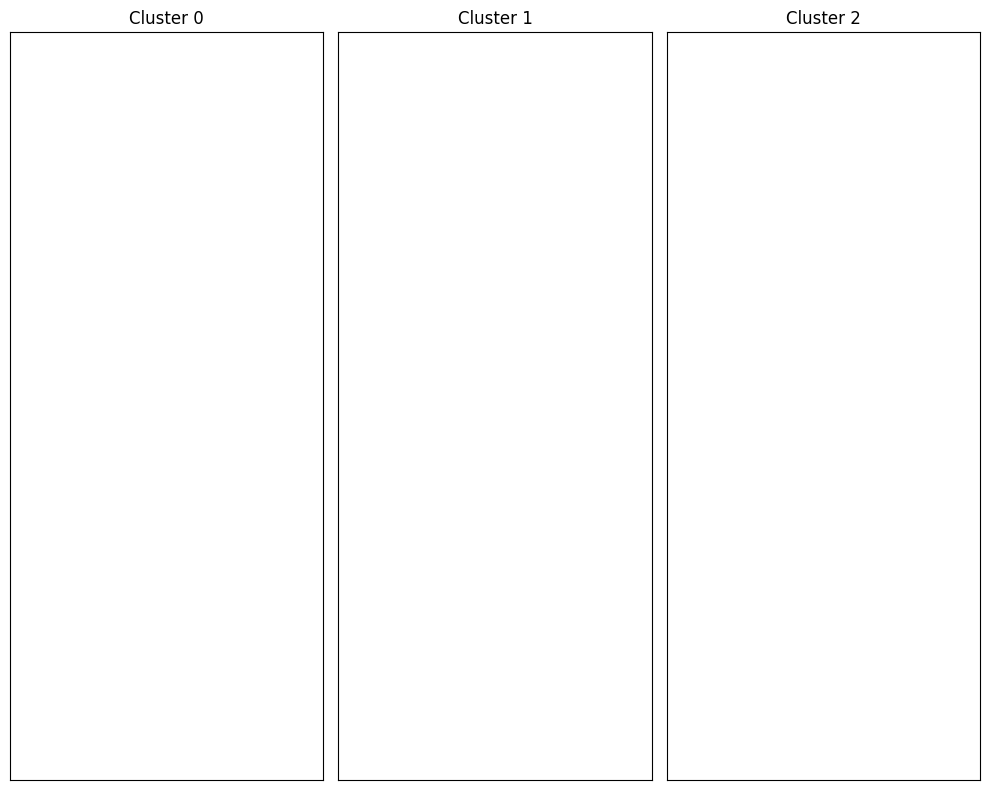

In [86]:
substation_names = list(median_profiles.keys())

# Extract the active power profiles and stack them into a numpy array
power_profiles = []
for substation in median_profiles:
    power_profiles.append(median_profiles[substation]['Active Power [kW]'].values)

# Remove power profiles that are not 24 hours long
for idx, ss in enumerate(power_profiles):
    if len(ss) != 24:
        power_profiles.pop(idx)

# Stack the power profiles vertically into a 2D numpy array
X = np.vstack(power_profiles)

# Define the number of clusters you want to create
n_clusters = 3

# Create a TimeSeriesKMeans object with the DTW metric and the desired number of clusters
km = TimeSeriesKMeans(n_clusters=n_clusters, metric='euclidean')

# Fit the model to the data
km.fit(X)

# Get the cluster centers and the names of the substations they represent
centers = []
for i in range(n_clusters):
    indices = np.where(km.labels_ == i)[0]
    center = X[indices].mean(axis=0)
    center_substation_names = [substation_names[j] for j in indices]
    centers.append((center_substation_names, center))
    
# Print the labels for each substation
for i, label in enumerate(km.labels_):
    print(f"Substation {substation_names[i]}: Cluster {label}")
    
# Plot the cluster centers
plt.figure(figsize=(10, 8))
for i, (center_substation_names, center) in enumerate(centers):
    plt.subplot(1, n_clusters, i+1)
    for j in range(center.shape[0]):
        plt.plot(center[j])
    plt.title(f"Cluster {i}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()


In [358]:
from pyomo.environ import *
import numpy as np

# Data
#data = np.array([df['Active Power [kW]'].values for df in median_profiles.values()])
data = [df['Active Power [kW]'].values for df in median_profiles.values()]
data_flat = np.array([item for sublist in data for item in sublist]).reshape(-1,1)
# Parameters
N = data_flat.shape[0]  # number of data points
K = 4  # number of clusters
d = euclidean_distances(data_flat)  # pairwise distances between data points

# Model
model = ConcreteModel()

# Variables
model.x = Var(range(N), range(K), within=Binary)

# Objective function
model.obj = Objective(expr=sum(d[i,j] * model.x[i,j] for i in range(N) for j in range(K)))

# Constraints
model.sum_rows = ConstraintList()
for i in range(N):
    model.sum_rows.add(sum(model.x[i,j] for j in range(K)) == 1)
    
model.sum_cols = ConstraintList()
for j in range(K):
    model.sum_cols.add(sum(model.x[i,j] for i in range(N)) >= 1)

# Solver
solver = SolverFactory('glpk')

# Solve the model
solver.solve(model)

# Extract the cluster assignments
cluster_assignments = [0] * N
for i in range(N):
    for j in range(K):
        if model.x[i,j]() == 1:
            cluster_assignments[i] = j

print(cluster_assignments)


    solver 'glpk'


ApplicationError: No executable found for solver 'glpk'

# Monthly clustering

In [101]:
substation_monthly_power = pd.DataFrame(index=dataframes.keys(), columns=range(1,13))

for substation, dataframe in dataframes.items():
    dataframe['Datetime'] = pd.to_datetime(dataframe['Datetime'])
    dataframe['Hour'] = dataframe['Datetime'].dt.hour
    dataframe['Date'] = dataframe['Datetime'].dt.date
    dataframe['Month'] = dataframe['Datetime'].dt.month
    
    # group the data by substation, month, and date to calculate the total daily power consumption
    daily_total_power = dataframe.groupby(['Month', 'Date'])['Active Power [kW]'].sum()
    
    # group the daily total power consumption by month and calculate the mean for each month
    monthly_avg_daily_total_power = daily_total_power.groupby('Month').mean()
    if len(monthly_avg_daily_total_power) == 12:
    # save the monthly average daily total power consumption for the current substation as a row in substation_monthly_power dataframe
        substation_monthly_power.loc[substation] = monthly_avg_daily_total_power.values

substation_monthly_power.dropna(inplace = True)
substation_monthly_power


1            2            3   \
osney mead pylon                4257.686613  4145.110929  4128.458233   
queens lane telephone exchange  1773.392077  1656.352879  1474.184003   
Swan mews                       4628.506542  4607.207012  4176.079591   
minchery farm pumping station    1337.53188   1253.91828  1168.407135   
Dan Read Parade                 2956.680375  2751.083901  2650.808511   
...                                     ...          ...          ...   
barns road car park 2            491.521771   484.440488   448.879742   
george more close                986.458802   884.467226   854.108065   
priory rd 1                     2040.816802  1994.893988  1797.316299   
hazel grove                     2950.352651  2780.448333  2473.973538   
dashwood rise                   1295.351479  1132.171524  1037.843022   

                                         4            5            6   \
osney mead pylon                3617.970111  3637.839376  3494.426726   
queens lane telephone exchange  1332.971445  1153.509788  1054.404606   
Swan mews                         3871.8595  3442.936322   3375.92428   
minchery farm pumping station    973.540322   934.613611   877.641491   
Dan Read Parade                  2395.12563  2123.858619  2225.153615   
...                                     ...          ...          ...   
barns road car park 2            488.030722   486.700538   515.324454   
george more close                687.923222   622.513978   540.680833   
priory rd 1                     1617.875844  1485.428711  1357.536321   
hazel grove                     2188.271478  1997.633048  1833.863512   
dashwood rise                    893.953444   742.005871   687.578787   

                                         7            8            9   \
osney mead pylon                3395.403973  3492.947989  3637.851944   
queens lane telephone exchange  1005.256445   981.851162  1079.883096   
Swan mews                       3543.745022  3541.437473  3699.863878   
minchery farm pumping station    861.080765    840.34975   977.254186   
Dan Read Parade                 2247.675591  2243.145118  2245.160267   
...                                     ...          ...          ...   
barns road car park 2            640.835215   671.916613   530.244361   
george more close                526.011133   426.967204   550.884383   
priory rd 1                     1417.392312  1365.694444  1370.565944   
hazel grove                     1894.232269   1865.29536  2063.607883   
dashwood rise                    680.828333   638.031032   728.660167   

                                         10           11           12  
osney mead pylon                3824.912333  4148.307267  3714.120054  
queens lane telephone exchange   1140.82312  1425.855108  1684.652151  
Swan mews                       3845.466565  3985.055772  4550.066043  
minchery farm pumping station   1056.263517  1249.071633  1327.834828  
Dan Read Parade                 2300.453075  2506.272878  2756.192237  
...                                     ...          ...          ...  
barns road car park 2            477.851889   430.234722   433.301975  
george more close                622.043419    796.74273   815.907715  
priory rd 1                     1486.123172    1688.5214  2030.325075  
hazel grove                     2119.365763  2498.463306  2881.607048  
dashwood rise                    761.079753   913.187389  1255.299559  

[71 rows x 12 columns]

In [154]:
substation_monthly_power


1            2            3  \
osney mead pylon                4257.686613  4145.110929  4128.458233   
queens lane telephone exchange  1773.392077  1656.352879  1474.184003   
Swan mews                       4628.506542  4607.207012  4176.079591   
minchery farm pumping station    1337.53188   1253.91828  1168.407135   
Dan Read Parade                 2956.680375  2751.083901  2650.808511   
brookhampton                     3721.06072  3650.387381   3300.67622   
The Grove Deddington            4126.155755  4015.774131  3320.792639   
Paradise Street RMU B             4001.2285  3807.910523  3547.846328   
windmill st deddington          2177.807151  1956.107274    1757.1567   
Osney local                     2097.719375  2211.747167  2251.808978   
southern by pass                2394.575964  2091.005417  2020.745392   
Barry Avenue                     3695.40586  3404.605536  3072.200839   

                                          4            5            6  \
osney mead pylon                3617.970111  3637.839376  3494.426726   
queens lane telephone exchange  1332.971445  1153.509788  1054.404606   
Swan mews                         3871.8595  3442.936322   3375.92428   
minchery farm pumping station    973.540322   934.613611   877.641491   
Dan Read Parade                  2395.12563  2123.858619  2225.153615   
brookhampton                    3121.646278  2461.301311  2513.486012   
The Grove Deddington            2863.785272  2343.056989  2104.997089   
Paradise Street RMU B           3167.142471  3088.476388  2989.034518   
windmill st deddington          1450.655778  1057.377615      712.589   
Osney local                     2141.072861  2139.530556  2271.177167   
southern by pass                1726.531789  1329.779391  1172.084647   
Barry Avenue                    2720.334511  2298.362672  2309.822607   

                                          7            8            9  \
osney mead pylon                3395.403973  3492.947989  3637.851944   
queens lane telephone exchange  1005.256445   981.851162  1079.883096   
Swan mews                       3543.745022  3541.437473  3699.863878   
minchery farm pumping station    861.080765    840.34975   977.254186   
Dan Read Parade                 2247.675591  2243.145118  2245.160267   
brookhampton                    2884.445624  2834.692419  2826.328589   
The Grove Deddington            2162.118867  1975.215409  2026.474089   
Paradise Street RMU B           3177.201118  2835.511379  2597.202102   
windmill st deddington           879.552188   827.355882   955.157244   
Osney local                     2402.986763  2356.652204  2216.423789   
southern by pass                 920.028613  1044.746763  1190.342461   
Barry Avenue                    2417.511285  2335.395344  2370.404711   

                                         10           11           12  Cluster  
osney mead pylon                3824.912333  4148.307267  3714.120054        2  
queens lane telephone exchange   1140.82312  1425.855108  1684.652151        1  
Swan mews                       3845.466565  3985.055772  4550.066043        2  
minchery farm pumping station   1056.263517  1249.071633  1327.834828        1  
Dan Read Parade                 2300.453075  2506.272878  2756.192237        0  
brookhampton                    2884.903828  3253.424933  3834.429731        0  
The Grove Deddington            2489.576371  3129.045328  4072.999032        0  
Paradise Street RMU B           2729.261097  2989.785545  3757.233626        0  
windmill st deddington          1064.102882   1254.20958  1080.112856        1  
Osney local                      2290.68371   2364.04077   2485.10957        0  
southern by pass                1391.880937  1702.674211  2134.854694        1  
Barry Avenue                    1247.852196   539.274167   641.210833        0

In [181]:
# import KMeans from scikit-learn
from sklearn.cluster import KMeans

# create a new DataFrame to hold the monthly power consumption of each substation
substation_monthly_power = pd.DataFrame(index=dataframes.keys(), columns=range(1, 13))

# fill in the DataFrame with the monthly power consumption of each substation
for substation, dataframe in dataframes.items():
    dataframe['Datetime'] = pd.to_datetime(dataframe['Datetime'])
    dataframe['Date'] = dataframe['Datetime'].dt.date
    dataframe['Month'] = dataframe['Datetime'].dt.month
    # group the data by substation, month, and date to calculate the total daily power consumption
    daily_total_power = dataframe.groupby(['Month', 'Date'])['Active Power [kW]'].sum()
    
    # group the daily total power consumption by month and calculate the mean for each month
    monthly_avg_daily_total_power = daily_total_power.groupby('Month').mean()
    if len(monthly_avg_daily_total_power) == 12:
        substation_monthly_power.loc[substation] = monthly_avg_daily_total_power.values
        
substation_monthly_power.dropna(inplace = True)

# convert the DataFrame to a numpy array
X = substation_monthly_power.iloc[:, :12].values
# set the number of clusters to 4 (for example)
n_clusters = 3

# create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state = 42)

# fit the KMeans object to the data
kmeans.fit(X)
    

# extract the labels and centroids from the KMeans model
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# add the cluster labels to the original dataframe
substation_monthly_power['Cluster'] = labels

# print the number of substations in each cluster
print(substation_monthly_power['Cluster'].value_counts())

# calculate the distance between each data point and each cluster center
distances = kmeans.transform(X)

# find the index of the closest data point to each cluster center
closest_points = distances.argmin(axis=0)

# get the substation names corresponding to the closest data points
substation_names = substation_monthly_power.index[closest_points]

# print the closest substations for each cluster
print(substation_names)


0    33
2    29
1     9
Name: Cluster, dtype: int64
Index(['dashwood rise', 'venables close', 'Normandy crescent '], dtype='object')


In [189]:
dataframes['venables close'].groupby('Date').sum("Active Power [kW]").mean()

Active Power [kW]        4917.981291
Reactive Power [kVAr]     171.423445
Apparent Power [kVA]     4925.336195
Power Factor              -11.948823
Hour                      264.596685
Month                     148.729282
dtype: float64

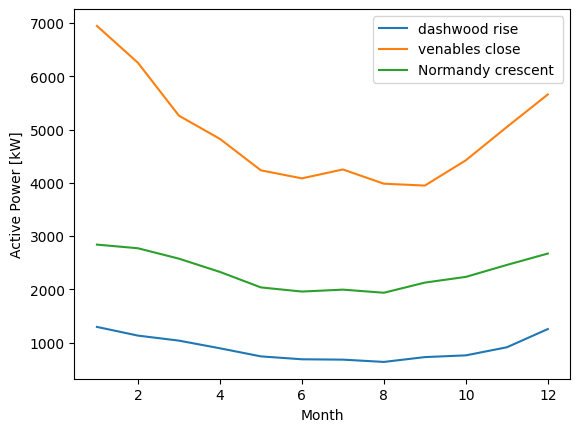

In [187]:
# for idx, substation in enumerate(substation_names):
#     dataframes[substation]['Hour']  = dataframes[substation]['Datetime'].dt.hour
#     dataframes[substation].groupby('Hour')['Active Power [kW]'].median().plot(label = f"Cluster {idx}:" + substation)
substation_monthly_power_no_labels = substation_monthly_power.iloc[:, :12]
for substation in substation_names:
    substation_monthly_power_no_labels.loc[substation].plot(label = substation)
plt.legend()
plt.xlabel("Month")
plt.ylabel("Active Power [kW]")
plt.show()

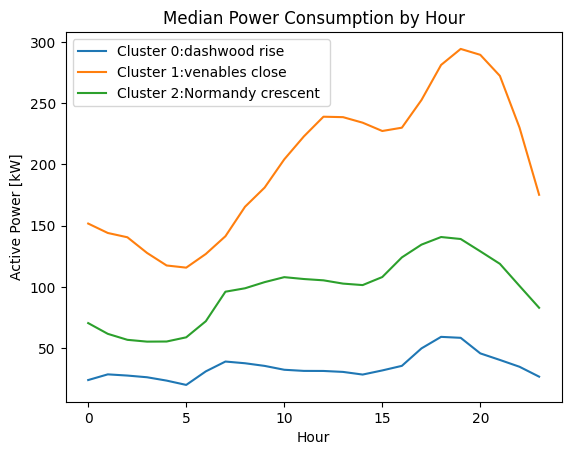

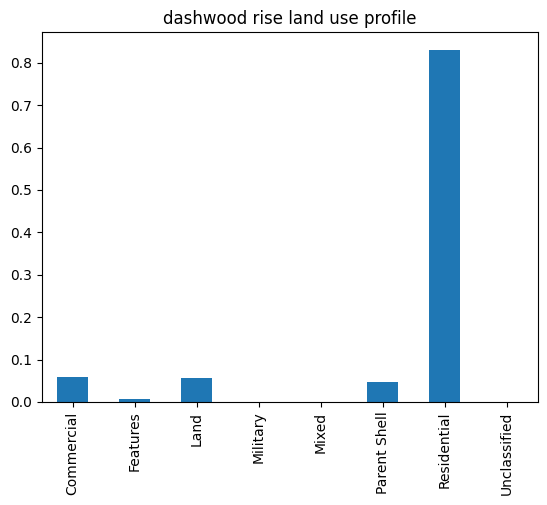

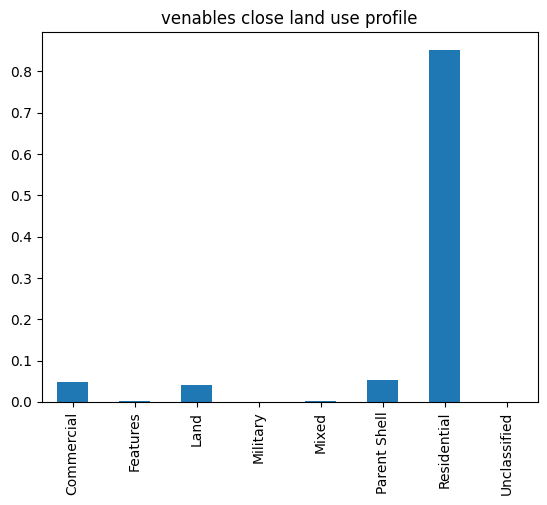

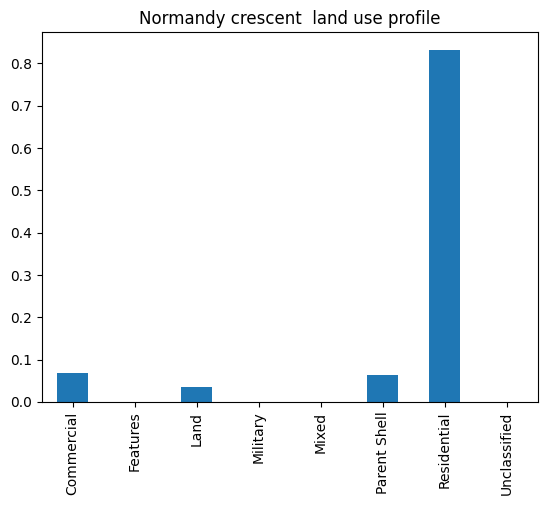

In [194]:
df.index = df.index.str.lower().str.strip()
for idx, substation in enumerate(substation_names):
    dataframes[substation]['Hour']  = dataframes[substation]['Datetime'].dt.hour
    dataframes[substation].groupby('Hour')['Active Power [kW]'].median().plot(label = f"Cluster {idx}:" + substation)
plt.ylabel("Active Power [kW]")
plt.title("Median Power Consumption by Hour")
plt.legend()
plt.show()
for substation in substation_names:
    df.loc[substation.lower().strip()].plot(kind = 'bar')
    plt.title(substation + " land use profile")
    plt.show()


/Users/Orie4416/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/Orie4416/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0    33
2    29
1     9
Name: Cluster, dtype: int64


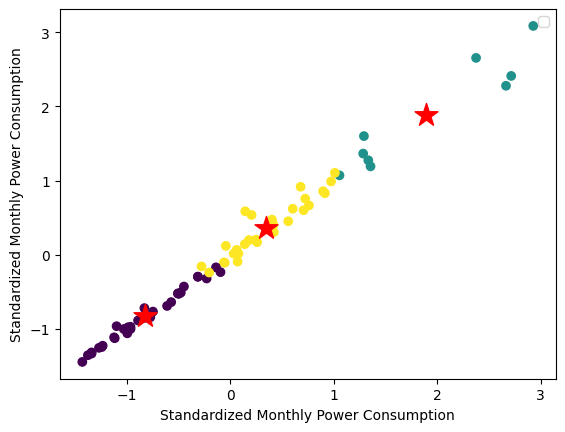

In [192]:
from sklearn.cluster import KMeans

# assume that you have already created the substation_monthly_power dataframe

# drop any row that contains NaN values (if you filled missing values with NaN)
substation_monthly_power = substation_monthly_power.dropna()

# scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(substation_monthly_power)

# set the number of clusters
n_clusters = 3

# create an instance of the KMeans class
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# fit the data to the KMeans model
kmeans.fit(X)

# extract the labels and centroids from the KMeans model
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# add the cluster labels to the original dataframe
substation_monthly_power['Cluster'] = labels

# print the number of substations in each cluster
print(substation_monthly_power['Cluster'].value_counts())

# plot the clusters
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.xlabel('Standardized Monthly Power Consumption')
plt.ylabel('Standardized Monthly Power Consumption')
plt.legend()
plt.show()

# # assume that you have already performed KMeans clustering and added the cluster labels to the substation_monthly_power dataframe

# # calculate the distances of each substation to the center of its cluster
# from scipy.spatial.distance import cdist
# distances = cdist(X, centroids, 'euclidean')

# # get the index of the closest substation to the center of each cluster
# closest_idx = distances.argmin(axis=0)

# # get the substation names that are closest to the center of each cluster
# closest_substations = substation_monthly_power.index[closest_idx]

# # print the closest substation for each cluster
# for i in range(n_clusters):
#     print(f"Closest substation to cluster {i+1}: {closest_substations[i]}")


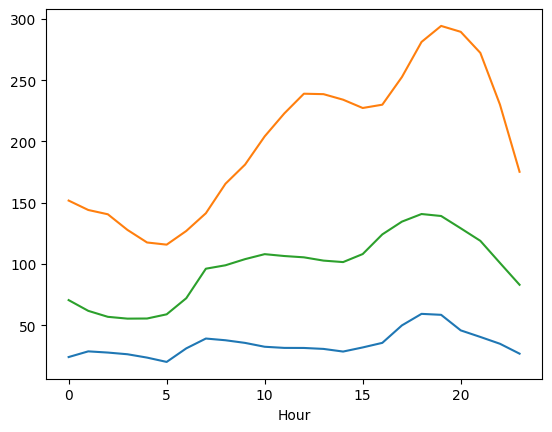

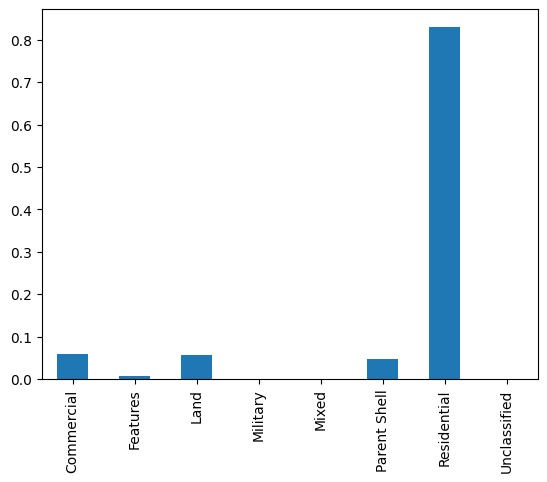

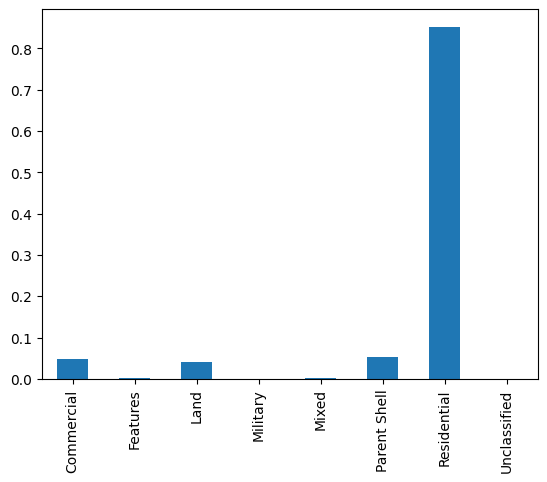

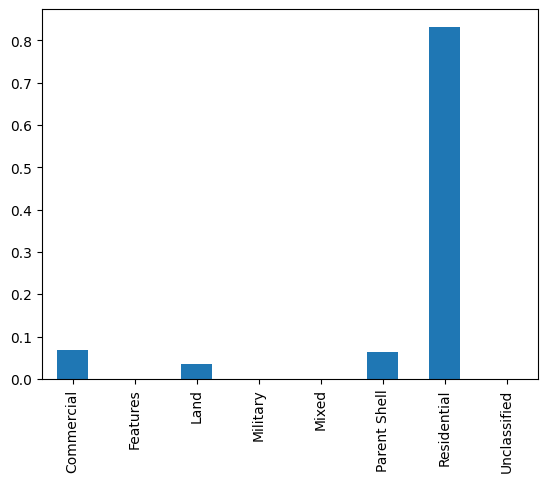

In [137]:
df.index = df.index.str.lower().str.strip()
for substation in closest_substations:
    dataframes[substation]['Hour']  = dataframes[substation]['Datetime'].dt.hour
    dataframes[substation].groupby('Hour')['Active Power [kW]'].median().plot()
plt.show()
for substation in closest_substations:
    df.loc[substation.lower().strip()].plot(kind = 'bar')
    plt.show()

In [ ]:
feature_of_interest = 'Active Power [kW]'

feature_set = [
        "substation",
        f'Mean total daily load consumption {feature_of_interest}',
    ]

def extract_features_v4(substation, df):
    
    # convert datetime column to datetime type
    df['Datetime'] = pd.to_datetime(df['Datetime'])

    df['Date'] = df['Datetime'].dt.date
    df['Hour'] = df['Datetime'].dt.hour

    # set datetime column as index
    df = df.set_index('Datetime')
    
    # group df by date
    daily_groups = df.groupby(df['Date'])
    
    feature_of_interest = 'Active Power [kW]'
    

    # total power consumption
    total_power = daily_groups[feature_of_interest].sum()
    
    
    ###################### Morning  #############################
    filtered_morning_hours = df[(df['Hour'] <= 6) & (df['Hour'] >= 4 )]
    grouped_morning_hours = filtered_morning_hours.groupby(by=['Date'])
    morning_hour_loads = grouped_morning_hours[feature_of_interest].mean()
    
    ###################### Afternoon  #############################
    filtered_afternoon_hours = df[(df['Hour'] >= 8) & (df['Hour'] <= 15)]
    grouped_afternoon_hours = filtered_afternoon_hours.groupby(by=['Date'])
    afternoon_hour_loads = grouped_afternoon_hours[feature_of_interest].mean()
    
    ###################### Evening  #############################
    filtered_evening_hours = df[(df['Hour'] >= 18 ) & (df['Hour'] < 24)]
    grouped_evening_hours = filtered_evening_hours.groupby(by=['Date'])
    evening_hour_loads = grouped_evening_hours[feature_of_interest].mean()
    
    ###################### Night  #############################
    filtered_night_hours = df[(df['Hour'] < 6 ) & (df['Hour'] >= 0)]
    grouped_night_hours = filtered_night_hours.groupby(by=['Date'])
    night_hour_loads = grouped_night_hours[feature_of_interest].mean()
    
    # Difference between 6am and 8am power
    morning_start = df[df['Hour'] == 6]
    morning_end = df[df['Hour'] == 8]
    morning_start_loads = morning_start.groupby(by=['Date'])[feature_of_interest].mean()
    morning_end_loads = morning_end.groupby(by=['Date'])[feature_of_interest].mean()
    
    # Difference between 3pm and 6pm power
    eve_start = df[df['Hour'] == 15]
    eve_end = df[df['Hour'] == 18]
    eve_start_loads = eve_start.groupby(by=['Date'])[feature_of_interest].mean()
    eve_end_loads = eve_end.groupby(by=['Date'])[feature_of_interest].mean()    

     # Max power consumption during a day
    max_powers = daily_groups[feature_of_interest].max()

    # Min power consumption during a day
    min_powers = daily_groups[feature_of_interest].min()

    # Range of power consumption during a day
    range_powers = max_powers - min_powers


    features = {
        f'Mean total daily load consumption {feature_of_interest}' : total_power.mean(),
        f'Max power consumption during a day {feature_of_interest}': max_powers.mean(),
        f'Min power consumption during a day {feature_of_interest}': min_powers.mean(),
        f'Range of power consumption during a day (max - min) {feature_of_interest}': range_powers.mean(),
        f'Mean morning load {feature_of_interest}': morning_hour_loads.mean(),
        f'Mean afternoon load  {feature_of_interest}': afternoon_hour_loads.mean(),
        f'Mean evening load  {feature_of_interest}': evening_hour_loads.mean(),
        f'Mean night load  {feature_of_interest}': night_hour_loads.mean(),
        f'6am load {feature_of_interest}': morning_start_loads.mean(),
        f'8am load {feature_of_interest}': morning_end_loads.mean(),
        f'3pm load {feature_of_interest}': eve_start_loads.mean(),
        f'6pm load {feature_of_interest}': eve_end_loads.mean()
    }
    return features 
        
    
    
features_dict = {}
specific_time = False
for substation, dataframe in dataframes.items():
    # Compute all power features for each substation
    features = extract_features_v4(substation, dataframe)
        
    # Convert the feature data into a dataframe and append it to the corresponding dataframe in df_dict
    features_dict[substation] = features
features_df = pd.DataFrame(columns = feature_set)
# loop through feature dictionary and append each substation's features to the dataframe
for substation, feature_dict in features_dict.items():
    feature_data = {"substation": substation.lower().strip()}
    feature_data.update(feature_dict)
    features_df = features_df.append(feature_data, ignore_index=True)